# Pre-Equilibrium Maximazation of Yield #

In [1]:
# make sure jupyter path is correct for loading local moudules
import sys
# path to steric_simulator module relative to notebook
sys.path.append("../../../")
import copy

In [2]:
from steric_free_simulator import ReactionNetwork, VectorizedRxnNet, VecSim, Optimizer, EquilibriumSolver
import networkx as nx
import torch
from torch import DoubleTensor as Tensor
import numpy as np

EnergyExplorer Module is not available. Check Rosetta installation. <ipykernel.iostream.OutStream object at 0x7f1987e21940>


We'll start with the AP2 complex that we've worked with before. Pairwise $\Delta Gs$ were derived from the PDB structures via Rossetta

In [3]:
base_input = '../../input_files/ap2_coup.pwr'
rn = ReactionNetwork(base_input, one_step=True)
rn.resolve_tree()
vec_rn = VectorizedRxnNet(rn, dev='cpu')

['default_assoc', 1.0]
['rxn_coupling', True]
True
['monomer_add_only', -1]
['A']
100.0
['M']
100.0
['B']
100.0
['S']
100.0
Parsing rule...
['A', 'B', '']
GGGGGGGGGgg
Parsing rule...
['A', 'M', '']
GGGGGGGGGgg
Parsing rule...
['A', 'S', '']
GGGGGGGGGgg
Parsing rule...
['B', 'M', '']
GGGGGGGGGgg
Parsing rule...
['M', 'S', '']
GGGGGGGGGgg
Parsing rule...
['B', 'S', '']
GGGGGGGGGgg
Node-1 :  (0, {'struct': <networkx.classes.graph.Graph object at 0x7f18f1308358>, 'copies': tensor([100.], dtype=torch.float64), 'subunits': 1})
Node-2 :  (0, {'struct': <networkx.classes.graph.Graph object at 0x7f18f1308358>, 'copies': tensor([100.], dtype=torch.float64), 'subunits': 1})
-----
{'A'}
{'A'}
set()
Steric hindrance detected
Node-1 :  (0, {'struct': <networkx.classes.graph.Graph object at 0x7f18f1308358>, 'copies': tensor([100.], dtype=torch.float64), 'subunits': 1})
Node-2 :  (1, {'struct': <networkx.classes.graph.Graph object at 0x7f18f232dac8>, 'copies': tensor([100.], dtype=torch.float64), 'sub

('A', 'B')
[True, True]
True
Allowed edges: 
('A', 'M')
[True, True]
True
Allowed edges: 
('A', 'S')
[True, True]
False
############################3
Allowed edges: 
('B', 'M')
[True, True]
True
Allowed edges: 
('M', 'S')
[True, True]
False
############################3
Allowed edges: 
('B', 'S')
[True, True]
False
############################3
[(14, {'struct': <networkx.classes.graph.Graph object at 0x7f18f0a34278>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 21})]
Connected item Edges:  [('S', 'A'), ('S', 'M'), ('S', 'B'), ('M', 'A'), ('M', 'B'), ('A', 'B')]
Adding an new edge-- 3 14
New bonds:  [('A', 'S'), ('M', 'S'), ('B', 'S')]
Adding an new edge-- 9 14
The number of bonds formed are not compensated by the number of edges
This could be possible due to presence of a repeating subunit
The common reactant is:  S
Edge added between:  3 14
Node-1 :  (3, {'struct': <networkx.classes.graph.Graph object at 0x7f18f0b26978>, 'copies': tensor([100.], dtype=torch.float64), 'subu

Nextn edges:  []
Item edges:  [('M', 'S')]
Allowed edges: 
('A', 'B')
[False, True]
False
Allowed edges: 
('A', 'M')
[False, True]
False
Allowed edges: 
('A', 'S')
[False, True]
False
Allowed edges: 
('B', 'M')
[True, True]
False
############################3
Allowed edges: 
('M', 'S')
[True, True]
True
Allowed edges: 
('B', 'S')
[True, True]
False
############################3
[(13, {'struct': <networkx.classes.graph.Graph object at 0x7f18f0a25470>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 6})]
Connected item Edges:  [('M', 'S'), ('M', 'B'), ('S', 'B')]
$$$$$$$
Node-1 :  (8, {'struct': <networkx.classes.graph.Graph object at 0x7f18f0a91780>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 2})
Node-2 :  (3, {'struct': <networkx.classes.graph.Graph object at 0x7f18f0b26978>, 'copies': tensor([100.], dtype=torch.float64), 'subunits': 1})
-----
{'M', 'S'}
{'S'}
{'M'}
Steric hindrance detected
Node-1 :  (8, {'struct': <networkx.classes.graph.Graph object at 0x7f18f

A
Reactant Sets:
M
Reactant Sets:
B
Reactant Sets:
S
Reactant Sets:
AM
Reactant Sets:
(0, 1)
AB
Reactant Sets:
(0, 2)
AS
Reactant Sets:
(0, 3)
BM
Reactant Sets:
(1, 2)
MS
Reactant Sets:
(1, 3)
ABM
Reactant Sets:
(1, 5)
(2, 4)
(0, 7)
AMS
Reactant Sets:
(3, 4)
(1, 6)
(8, 0)
BS
Reactant Sets:
(2, 3)
ABS
Reactant Sets:
(3, 5)
(0, 11)
(2, 6)
BMS
Reactant Sets:
(8, 2)
(3, 7)
(1, 11)
ABMS
Reactant Sets:
(8, 5)
(6, 7)
(9, 3)
(1, 12)
(0, 13)
(11, 4)
(10, 2)
tensor([[-1., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0., -1., -1., -1.,  0.,  0., -1.,  1.,  1.,  1.,
         -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
         -0., -0.,  1.,  1.,  1., -0., -0.,  1.],
        [-1.,  0.,  0., -1., -1., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1., -1.,  0.,  1., -0., -0.,
          1.,  1.,  1.,  1., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
         -0., -0., -0.,

In [4]:
uid_dict = {}
sys.path.append("../../")
import numpy as np
from reaction_network import gtostr
for n in rn.network.nodes():
    #print(n)
    #print(rn.network.nodes()[n])
    for k,v in rn.network[n].items():
        uid = v['uid']
        r1 = set(gtostr(rn.network.nodes[n]['struct']))
        p = set(gtostr(rn.network.nodes[k]['struct']))
        r2 = p-r1
        reactants = (r1,r2)
        uid_dict[(n,k)] = uid

print(uid_dict)

{(0, 4): 0, (0, 5): 1, (0, 6): 2, (0, 9): 19, (0, 10): 20, (0, 12): 21, (0, 14): 24, (1, 4): 0, (1, 7): 3, (1, 8): 4, (1, 9): 5, (1, 10): 6, (1, 13): 22, (1, 14): 23, (2, 5): 1, (2, 7): 3, (2, 11): 7, (2, 9): 8, (2, 12): 9, (2, 13): 10, (2, 14): 11, (3, 6): 2, (3, 8): 4, (3, 11): 7, (3, 10): 12, (3, 12): 13, (3, 13): 14, (3, 14): 15, (4, 9): 8, (4, 10): 12, (4, 14): 16, (5, 9): 5, (5, 12): 13, (5, 14): 17, (6, 10): 6, (6, 12): 9, (6, 14): 18, (7, 13): 14, (7, 14): 18, (7, 9): 19, (8, 13): 10, (8, 14): 17, (8, 10): 20, (9, 14): 15, (10, 14): 11, (11, 14): 16, (11, 12): 21, (11, 13): 22, (12, 14): 23, (13, 14): 24}


In [5]:
#Do modifications here
#Changing Initial Conditions
import networkx as nx
#Changin k_on
new_kon = torch.zeros([rn._rxn_count], requires_grad=True).double()
new_kon = new_kon + Tensor([1.]*np.array(1e0))
new_kon[7]=0.1
update_kon_dict = {}
for edge in rn.network.edges:
    print(rn.network.get_edge_data(edge[0],edge[1]))
    update_kon_dict[edge] = new_kon[uid_dict[edge]]

nx.set_edge_attributes(rn.network,update_kon_dict,'k_on')

# for edge in rn.network.edges:
#     print(rn.network.get_edge_data(edge[0],edge[1]))
vec_rn = VectorizedRxnNet(rn, dev='cpu')
print(vec_rn.kon)

#Changing initial concentrations

{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 0}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 1}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 2}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-40.], dtype=torch.float64), 'uid': 19}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-40.], dtype=torch.float64), 'uid': 20}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-40.], dtype=torch.float64), 'uid': 21}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-60.], dtype=torch.float64), 'uid': 24}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 0}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 3}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 4}
{'k_on

## The Equilibrium Solution ##
First we will find the equilibrium solution for this system.

In [6]:
# vec_rn.update_reaction_net(rn)
# poly_system = EquilibriumSolver(rn)
# solution = poly_system.solve()
# print(solution)
# if solution == None:
#     print("No Equilibrium solution")
# else:
#     print(solution)
#     print("Equilibrium expected yield: ", 100 * solution[-1] / min(vec_rn.initial_copies[:vec_rn.num_monomers]), '%')
# print(vec_rn.kon)

In [7]:
uid_dict = {}
sys.path.append("../")
import numpy as np
from reaction_network import gtostr
from torch import DoubleTensor as Tensor

def get_max_edge(n):
    """
    Calculates the max rate (k_on) for a given node
    To find out the maximum flow path to the final complex starting from the current node.
    
    Can also calculate the total rate of consumption of a node by summing up all rates. 
    Can tell which component is used quickly.
    """
    try:
        edges = rn.network.out_edges(n)
        #Loop over all edges
        #Get attributes
        if len(edges)==0:
            return(False)
        kon_max = -1
        next_node = -1
        
        kon_sum = 0
        for edge in edges:
            data = rn.network.get_edge_data(edge[0],edge[1])
            #print(data)
            #Get uid
            uid = data['uid']
            #Get updated kon
            temp_kon = vec_rn.kon[uid]
            kon_sum+=temp_kon
            
#             #Calculate k_off also
#             std_c = Tensor([1.])
#             l_kon = torch.log(temp_kon)
#             l_koff = (vec_rn.rxn_score_vec[uid] * 1. / (self._R * self._T)) + l_kon + torch.log(std_c)
            if temp_kon > kon_max:
                kon_max = temp_kon
                next_node=edge[1]
        return(kon_max,next_node,kon_sum)
    except Exception as err:
        raise(err)

pathway = []
kon_sumarray = []
total_con_rate = {}
for n in rn.network.nodes():
    
    n_str = gtostr(rn.network.nodes[n]['struct']) 
    
    paths = [n_str]
    kon_sum = 0
    temp_node = n
    max_edge = True
    consumption_rate = 0
    if n < len(rn.network.nodes()):#num_monomers:
#         print("Current node: ")
#         print(n_str)
        while max_edge:
            max_edge = get_max_edge(temp_node)
            if max_edge:
                total_con_rate[gtostr(rn.network.nodes[temp_node]['struct'])] = max_edge[2]
                temp_node = max_edge[1]
                kon_sum += max_edge[0].item()
                
#                 print("Next node: ")
#                 print(temp_node)

                paths.append(gtostr(rn.network.nodes[temp_node]['struct']))
            else:
                break
        pathway.append(paths)
        kon_sumarray.append(kon_sum)
        paths=[]

print(pathway)
print(kon_sumarray)
#print(total_con_rate)

[['A', 'AM', 'ABM', 'ABMS'], ['M', 'AM', 'ABM', 'ABMS'], ['B', 'AB', 'ABM', 'ABMS'], ['S', 'AS', 'AMS', 'ABMS'], ['AM', 'ABM', 'ABMS'], ['AB', 'ABM', 'ABMS'], ['AS', 'AMS', 'ABMS'], ['BM', 'BMS', 'ABMS'], ['MS', 'BMS', 'ABMS'], ['ABM', 'ABMS'], ['AMS', 'ABMS'], ['BS', 'ABMS'], ['ABS', 'ABMS'], ['BMS', 'ABMS'], ['ABMS']]
[3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0]


In [8]:
# if solution != None:
#     for k,v in sorted(total_con_rate.items(),key=lambda x : x[1]):
#         print(k," : ", v.item())

In [9]:
# if solution !=None:
#     for k,v in sorted(net_flux.items(),key=lambda x : x[1]):
#         print(k," : ", v)

## Using the optimizer with a 1 second simulation runtime ##

In [10]:
vec_rn.reset(reset_params=True)
optim = Optimizer(reaction_network=vec_rn,
                  sim_runtime=1,
                  optim_iterations=5000,
                  learning_rate=new_kon[0].item()/1e2,
                  device='cpu',method="RMSprop",)
optim.rn.update_reaction_net(rn)
optim.optimize()

Using CPU
Reaction Parameters before optimization: 
[Parameter containing:
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.1000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
       dtype=torch.float64, requires_grad=True)]
Optimizer State: <bound method Optimizer.state_dict of RMSprop (
Parameter Group 0
    alpha: 0.99
    centered: False
    eps: 1e-08
    lr: 0.01
    momentum: 0
    weight_decay: 0
)>
Using CPU
Next time:  tensor(1.6918, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  282
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.5278, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 0 was 52.7%
current params: tensor([1.1000, 1.1000, 1.1000, 0.9000, 0.9000, 1.0000, 1.0000, 0.2000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000,

Next time:  tensor(1.2876, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  295
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.8308, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 15 was 83.0%
current params: tensor([1.5582, 1.7731, 1.7180, 0.1899, 0.0462, 1.0007, 1.0007, 0.1356, 1.0007,
        1.0007, 1.0007, 1.0000, 1.0007, 1.0007, 1.0007, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0007, 1.0007, 1.0007, 1.0007, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.3171, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  293
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.8184, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 16 was 81.8%
current params: tensor([1.5765, 1.8037, 1.7410, 0.1865, 0.1460, 1.0007, 1.0007, 0.1320, 1.0007,
        1.0007, 1.0007, 1.0000, 1.0007, 1.0007, 1.0007, 1.0000, 1.0000, 1.0000,
        1.0000,

Next time:  tensor(1.2654, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  296
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.8271, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 31 was 82.7%
current params: tensor([1.8276, 2.1170, 2.0701, 0.1398, 0.0976, 1.0014, 1.0014, 0.1672, 1.0014,
        1.0014, 1.0014, 1.0000, 1.0014, 1.0014, 1.0014, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0014, 1.0014, 1.0014, 1.0014, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1330, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  296
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.8305, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 32 was 83.0%
current params: tensor([1.8417, 2.1349, 2.0879, 0.1366, 0.1710, 1.0014, 1.0014, 0.1651, 1.0014,
        1.0014, 1.0014, 1.0000, 1.0014, 1.0014, 1.0014, 1.0000, 1.0000, 1.0000,
        1.0000,

Next time:  tensor(1.0377, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  295
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.8304, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 47 was 83.0%
current params: tensor([2.0461, 2.3600, 2.3514, 0.1722, 0.1378, 1.0020, 1.0020, 0.1353, 1.0020,
        1.0020, 1.0020, 1.0000, 1.0020, 1.0020, 1.0020, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0020, 1.0020, 1.0020, 1.0020, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0390, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  295
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.8327, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 48 was 83.2%
current params: tensor([2.0593, 2.3743, 2.3661, 0.1702, 0.1358, 1.0021, 1.0021, 0.1335, 1.0021,
        1.0021, 1.0021, 1.0000, 1.0021, 1.0021, 1.0021, 1.0000, 1.0000, 1.0000,
        1.0000,

Next time:  tensor(1.2158, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  296
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.8687, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 63 was 86.8%
current params: tensor([2.2439, 2.5706, 2.5690, 0.1369, 0.1025, 1.0027, 1.0027, 0.1024, 1.0027,
        1.0027, 1.0027, 1.0000, 1.0027, 1.0027, 1.0027, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0027, 1.0027, 1.0027, 1.0027, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1828, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  297
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.8710, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 64 was 87.0%
current params: tensor([2.2557, 2.5824, 2.5812, 0.1345, 0.1001, 1.0028, 1.0028, 0.1002, 1.0028,
        1.0028, 1.0028, 1.0000, 1.0028, 1.0028, 1.0028, 1.0000, 1.0000, 1.0000,
        1.0000,

Next time:  tensor(1.0095, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  298
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.8652, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 79 was 86.5%
current params: tensor([2.4281, 2.7338, 2.8004, 0.1025, 0.1412, 1.0034, 1.0034, 0.1416, 1.0034,
        1.0034, 1.0034, 1.0000, 1.0034, 1.0034, 1.0034, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0034, 1.0034, 1.0034, 1.0034, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0122, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  298
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.8673, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 80 was 86.7%
current params: tensor([2.4391, 2.7433, 2.8144, 0.1003, 0.1394, 1.0034, 1.0034, 0.1398, 1.0034,
        1.0034, 1.0034, 1.0000, 1.0034, 1.0034, 1.0034, 1.0000, 1.0000, 1.0000,
        1.0000,

Next time:  tensor(1.2459, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  297
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.8753, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 95 was 87.5%
current params: tensor([2.6039, 2.8927, 2.9998, 0.1421, 0.1139, 1.0041, 1.0041, 0.1139, 1.0041,
        1.0041, 1.0041, 1.0000, 1.0041, 1.0041, 1.0041, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0041, 1.0041, 1.0041, 1.0041, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0437, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  298
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.8770, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 96 was 87.7%
current params: tensor([2.6147, 2.9024, 3.0114, 0.1402, 0.1120, 1.0041, 1.0041, 0.1122, 1.0041,
        1.0041, 1.0041, 1.0000, 1.0041, 1.0041, 1.0041, 1.0000, 1.0000, 1.0000,
        1.0000,

Next time:  tensor(1.1305, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  299
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.8705, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 111 was 87.0%
current params: tensor([2.7731, 3.0426, 3.1866, 0.1127, 0.1508, 1.0047, 1.0047, 0.1511, 1.0047,
        1.0047, 1.0047, 1.0000, 1.0047, 1.0047, 1.0047, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0047, 1.0047, 1.0047, 1.0047, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1310, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  299
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.8719, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 112 was 87.1%
current params: tensor([2.7836, 3.0516, 3.1984, 0.1110, 0.1494, 1.0048, 1.0048, 0.1496, 1.0048,
        1.0048, 1.0048, 1.0000, 1.0048, 1.0048, 1.0048, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.0404, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  299
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.8776, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 127 was 87.7%
current params: tensor([2.9393, 3.1895, 3.3657, 0.1507, 0.1272, 1.0054, 1.0054, 0.1273, 1.0054,
        1.0054, 1.0054, 1.0000, 1.0054, 1.0054, 1.0054, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0054, 1.0054, 1.0054, 1.0054, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0403, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  299
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.8789, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 128 was 87.8%
current params: tensor([2.9496, 3.1989, 3.3763, 0.1491, 0.1258, 1.0055, 1.0055, 0.1258, 1.0055,
        1.0055, 1.0055, 1.0000, 1.0055, 1.0055, 1.0055, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.1358, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  299
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.8997, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 143 was 89.9%
current params: tensor([3.1002, 3.3368, 3.5277, 0.1245, 0.1024, 1.0061, 1.0061, 0.1024, 1.0061,
        1.0061, 1.0061, 1.0000, 1.0061, 1.0061, 1.0061, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0061, 1.0061, 1.0061, 1.0061, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1389, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  299
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9012, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 144 was 90.1%
current params: tensor([3.1101, 3.3458, 3.5374, 0.1227, 0.1006, 1.0061, 1.0061, 0.1007, 1.0061,
        1.0061, 1.0061, 1.0000, 1.0061, 1.0061, 1.0061, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.1230, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  300
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.8913, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 159 was 89.1%
current params: tensor([3.2589, 3.4788, 3.6956, 0.0989, 0.1424, 1.0068, 1.0068, 0.1427, 1.0068,
        1.0068, 1.0068, 1.0000, 1.0068, 1.0068, 1.0068, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0068, 1.0068, 1.0068, 1.0068, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1267, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  300
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.8925, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 160 was 89.2%
current params: tensor([3.2687, 3.4874, 3.7058, 0.1597, 0.1410, 1.0068, 1.0068, 0.1413, 1.0068,
        1.0068, 1.0068, 1.0000, 1.0068, 1.0068, 1.0068, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.6244, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  298
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.8951, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 175 was 89.5%
current params: tensor([3.4170, 3.6262, 3.8526, 0.1391, 0.1217, 1.0075, 1.0075, 0.1217, 1.0075,
        1.0075, 1.0075, 1.0000, 1.0075, 1.0075, 1.0075, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0075, 1.0075, 1.0075, 1.0075, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.6427, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  298
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.8962, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 176 was 89.6%
current params: tensor([3.4269, 3.6351, 3.8621, 0.1377, 0.1204, 1.0075, 1.0075, 0.1203, 1.0075,
        1.0075, 1.0075, 1.0000, 1.0075, 1.0075, 1.0075, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(2.0167, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  299
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9139, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 191 was 91.3%
current params: tensor([3.5715, 3.7685, 4.0017, 0.1145, 0.1604, 1.0081, 1.0081, 0.1605, 1.0081,
        1.0081, 1.0081, 1.0000, 1.0081, 1.0081, 1.0081, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0081, 1.0081, 1.0081, 1.0081, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.2066, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  300
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.8890, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 192 was 88.8%
current params: tensor([3.5812, 3.7774, 4.0120, 0.1131, 0.1592, 1.0082, 1.0082, 0.1594, 1.0082,
        1.0082, 1.0082, 1.0000, 1.0082, 1.0082, 1.0082, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.2545, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  299
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.8907, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 207 was 89.0%
current params: tensor([3.7265, 3.9102, 4.1608, 0.1544, 0.1418, 1.0088, 1.0088, 0.1418, 1.0088,
        1.0088, 1.0088, 1.0000, 1.0088, 1.0088, 1.0088, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0088, 1.0088, 1.0088, 1.0088, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0593, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  299
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.8916, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 208 was 89.1%
current params: tensor([3.7361, 3.9195, 4.1704, 0.1531, 0.1406, 1.0089, 1.0089, 0.1407, 1.0089,
        1.0089, 1.0089, 1.0000, 1.0089, 1.0089, 1.0089, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.0504, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  299
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9055, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 223 was 90.5%
current params: tensor([3.8814, 4.0557, 4.3115, 0.1337, 0.1225, 1.0095, 1.0095, 0.1226, 1.0095,
        1.0095, 1.0095, 1.0000, 1.0095, 1.0095, 1.0095, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0095, 1.0095, 1.0095, 1.0095, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0548, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  299
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9064, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 224 was 90.6%
current params: tensor([3.8909, 4.0647, 4.3208, 0.1323, 0.1212, 1.0095, 1.0095, 0.1213, 1.0095,
        1.0095, 1.0095, 1.0000, 1.0095, 1.0095, 1.0095, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.3120, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  300
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9214, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 239 was 92.1%
current params: tensor([4.0340, 4.1969, 4.4565, 0.1107, 0.1011, 1.0102, 1.0102, 0.1010, 1.0102,
        1.0102, 1.0102, 1.0000, 1.0102, 1.0102, 1.0102, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0102, 1.0102, 1.0102, 1.0102, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.3182, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  300
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9225, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 240 was 92.2%
current params: tensor([4.0435, 4.2056, 4.4654, 0.1091, 0.0996, 1.0102, 1.0102, 0.0997, 1.0102,
        1.0102, 1.0102, 1.0000, 1.0102, 1.0102, 1.0102, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.0071, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  300
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.8986, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 255 was 89.8%
current params: tensor([4.1893, 4.3404, 4.6093, 0.1519, 0.1459, 1.0108, 1.0108, 0.1458, 1.0108,
        1.0108, 1.0108, 1.0000, 1.0108, 1.0108, 1.0108, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0108, 1.0108, 1.0108, 1.0108, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0080, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  300
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.8994, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 256 was 89.9%
current params: tensor([4.1991, 4.3495, 4.6188, 0.1508, 0.1448, 1.0109, 1.0109, 0.1448, 1.0109,
        1.0109, 1.0109, 1.0000, 1.0109, 1.0109, 1.0109, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.0026, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  299
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9114, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 271 was 91.1%
current params: tensor([4.3428, 4.4867, 4.7585, 0.1326, 0.1280, 1.0115, 1.0115, 0.1281, 1.0115,
        1.0115, 1.0115, 1.0000, 1.0115, 1.0115, 1.0115, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0115, 1.0115, 1.0115, 1.0115, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(896.0489, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  298
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9130, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 272 was 91.2%
current params: tensor([4.3505, 4.4972, 4.7677, 0.1313, 0.1263, 1.0116, 1.0116, 0.1275, 1.0116,
        1.0116, 1.0116, 1.0000, 1.0116, 1.0116, 1.0116, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1605, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  300
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9250, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 287 was 92.5%
current params: tensor([4.4941, 4.6305, 4.9031, 0.1114, 0.1080, 1.0122, 1.0122, 0.1086, 1.0122,
        1.0122, 1.0122, 1.0000, 1.0122, 1.0122, 1.0122, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0122, 1.0122, 1.0122, 1.0122, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1671, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  300
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9260, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 288 was 92.5%
current params: tensor([4.5035, 4.6394, 4.9120, 0.1100, 0.1067, 1.0122, 1.0122, 0.1073, 1.0122,
        1.0122, 1.0122, 1.0000, 1.0122, 1.0122, 1.0122, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(2.6761, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  301
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9035, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 303 was 90.3%
current params: tensor([4.6479, 4.7748, 5.0510, 0.1530, 0.1531, 1.0129, 1.0129, 0.1546, 1.0129,
        1.0129, 1.0129, 1.0000, 1.0129, 1.0129, 1.0129, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0129, 1.0129, 1.0129, 1.0129, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(2.6834, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  301
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9041, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 304 was 90.4%
current params: tensor([4.6577, 4.7840, 5.0605, 0.1520, 0.1521, 1.0129, 1.0129, 0.1536, 1.0129,
        1.0129, 1.0129, 1.0000, 1.0129, 1.0129, 1.0129, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(2.9165, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  301
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9116, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 319 was 91.1%
current params: tensor([4.7915, 4.9142, 5.1969, 0.1399, 0.1420, 1.0135, 1.0135, 0.1442, 1.0135,
        1.0135, 1.0135, 1.0000, 1.0135, 1.0135, 1.0135, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0135, 1.0135, 1.0135, 1.0135, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0222, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  298
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9123, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 320 was 91.2%
current params: tensor([4.8009, 4.9233, 5.2062, 0.1389, 0.1410, 1.0136, 1.0136, 0.1433, 1.0136,
        1.0136, 1.0136, 1.0000, 1.0136, 1.0136, 1.0136, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.0350, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  301
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9228, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 335 was 92.2%
current params: tensor([4.9465, 5.0602, 5.3447, 0.1223, 0.1238, 1.0142, 1.0142, 0.1259, 1.0142,
        1.0142, 1.0142, 1.0000, 1.0142, 1.0142, 1.0142, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0142, 1.0142, 1.0142, 1.0142, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0394, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  301
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9236, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 336 was 92.3%
current params: tensor([4.9561, 5.0693, 5.3539, 0.1211, 0.1226, 1.0143, 1.0143, 0.1247, 1.0143,
        1.0143, 1.0143, 1.0000, 1.0143, 1.0143, 1.0143, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.6166, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  300
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9351, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 351 was 93.5%
current params: tensor([5.0991, 5.2049, 5.4896, 0.1022, 0.1033, 1.0149, 1.0149, 0.1060, 1.0149,
        1.0149, 1.0149, 1.0000, 1.0149, 1.0149, 1.0149, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0149, 1.0149, 1.0149, 1.0149, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.6373, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  300
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9359, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 352 was 93.5%
current params: tensor([5.1086, 5.2138, 5.4985, 0.1009, 0.1020, 1.0149, 1.0149, 0.1046, 1.0149,
        1.0149, 1.0149, 1.0000, 1.0149, 1.0149, 1.0149, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.0532, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  301
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9126, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 367 was 91.2%
current params: tensor([5.2546, 5.3546, 5.6391, 0.1503, 0.1523, 1.0156, 1.0156, 0.1552, 1.0156,
        1.0156, 1.0156, 1.0000, 1.0156, 1.0156, 1.0156, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0156, 1.0156, 1.0156, 1.0156, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0572, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  301
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9132, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 368 was 91.3%
current params: tensor([5.2643, 5.3640, 5.6486, 0.1493, 0.1513, 1.0156, 1.0156, 0.1543, 1.0156,
        1.0156, 1.0156, 1.0000, 1.0156, 1.0156, 1.0156, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(2.6695, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9221, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 383 was 92.2%
current params: tensor([5.4111, 5.5036, 5.7894, 0.1344, 0.1363, 1.0163, 1.0163, 0.1389, 1.0163,
        1.0163, 1.0163, 1.0000, 1.0163, 1.0163, 1.0163, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0163, 1.0163, 1.0163, 1.0163, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(2.6836, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9227, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 384 was 92.2%
current params: tensor([5.4208, 5.5129, 5.7987, 0.1334, 0.1352, 1.0163, 1.0163, 0.1378, 1.0163,
        1.0163, 1.0163, 1.0000, 1.0163, 1.0163, 1.0163, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.0103, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  301
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9324, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 399 was 93.2%
current params: tensor([5.5646, 5.6521, 5.9374, 0.1164, 0.1181, 1.0169, 1.0169, 0.1218, 1.0169,
        1.0169, 1.0169, 1.0000, 1.0169, 1.0169, 1.0169, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0169, 1.0169, 1.0169, 1.0169, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.3667, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  300
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9330, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 400 was 93.2%
current params: tensor([5.5743, 5.6611, 5.9466, 0.1153, 0.1170, 1.0170, 1.0170, 0.1206, 1.0170,
        1.0170, 1.0170, 1.0000, 1.0170, 1.0170, 1.0170, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.0976, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9321, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 415 was 93.2%
current params: tensor([5.7189, 5.7982, 6.0823, 0.1634, 0.1656, 1.0176, 1.0176, 0.1021, 1.0176,
        1.0176, 1.0176, 1.0000, 1.0176, 1.0176, 1.0176, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0176, 1.0176, 1.0176, 1.0176, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.3066, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9224, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 416 was 92.2%
current params: tensor([5.7289, 5.8076, 6.0917, 0.1624, 0.1647, 1.0177, 1.0177, 0.1010, 1.0177,
        1.0177, 1.0177, 1.0000, 1.0177, 1.0177, 1.0177, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(2.4363, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9203, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 431 was 92.0%
current params: tensor([5.8771, 5.9501, 6.2348, 0.1492, 0.1515, 1.0183, 1.0183, 0.1541, 1.0183,
        1.0183, 1.0183, 1.0000, 1.0183, 1.0183, 1.0183, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0183, 1.0183, 1.0183, 1.0183, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(2.4477, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9209, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 432 was 92.0%
current params: tensor([5.8869, 5.9596, 6.2443, 0.1483, 0.1505, 1.0183, 1.0183, 0.1532, 1.0183,
        1.0183, 1.0183, 1.0000, 1.0183, 1.0183, 1.0183, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(2.6259, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9289, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 447 was 92.8%
current params: tensor([6.0326, 6.1017, 6.3863, 0.1336, 0.1359, 1.0190, 1.0190, 0.1391, 1.0190,
        1.0190, 1.0190, 1.0000, 1.0190, 1.0190, 1.0190, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0190, 1.0190, 1.0190, 1.0190, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(2.6386, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9294, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 448 was 92.9%
current params: tensor([6.0422, 6.1112, 6.3957, 0.1325, 0.1348, 1.0190, 1.0190, 0.1381, 1.0190,
        1.0190, 1.0190, 1.0000, 1.0190, 1.0190, 1.0190, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.5089, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  300
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9376, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 463 was 93.7%
current params: tensor([6.1876, 6.2513, 6.5354, 0.1166, 0.1191, 1.0196, 1.0196, 0.1225, 1.0196,
        1.0196, 1.0196, 1.0000, 1.0196, 1.0196, 1.0196, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0196, 1.0196, 1.0196, 1.0196, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.5208, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  300
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9382, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 464 was 93.8%
current params: tensor([6.1973, 6.2606, 6.5446, 0.1155, 0.1180, 1.0197, 1.0197, 0.1214, 1.0197,
        1.0197, 1.0197, 1.0000, 1.0197, 1.0197, 1.0197, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.1152, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  301
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9474, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 479 was 94.7%
current params: tensor([6.3419, 6.4001, 6.6824, 0.1658, 0.1001, 1.0203, 1.0203, 0.1042, 1.0203,
        1.0203, 1.0203, 1.0000, 1.0203, 1.0203, 1.0203, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0203, 1.0203, 1.0203, 1.0203, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.2253, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9373, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 480 was 93.7%
current params: tensor([6.3517, 6.4097, 6.6915, 0.1649, 0.0990, 1.0204, 1.0204, 0.1030, 1.0204,
        1.0204, 1.0204, 1.0000, 1.0204, 1.0204, 1.0204, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(2.3778, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9252, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 495 was 92.5%
current params: tensor([6.4998, 6.5541, 6.8354, 0.1520, 0.1547, 1.0210, 1.0210, 0.1582, 1.0210,
        1.0210, 1.0210, 1.0000, 1.0210, 1.0210, 1.0210, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0210, 1.0210, 1.0210, 1.0210, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(2.3874, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9257, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 496 was 92.5%
current params: tensor([6.5096, 6.5637, 6.8450, 0.1511, 0.1539, 1.0210, 1.0210, 0.1574, 1.0210,
        1.0210, 1.0210, 1.0000, 1.0210, 1.0210, 1.0210, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.0520, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9325, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 511 was 93.2%
current params: tensor([6.6555, 6.7080, 6.9888, 0.1372, 0.1401, 1.0217, 1.0217, 0.1446, 1.0217,
        1.0217, 1.0217, 1.0000, 1.0217, 1.0217, 1.0217, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0217, 1.0217, 1.0217, 1.0217, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0574, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9330, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 512 was 93.2%
current params: tensor([6.6652, 6.7176, 6.9983, 0.1363, 0.1392, 1.0217, 1.0217, 0.1437, 1.0217,
        1.0217, 1.0217, 1.0000, 1.0217, 1.0217, 1.0217, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.0124, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9401, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 527 was 94.0%
current params: tensor([6.8122, 6.8596, 7.1398, 0.1217, 0.1247, 1.0223, 1.0223, 0.1290, 1.0223,
        1.0223, 1.0223, 1.0000, 1.0223, 1.0223, 1.0223, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0223, 1.0223, 1.0223, 1.0223, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0153, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9406, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 528 was 94.0%
current params: tensor([6.8220, 6.8691, 7.1492, 0.1206, 0.1237, 1.0224, 1.0224, 0.1279, 1.0224,
        1.0224, 1.0224, 1.0000, 1.0224, 1.0224, 1.0224, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.0234, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  301
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9485, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 543 was 94.8%
current params: tensor([6.9673, 7.0110, 7.2895, 0.1041, 0.1070, 1.0230, 1.0230, 0.1123, 1.0230,
        1.0230, 1.0230, 1.0000, 1.0230, 1.0230, 1.0230, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0230, 1.0230, 1.0230, 1.0230, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0296, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  301
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9490, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 544 was 94.8%
current params: tensor([6.9770, 7.0204, 7.2988, 0.1029, 0.1059, 1.0231, 1.0231, 0.1112, 1.0231,
        1.0231, 1.0231, 1.0000, 1.0231, 1.0231, 1.0231, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.0945, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9323, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 559 was 93.2%
current params: tensor([7.1138, 7.0068, 7.4639, 0.1365, 0.1914, 1.0237, 1.0237, 0.1226, 1.0237,
        1.0237, 1.0237, 1.0000, 1.0237, 1.0237, 1.0237, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0237, 1.0237, 1.0237, 1.0237, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0901, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9325, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 560 was 93.2%
current params: tensor([7.1243, 7.0108, 7.4674, 0.1360, 0.1911, 1.0237, 1.0237, 0.1221, 1.0237,
        1.0237, 1.0237, 1.0000, 1.0237, 1.0237, 1.0237, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.0387, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9361, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 575 was 93.6%
current params: tensor([7.2797, 7.0730, 7.5215, 0.1277, 0.1853, 1.0244, 1.0244, 0.1140, 1.0244,
        1.0244, 1.0244, 1.0000, 1.0244, 1.0244, 1.0244, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0244, 1.0244, 1.0244, 1.0244, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0362, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9363, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 576 was 93.6%
current params: tensor([7.2900, 7.0773, 7.5252, 0.1272, 0.1849, 1.0244, 1.0244, 0.1135, 1.0244,
        1.0244, 1.0244, 1.0000, 1.0244, 1.0244, 1.0244, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.0095, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9401, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 591 was 94.0%
current params: tensor([7.4435, 7.1435, 7.5826, 0.1182, 0.1786, 1.0251, 1.0251, 0.1046, 1.0251,
        1.0251, 1.0251, 1.0000, 1.0251, 1.0251, 1.0251, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0251, 1.0251, 1.0251, 1.0251, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.8481, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9404, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 592 was 94.0%
current params: tensor([7.4537, 7.1480, 7.5866, 0.1175, 0.1781, 1.0251, 1.0251, 0.1039, 1.0251,
        1.0251, 1.0251, 1.0000, 1.0251, 1.0251, 1.0251, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.0256, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9379, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 607 was 93.7%
current params: tensor([7.6052, 7.2187, 7.6488, 0.1077, 0.1710, 1.0257, 1.0257, 0.1457, 1.0257,
        1.0257, 1.0257, 1.0000, 1.0257, 1.0257, 1.0257, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0257, 1.0257, 1.0257, 1.0257, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0278, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9381, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 608 was 93.8%
current params: tensor([7.6152, 7.2236, 7.6531, 0.1070, 0.1705, 1.0258, 1.0258, 0.1452, 1.0258,
        1.0258, 1.0258, 1.0000, 1.0258, 1.0258, 1.0258, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.1767, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9354, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 623 was 93.5%
current params: tensor([7.7697, 7.2987, 7.7174, 0.1511, 0.1631, 1.0264, 1.0264, 0.1361, 1.0264,
        1.0264, 1.0264, 1.0000, 1.0264, 1.0264, 1.0264, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0264, 1.0264, 1.0264, 1.0264, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1733, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9357, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 624 was 93.5%
current params: tensor([7.7803, 7.3039, 7.7217, 0.1506, 0.1626, 1.0265, 1.0265, 0.1355, 1.0265,
        1.0265, 1.0265, 1.0000, 1.0265, 1.0265, 1.0265, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(3.9865, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9397, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 639 was 93.9%
current params: tensor([7.9380, 7.3839, 7.7881, 0.1417, 0.1549, 1.0271, 1.0271, 0.1262, 1.0271,
        1.0271, 1.0271, 1.0000, 1.0271, 1.0271, 1.0271, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0271, 1.0271, 1.0271, 1.0271, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.0446, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9400, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 640 was 94.0%
current params: tensor([7.9484, 7.3894, 7.7926, 0.1410, 0.1543, 1.0271, 1.0271, 0.1255, 1.0271,
        1.0271, 1.0271, 1.0000, 1.0271, 1.0271, 1.0271, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(4.6850, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9446, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 655 was 94.4%
current params: tensor([8.1039, 7.4735, 7.8631, 0.1310, 0.1459, 1.0278, 1.0278, 0.1145, 1.0278,
        1.0278, 1.0278, 1.0000, 1.0278, 1.0278, 1.0278, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0278, 1.0278, 1.0278, 1.0278, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.7469, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9449, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 656 was 94.4%
current params: tensor([8.1142, 7.4793, 7.8679, 0.1303, 0.1453, 1.0278, 1.0278, 0.1138, 1.0278,
        1.0278, 1.0278, 1.0000, 1.0278, 1.0278, 1.0278, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(5.9419, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9498, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 671 was 94.9%
current params: tensor([8.2672, 7.5672, 7.9423, 0.1191, 0.1366, 1.0284, 1.0284, 0.1016, 1.0284,
        1.0284, 1.0284, 1.0000, 1.0284, 1.0284, 1.0284, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0284, 1.0284, 1.0284, 1.0284, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(6.0450, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9501, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 672 was 95.0%
current params: tensor([8.2773, 7.5732, 7.9474, 0.1184, 0.1360, 1.0285, 1.0285, 0.1007, 1.0285,
        1.0285, 1.0285, 1.0000, 1.0285, 1.0285, 1.0285, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.1698, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9467, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 687 was 94.6%
current params: tensor([8.4271, 7.6667, 8.0274, 0.1070, 0.1264, 1.0291, 1.0291, 0.1503, 1.0291,
        1.0291, 1.0291, 1.0000, 1.0291, 1.0291, 1.0291, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0291, 1.0291, 1.0291, 1.0291, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1727, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9470, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 688 was 94.6%
current params: tensor([8.4370, 7.6730, 8.0329, 0.1063, 0.1257, 1.0292, 1.0292, 0.1496, 1.0292,
        1.0292, 1.0292, 1.0000, 1.0292, 1.0292, 1.0292, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(2.4496, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9441, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 703 was 94.4%
current params: tensor([8.5868, 7.7711, 8.1169, 0.1577, 0.1156, 1.0298, 1.0298, 0.1388, 1.0298,
        1.0298, 1.0298, 1.0000, 1.0298, 1.0298, 1.0298, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0298, 1.0298, 1.0298, 1.0298, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(2.4637, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9444, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 704 was 94.4%
current params: tensor([8.5969, 7.7779, 8.1226, 0.1571, 0.1149, 1.0298, 1.0298, 0.1380, 1.0298,
        1.0298, 1.0298, 1.0000, 1.0298, 1.0298, 1.0298, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(2.7217, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9491, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 719 was 94.9%
current params: tensor([8.7472, 7.8812, 8.2099, 0.1473, 0.1037, 1.0305, 1.0305, 0.1261, 1.0305,
        1.0305, 1.0305, 1.0000, 1.0305, 1.0305, 1.0305, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0305, 1.0305, 1.0305, 1.0305, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(2.7428, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9495, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 720 was 94.9%
current params: tensor([8.7572, 7.8882, 8.2158, 0.1467, 0.1029, 1.0305, 1.0305, 0.1253, 1.0305,
        1.0305, 1.0305, 1.0000, 1.0305, 1.0305, 1.0305, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(8.1407, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9470, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 735 was 94.6%
current params: tensor([8.9082, 7.9943, 8.3080, 0.1359, 0.1555, 1.0311, 1.0311, 0.1123, 1.0311,
        1.0311, 1.0311, 1.0000, 1.0311, 1.0311, 1.0311, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0311, 1.0311, 1.0311, 1.0311, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(8.3729, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9473, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 736 was 94.7%
current params: tensor([8.9183, 8.0015, 8.3143, 0.1352, 0.1549, 1.0312, 1.0312, 0.1113, 1.0312,
        1.0312, 1.0312, 1.0000, 1.0312, 1.0312, 1.0312, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(4.0590, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9510, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 751 was 95.1%
current params: tensor([9.0647, 8.1036, 8.4241, 0.1026, 0.1289, 1.0318, 1.0318, 0.1404, 1.0318,
        1.0318, 1.0318, 1.0000, 1.0318, 1.0318, 1.0318, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0318, 1.0318, 1.0318, 1.0318, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.1067, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9513, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 752 was 95.1%
current params: tensor([9.0745, 8.1110, 8.4307, 0.1018, 0.1283, 1.0319, 1.0319, 0.1396, 1.0319,
        1.0319, 1.0319, 1.0000, 1.0319, 1.0319, 1.0319, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(2.9603, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9486, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 767 was 94.8%
current params: tensor([9.2241, 8.2260, 8.5299, 0.1557, 0.1182, 1.0325, 1.0325, 0.1262, 1.0325,
        1.0325, 1.0325, 1.0000, 1.0325, 1.0325, 1.0325, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0325, 1.0325, 1.0325, 1.0325, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(2.9874, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9490, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 768 was 94.8%
current params: tensor([9.2340, 8.2338, 8.5366, 0.1551, 0.1175, 1.0325, 1.0325, 0.1253, 1.0325,
        1.0325, 1.0325, 1.0000, 1.0325, 1.0325, 1.0325, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.0518, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9534, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 783 was 95.3%
current params: tensor([9.3831, 8.3517, 8.6395, 0.1453, 0.1072, 1.0332, 1.0332, 0.1110, 1.0332,
        1.0332, 1.0332, 1.0000, 1.0332, 1.0332, 1.0332, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0332, 1.0332, 1.0332, 1.0332, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0540, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9537, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 784 was 95.3%
current params: tensor([9.3930, 8.3596, 8.6465, 0.1446, 0.1065, 1.0332, 1.0332, 0.1100, 1.0332,
        1.0332, 1.0332, 1.0000, 1.0332, 1.0332, 1.0332, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(2.2298, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9428, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 799 was 94.2%
current params: tensor([9.5416, 8.4807, 8.7540, 0.1341, 0.1620, 1.0339, 1.0339, 0.1674, 1.0339,
        1.0339, 1.0339, 1.0000, 1.0339, 1.0339, 1.0339, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0339, 1.0339, 1.0339, 1.0339, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(2.2419, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9431, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 800 was 94.3%
current params: tensor([9.5516, 8.4889, 8.7615, 0.1334, 0.1614, 1.0339, 1.0339, 0.1667, 1.0339,
        1.0339, 1.0339, 1.0000, 1.0339, 1.0339, 1.0339, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(2.4621, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9472, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 815 was 94.7%
current params: tensor([9.7008, 8.6133, 8.8753, 0.1225, 0.1527, 1.0345, 1.0345, 0.1554, 1.0345,
        1.0345, 1.0345, 1.0000, 1.0345, 1.0345, 1.0345, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0345, 1.0345, 1.0345, 1.0345, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(2.4799, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9475, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 816 was 94.7%
current params: tensor([9.7107, 8.6217, 8.8830, 0.1217, 0.1521, 1.0346, 1.0346, 0.1546, 1.0346,
        1.0346, 1.0346, 1.0000, 1.0346, 1.0346, 1.0346, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(2.8193, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9519, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 831 was 95.1%
current params: tensor([9.8588, 8.7481, 9.0000, 0.1096, 0.1429, 1.0352, 1.0352, 0.1422, 1.0352,
        1.0352, 1.0352, 1.0000, 1.0352, 1.0352, 1.0352, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0352, 1.0352, 1.0352, 1.0352, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.2986, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9519, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 832 was 95.1%
current params: tensor([9.8687, 8.7566, 9.0078, 0.1088, 0.1422, 1.0352, 1.0352, 0.1414, 1.0352,
        1.0352, 1.0352, 1.0000, 1.0352, 1.0352, 1.0352, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(3.5107, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9492, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 847 was 94.9%
current params: tensor([9.9061, 8.8867, 9.1265, 0.1681, 0.1313, 1.0359, 1.0359, 0.1288, 1.0359,
        1.0359, 1.0359, 1.0000, 1.0359, 1.0359, 1.0359, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0359, 1.0359, 1.0359, 1.0359, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(3.5363, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9492, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 848 was 94.9%
current params: tensor([9.9063, 8.8955, 9.1344, 0.1675, 0.1306, 1.0359, 1.0359, 0.1279, 1.0359,
        1.0359, 1.0359, 1.0000, 1.0359, 1.0359, 1.0359, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.1656, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9530, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 863 was 95.2%
current params: tensor([9.9099, 9.0280, 9.2556, 0.1578, 0.1193, 1.0366, 1.0366, 0.1144, 1.0366,
        1.0366, 1.0366, 1.0000, 1.0366, 1.0366, 1.0366, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0366, 1.0366, 1.0366, 1.0366, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1729, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9533, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 864 was 95.3%
current params: tensor([9.9102, 9.0369, 9.2637, 0.1572, 0.1185, 1.0366, 1.0366, 0.1135, 1.0366,
        1.0366, 1.0366, 1.0000, 1.0366, 1.0366, 1.0366, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.0703, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9575, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 879 was 95.7%
current params: tensor([9.9141, 9.1712, 9.3872, 0.1466, 0.1061, 1.0372, 1.0372, 0.0992, 1.0372,
        1.0372, 1.0372, 1.0000, 1.0372, 1.0372, 1.0372, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0372, 1.0372, 1.0372, 1.0372, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0743, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9578, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 880 was 95.7%
current params: tensor([9.9143, 9.1802, 9.3955, 0.1458, 0.1052, 1.0373, 1.0373, 0.1724, 1.0373,
        1.0373, 1.0373, 1.0000, 1.0373, 1.0373, 1.0373, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(2.9072, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9461, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 895 was 94.6%
current params: tensor([9.9185, 9.3174, 9.5249, 0.1347, 0.1671, 1.0379, 1.0379, 0.1621, 1.0379,
        1.0379, 1.0379, 1.0000, 1.0379, 1.0379, 1.0379, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0379, 1.0379, 1.0379, 1.0379, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(2.9677, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9463, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 896 was 94.6%
current params: tensor([9.9188, 9.3265, 9.5337, 0.1340, 0.1665, 1.0380, 1.0380, 0.1614, 1.0380,
        1.0380, 1.0380, 1.0000, 1.0380, 1.0380, 1.0380, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(4.4787, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9502, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 911 was 95.0%
current params: tensor([9.9234, 9.4640, 9.6661, 0.1214, 0.1572, 1.0386, 1.0386, 0.1503, 1.0386,
        1.0386, 1.0386, 1.0000, 1.0386, 1.0386, 1.0386, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0386, 1.0386, 1.0386, 1.0386, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.6526, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9504, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 912 was 95.0%
current params: tensor([9.9237, 9.4732, 9.6749, 0.1205, 0.1566, 1.0386, 1.0386, 0.1495, 1.0386,
        1.0386, 1.0386, 1.0000, 1.0386, 1.0386, 1.0386, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.1007, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9542, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 927 was 95.4%
current params: tensor([9.9286, 9.6123, 9.8083, 0.1074, 0.1462, 1.0393, 1.0393, 0.1377, 1.0393,
        1.0393, 1.0393, 1.0000, 1.0393, 1.0393, 1.0393, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0393, 1.0393, 1.0393, 1.0393, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0997, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9545, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 928 was 95.4%
current params: tensor([9.9289, 9.6216, 9.8172, 0.1065, 0.1454, 1.0393, 1.0393, 0.1369, 1.0393,
        1.0393, 1.0393, 1.0000, 1.0393, 1.0393, 1.0393, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.0909, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9508, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 943 was 95.0%
current params: tensor([9.9343, 9.7627, 9.9513, 0.1699, 0.1336, 1.0399, 1.0399, 0.1242, 1.0399,
        1.0399, 1.0399, 1.0000, 1.0399, 1.0399, 1.0399, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0399, 1.0399, 1.0399, 1.0399, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0940, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9511, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 944 was 95.1%
current params: tensor([9.9346, 9.7721, 9.9605, 0.1693, 0.1329, 1.0400, 1.0400, 0.1234, 1.0400,
        1.0400, 1.0400, 1.0000, 1.0400, 1.0400, 1.0400, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.1602, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9545, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 958 was 95.4%
current params: tensor([9.9400, 9.9048, 9.9084, 0.1598, 0.1215, 1.0406, 1.0406, 0.1111, 1.0406,
        1.0406, 1.0406, 1.0000, 1.0406, 1.0406, 1.0406, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0406, 1.0406, 1.0406, 1.0406, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1627, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9547, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 959 was 95.4%
current params: tensor([9.9404, 9.9143, 9.9087, 0.1591, 0.1206, 1.0406, 1.0406, 0.1102, 1.0406,
        1.0406, 1.0406, 1.0000, 1.0406, 1.0406, 1.0406, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.0672, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9506, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 973 was 95.0%
current params: tensor([9.9461, 9.9045, 9.9119, 0.1488, 0.1079, 1.0412, 1.0412, 0.1741, 1.0412,
        1.0412, 1.0412, 1.0000, 1.0412, 1.0412, 1.0412, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0412, 1.0412, 1.0412, 1.0412, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0747, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9509, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 974 was 95.0%
current params: tensor([9.9465, 9.9047, 9.9122, 0.1480, 0.1070, 1.0413, 1.0413, 0.1735, 1.0413,
        1.0413, 1.0413, 1.0000, 1.0413, 1.0413, 1.0413, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(4.2868, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9467, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 989 was 94.6%
current params: tensor([9.9532, 9.9082, 9.9161, 0.1364, 0.1714, 1.0419, 1.0419, 0.1634, 1.0419,
        1.0419, 1.0419, 1.0000, 1.0419, 1.0419, 1.0419, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0419, 1.0419, 1.0419, 1.0419, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.3497, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9469, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 990 was 94.6%
current params: tensor([9.9537, 9.9084, 9.9164, 0.1355, 0.1708, 1.0419, 1.0419, 0.1627, 1.0419,
        1.0419, 1.0419, 1.0000, 1.0419, 1.0419, 1.0419, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(5.6380, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9504, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1005 was 95.0%
current params: tensor([9.9610, 9.9121, 9.9207, 0.1223, 0.1615, 1.0426, 1.0426, 0.1516, 1.0426,
        1.0426, 1.0426, 1.0000, 1.0426, 1.0426, 1.0426, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0426, 1.0426, 1.0426, 1.0426, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(5.7559, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9506, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1006 was 95.0%
current params: tensor([9.9615, 9.9124, 9.9210, 0.1214, 0.1608, 1.0426, 1.0426, 0.1508, 1.0426,
        1.0426, 1.0426, 1.0000, 1.0426, 1.0426, 1.0426, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0853, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9541, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1021 was 95.4%
current params: tensor([9.9693, 9.9164, 9.9256, 0.1077, 0.1499, 1.0432, 1.0432, 0.1390, 1.0432,
        1.0432, 1.0432, 1.0000, 1.0432, 1.0432, 1.0432, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0432, 1.0432, 1.0432, 1.0432, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0853, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9544, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1022 was 95.4%
current params: tensor([9.9699, 9.9167, 9.9259, 0.1068, 0.1491, 1.0433, 1.0433, 0.1381, 1.0433,
        1.0433, 1.0433, 1.0000, 1.0433, 1.0433, 1.0433, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.6151, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9507, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1037 was 95.0%
current params: tensor([9.9784, 9.9211, 9.9308, 0.1721, 0.1367, 1.0439, 1.0439, 0.1249, 1.0439,
        1.0439, 1.0439, 1.0000, 1.0439, 1.0439, 1.0439, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0439, 1.0439, 1.0439, 1.0439, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.6975, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9510, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1038 was 95.0%
current params: tensor([9.9790, 9.9214, 9.9312, 0.1714, 0.1358, 1.0440, 1.0440, 0.1240, 1.0440,
        1.0440, 1.0440, 1.0000, 1.0440, 1.0440, 1.0440, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1092, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9544, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1053 was 95.4%
current params: tensor([9.9884, 9.9261, 9.9365, 0.1611, 0.1230, 1.0446, 1.0446, 0.1101, 1.0446,
        1.0446, 1.0446, 1.0000, 1.0446, 1.0446, 1.0446, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0446, 1.0446, 1.0446, 1.0446, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1094, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9547, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1054 was 95.4%
current params: tensor([9.9890, 9.9264, 9.9369, 0.1604, 0.1221, 1.0446, 1.0446, 0.1092, 1.0446,
        1.0446, 1.0446, 1.0000, 1.0446, 1.0446, 1.0446, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0624, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9508, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1069 was 95.0%
current params: tensor([9.9990, 9.9316, 9.9426, 0.1490, 0.1078, 1.0453, 1.0453, 0.1737, 1.0453,
        1.0453, 1.0453, 1.0000, 1.0453, 1.0453, 1.0453, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0453, 1.0453, 1.0453, 1.0453, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0697, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9511, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1070 was 95.1%
current params: tensor([9.9997, 9.9319, 9.9430, 0.1482, 0.1068, 1.0453, 1.0453, 0.1731, 1.0453,
        1.0453, 1.0453, 1.0000, 1.0453, 1.0453, 1.0453, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.5001, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9464, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1084 was 94.6%
current params: tensor([9.9078, 9.9373, 9.9491, 0.1369, 0.1734, 1.0459, 1.0459, 0.1634, 1.0459,
        1.0459, 1.0459, 1.0000, 1.0459, 1.0459, 1.0459, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0459, 1.0459, 1.0459, 1.0459, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.5744, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9467, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1085 was 94.6%
current params: tensor([9.9080, 9.9377, 9.9496, 0.1361, 0.1728, 1.0460, 1.0460, 0.1627, 1.0460,
        1.0460, 1.0460, 1.0000, 1.0460, 1.0460, 1.0460, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(6.1575, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9502, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1100 was 95.0%
current params: tensor([9.9114, 9.9438, 9.9567, 0.1223, 0.1632, 1.0466, 1.0466, 0.1514, 1.0466,
        1.0466, 1.0466, 1.0000, 1.0466, 1.0466, 1.0466, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0466, 1.0466, 1.0466, 1.0466, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(6.3086, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9505, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1101 was 95.0%
current params: tensor([9.9117, 9.9442, 9.9572, 0.1213, 0.1626, 1.0466, 1.0466, 0.1507, 1.0466,
        1.0466, 1.0466, 1.0000, 1.0466, 1.0466, 1.0466, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0531, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9541, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1116 was 95.4%
current params: tensor([9.9154, 9.9509, 9.9648, 0.1072, 0.1512, 1.0473, 1.0473, 0.1388, 1.0473,
        1.0473, 1.0473, 1.0000, 1.0473, 1.0473, 1.0473, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0473, 1.0473, 1.0473, 1.0473, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0532, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9544, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1117 was 95.4%
current params: tensor([9.9156, 9.9513, 9.9653, 0.1062, 0.1504, 1.0473, 1.0473, 0.1379, 1.0473,
        1.0473, 1.0473, 1.0000, 1.0473, 1.0473, 1.0473, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.5021, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9506, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1132 was 95.0%
current params: tensor([9.9196, 9.9586, 9.9735, 0.1724, 0.1377, 1.0479, 1.0479, 0.1244, 1.0479,
        1.0479, 1.0479, 1.0000, 1.0479, 1.0479, 1.0479, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0479, 1.0479, 1.0479, 1.0479, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.5812, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9509, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1133 was 95.0%
current params: tensor([9.9199, 9.9591, 9.9740, 0.1718, 0.1368, 1.0480, 1.0480, 0.1234, 1.0480,
        1.0480, 1.0480, 1.0000, 1.0480, 1.0480, 1.0480, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1344, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9544, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1148 was 95.4%
current params: tensor([9.9243, 9.9670, 9.9828, 0.1613, 0.1236, 1.0486, 1.0486, 0.1094, 1.0486,
        1.0486, 1.0486, 1.0000, 1.0486, 1.0486, 1.0486, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0486, 1.0486, 1.0486, 1.0486, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1344, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9547, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1149 was 95.4%
current params: tensor([9.9246, 9.9675, 9.9834, 0.1606, 0.1227, 1.0487, 1.0487, 0.1085, 1.0487,
        1.0487, 1.0487, 1.0000, 1.0487, 1.0487, 1.0487, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.3063, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9511, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1164 was 95.1%
current params: tensor([9.9293, 9.9761, 9.9930, 0.1487, 0.1081, 1.0493, 1.0493, 0.1740, 1.0493,
        1.0493, 1.0493, 1.0000, 1.0493, 1.0493, 1.0493, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0493, 1.0493, 1.0493, 1.0493, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0842, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9511, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1165 was 95.1%
current params: tensor([9.9296, 9.9767, 9.9937, 0.1479, 0.1071, 1.0493, 1.0493, 0.1733, 1.0493,
        1.0493, 1.0493, 1.0000, 1.0493, 1.0493, 1.0493, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.2716, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9464, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1179 was 94.6%
current params: tensor([9.9344, 9.9854, 9.9060, 0.1365, 0.1741, 1.0499, 1.0499, 0.1636, 1.0499,
        1.0499, 1.0499, 1.0000, 1.0499, 1.0499, 1.0499, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0499, 1.0499, 1.0499, 1.0499, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.3389, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9467, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1180 was 94.6%
current params: tensor([9.9347, 9.9860, 9.9062, 0.1356, 0.1735, 1.0500, 1.0500, 0.1629, 1.0500,
        1.0500, 1.0500, 1.0000, 1.0500, 1.0500, 1.0500, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(5.7527, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9503, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1195 was 95.0%
current params: tensor([9.9404, 9.9962, 9.9095, 0.1217, 0.1639, 1.0506, 1.0506, 0.1514, 1.0506,
        1.0506, 1.0506, 1.0000, 1.0506, 1.0506, 1.0506, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0506, 1.0506, 1.0506, 1.0506, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(5.8856, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9505, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1196 was 95.0%
current params: tensor([9.9408, 9.9969, 9.9097, 0.1207, 0.1632, 1.0506, 1.0506, 0.1506, 1.0506,
        1.0506, 1.0506, 1.0000, 1.0506, 1.0506, 1.0506, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0558, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9537, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1210 was 95.3%
current params: tensor([9.9466, 9.9066, 9.9131, 0.1075, 0.1524, 1.0512, 1.0512, 0.1394, 1.0512,
        1.0512, 1.0512, 1.0000, 1.0512, 1.0512, 1.0512, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0512, 1.0512, 1.0512, 1.0512, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0558, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9540, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1211 was 95.4%
current params: tensor([9.9470, 9.9068, 9.9133, 0.1065, 0.1516, 1.0513, 1.0513, 0.1386, 1.0513,
        1.0513, 1.0513, 1.0000, 1.0513, 1.0513, 1.0513, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(5.0179, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9503, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1226 was 95.0%
current params: tensor([9.9539, 9.9102, 9.9172, 0.1730, 0.1390, 1.0519, 1.0519, 0.1249, 1.0519,
        1.0519, 1.0519, 1.0000, 1.0519, 1.0519, 1.0519, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0519, 1.0519, 1.0519, 1.0519, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(5.1218, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9506, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1227 was 95.0%
current params: tensor([9.9543, 9.9104, 9.9175, 0.1724, 0.1381, 1.0520, 1.0520, 0.1239, 1.0520,
        1.0520, 1.0520, 1.0000, 1.0520, 1.0520, 1.0520, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0822, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9541, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1242 was 95.4%
current params: tensor([9.9618, 9.9141, 9.9217, 0.1619, 0.1249, 1.0526, 1.0526, 0.1094, 1.0526,
        1.0526, 1.0526, 1.0000, 1.0526, 1.0526, 1.0526, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0526, 1.0526, 1.0526, 1.0526, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0825, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9544, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1243 was 95.4%
current params: tensor([9.9623, 9.9143, 9.9220, 0.1611, 0.1239, 1.0526, 1.0526, 0.1085, 1.0526,
        1.0526, 1.0526, 1.0000, 1.0526, 1.0526, 1.0526, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.3800, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9507, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1258 was 95.0%
current params: tensor([9.9702, 9.9183, 9.9266, 0.1492, 0.1093, 1.0533, 1.0533, 0.1740, 1.0533,
        1.0533, 1.0533, 1.0000, 1.0533, 1.0533, 1.0533, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0533, 1.0533, 1.0533, 1.0533, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0616, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9508, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1259 was 95.0%
current params: tensor([9.9708, 9.9185, 9.9269, 0.1485, 0.1083, 1.0533, 1.0533, 0.1734, 1.0533,
        1.0533, 1.0533, 1.0000, 1.0533, 1.0533, 1.0533, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.4473, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9466, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1274 was 94.6%
current params: tensor([9.9794, 9.9228, 9.9319, 0.1361, 0.1742, 1.0539, 1.0539, 0.1628, 1.0539,
        1.0539, 1.0539, 1.0000, 1.0539, 1.0539, 1.0539, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0539, 1.0539, 1.0539, 1.0539, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.5219, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9468, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1275 was 94.6%
current params: tensor([9.9800, 9.9231, 9.9323, 0.1352, 0.1736, 1.0540, 1.0540, 0.1621, 1.0540,
        1.0540, 1.0540, 1.0000, 1.0540, 1.0540, 1.0540, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(6.1210, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9505, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1290 was 95.0%
current params: tensor([9.9894, 9.9277, 9.9378, 0.1211, 0.1640, 1.0546, 1.0546, 0.1505, 1.0546,
        1.0546, 1.0546, 1.0000, 1.0546, 1.0546, 1.0546, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0546, 1.0546, 1.0546, 1.0546, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(6.2747, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9507, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1291 was 95.0%
current params: tensor([9.9900, 9.9280, 9.9382, 0.1201, 0.1633, 1.0547, 1.0547, 0.1497, 1.0547,
        1.0547, 1.0547, 1.0000, 1.0547, 1.0547, 1.0547, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0512, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9544, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1306 was 95.4%
current params: tensor([10.0001,  9.9330,  9.9441,  0.1057,  0.1520,  1.0553,  1.0553,  0.1374,
         1.0553,  1.0553,  1.0553,  1.0000,  1.0553,  1.0553,  1.0553,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0553,  1.0553,  1.0553,  1.0553,  1.0000,
         1.0000], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0513, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9546, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1307 was 95.4%
current params: tensor([9.9049, 9.9334, 9.9445, 0.1047, 0.1512, 1.0553, 1.0553, 0.1365, 1.0553,
        1.0553, 1.0553, 1.0000, 1.0553, 1.0553, 1.0553, 1.0000, 1

Next time:  tensor(5.0297, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9505, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1321 was 95.0%
current params: tensor([9.9079, 9.9386, 9.9505, 0.1726, 0.1393, 1.0559, 1.0559, 0.1235, 1.0559,
        1.0559, 1.0559, 1.0000, 1.0559, 1.0559, 1.0559, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0559, 1.0559, 1.0559, 1.0559, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(5.1338, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9507, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1322 was 95.0%
current params: tensor([9.9082, 9.9390, 9.9510, 0.1720, 0.1384, 1.0560, 1.0560, 0.1225, 1.0560,
        1.0560, 1.0560, 1.0000, 1.0560, 1.0560, 1.0560, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0981, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9543, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1337 was 95.4%
current params: tensor([9.9116, 9.9450, 9.9579, 0.1613, 0.1252, 1.0566, 1.0566, 0.1082, 1.0566,
        1.0566, 1.0566, 1.0000, 1.0566, 1.0566, 1.0566, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0566, 1.0566, 1.0566, 1.0566, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0982, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9546, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1338 was 95.4%
current params: tensor([9.9119, 9.9454, 9.9584, 0.1606, 0.1242, 1.0567, 1.0567, 0.1073, 1.0567,
        1.0567, 1.0567, 1.0000, 1.0567, 1.0567, 1.0567, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.4031, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9509, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1353 was 95.0%
current params: tensor([9.9156, 9.9520, 9.9660, 0.1485, 0.1096, 1.0573, 1.0573, 0.1733, 1.0573,
        1.0573, 1.0573, 1.0000, 1.0573, 1.0573, 1.0573, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0573, 1.0573, 1.0573, 1.0573, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.3869, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9512, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1354 was 95.1%
current params: tensor([9.9158, 9.9525, 9.9665, 0.1476, 0.1086, 1.0573, 1.0573, 0.1727, 1.0573,
        1.0573, 1.0573, 1.0000, 1.0573, 1.0573, 1.0573, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.8986, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9467, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1369 was 94.6%
current params: tensor([9.9199, 9.9595, 9.9748, 0.1351, 0.1746, 1.0580, 1.0580, 0.1621, 1.0580,
        1.0580, 1.0580, 1.0000, 1.0580, 1.0580, 1.0580, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0580, 1.0580, 1.0580, 1.0580, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.9920, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9470, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1370 was 94.6%
current params: tensor([9.9202, 9.9600, 9.9754, 0.1342, 0.1739, 1.0580, 1.0580, 0.1614, 1.0580,
        1.0580, 1.0580, 1.0000, 1.0580, 1.0580, 1.0580, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(7.1071, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9507, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1385 was 95.0%
current params: tensor([9.9246, 9.9676, 9.9845, 0.1197, 0.1644, 1.0586, 1.0586, 0.1498, 1.0586,
        1.0586, 1.0586, 1.0000, 1.0586, 1.0586, 1.0586, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0586, 1.0586, 1.0586, 1.0586, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0894, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9507, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1386 was 95.0%
current params: tensor([9.9249, 9.9681, 9.9851, 0.1188, 0.1637, 1.0587, 1.0587, 0.1490, 1.0587,
        1.0587, 1.0587, 1.0000, 1.0587, 1.0587, 1.0587, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0223, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9546, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1401 was 95.4%
current params: tensor([9.9296, 9.9764, 9.9949, 0.1043, 0.1521, 1.0593, 1.0593, 0.1369, 1.0593,
        1.0593, 1.0593, 1.0000, 1.0593, 1.0593, 1.0593, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0593, 1.0593, 1.0593, 1.0593, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0228, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9548, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1402 was 95.4%
current params: tensor([9.9300, 9.9769, 9.9955, 0.1033, 0.1513, 1.0594, 1.0594, 0.1360, 1.0594,
        1.0594, 1.0594, 1.0000, 1.0594, 1.0594, 1.0594, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(5.0347, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9507, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1416 was 95.0%
current params: tensor([9.9349, 9.9854, 9.9065, 0.1717, 0.1394, 1.0600, 1.0600, 0.1229, 1.0600,
        1.0600, 1.0600, 1.0000, 1.0600, 1.0600, 1.0600, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0600, 1.0600, 1.0600, 1.0600, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(5.1384, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9509, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1417 was 95.0%
current params: tensor([9.9352, 9.9861, 9.9067, 0.1711, 0.1385, 1.0600, 1.0600, 0.1219, 1.0600,
        1.0600, 1.0600, 1.0000, 1.0600, 1.0600, 1.0600, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0848, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9545, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1432 was 95.4%
current params: tensor([9.9410, 9.9960, 9.9100, 0.1605, 0.1251, 1.0606, 1.0606, 0.1075, 1.0606,
        1.0606, 1.0606, 1.0000, 1.0606, 1.0606, 1.0606, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0606, 1.0606, 1.0606, 1.0606, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0851, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9548, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1433 was 95.4%
current params: tensor([9.9413, 9.9967, 9.9102, 0.1597, 0.1242, 1.0607, 1.0607, 0.1065, 1.0607,
        1.0607, 1.0607, 1.0000, 1.0607, 1.0607, 1.0607, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.4955, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9506, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1447 was 95.0%
current params: tensor([9.9472, 9.9066, 9.9136, 0.1485, 0.1106, 1.0613, 1.0613, 0.1736, 1.0613,
        1.0613, 1.0613, 1.0000, 1.0613, 1.0613, 1.0613, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0613, 1.0613, 1.0613, 1.0613, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0571, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9507, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1448 was 95.0%
current params: tensor([9.9476, 9.9068, 9.9138, 0.1477, 0.1096, 1.0613, 1.0613, 0.1729, 1.0613,
        1.0613, 1.0613, 1.0000, 1.0613, 1.0613, 1.0613, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.7608, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9465, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1463 was 94.6%
current params: tensor([9.9544, 9.9102, 9.9178, 0.1352, 0.1752, 1.0619, 1.0619, 0.1622, 1.0619,
        1.0619, 1.0619, 1.0000, 1.0619, 1.0619, 1.0619, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0619, 1.0619, 1.0619, 1.0619, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.8485, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9468, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1464 was 94.6%
current params: tensor([9.9549, 9.9104, 9.9181, 0.1343, 0.1745, 1.0620, 1.0620, 0.1615, 1.0620,
        1.0620, 1.0620, 1.0000, 1.0620, 1.0620, 1.0620, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(6.8049, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9505, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1479 was 95.0%
current params: tensor([9.9624, 9.9140, 9.9225, 0.1199, 0.1650, 1.0626, 1.0626, 0.1498, 1.0626,
        1.0626, 1.0626, 1.0000, 1.0626, 1.0626, 1.0626, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0626, 1.0626, 1.0626, 1.0626, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(7.0013, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9507, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1480 was 95.0%
current params: tensor([9.9629, 9.9143, 9.9228, 0.1188, 0.1643, 1.0627, 1.0627, 0.1490, 1.0627,
        1.0627, 1.0627, 1.0000, 1.0627, 1.0627, 1.0627, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0307, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9544, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1495 was 95.4%
current params: tensor([9.9709, 9.9182, 9.9275, 0.1042, 0.1531, 1.0633, 1.0633, 0.1366, 1.0633,
        1.0633, 1.0633, 1.0000, 1.0633, 1.0633, 1.0633, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0633, 1.0633, 1.0633, 1.0633, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0311, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9547, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1496 was 95.4%
current params: tensor([9.9715, 9.9185, 9.9278, 0.1032, 0.1523, 1.0633, 1.0633, 0.1357, 1.0633,
        1.0633, 1.0633, 1.0000, 1.0633, 1.0633, 1.0633, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(5.9056, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9509, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1511 was 95.0%
current params: tensor([9.9802, 9.9227, 9.9329, 0.1710, 0.1396, 1.0640, 1.0640, 0.1215, 1.0640,
        1.0640, 1.0640, 1.0000, 1.0640, 1.0640, 1.0640, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0640, 1.0640, 1.0640, 1.0640, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(6.0569, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9512, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1512 was 95.1%
current params: tensor([9.9809, 9.9230, 9.9332, 0.1704, 0.1387, 1.0640, 1.0640, 0.1205, 1.0640,
        1.0640, 1.0640, 1.0000, 1.0640, 1.0640, 1.0640, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0493, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9547, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1527 was 95.4%
current params: tensor([9.9904, 9.9276, 9.9386, 0.1596, 0.1255, 1.0647, 1.0647, 0.1060, 1.0647,
        1.0647, 1.0647, 1.0000, 1.0647, 1.0647, 1.0647, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0647, 1.0647, 1.0647, 1.0647, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0498, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9550, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1528 was 95.5%
current params: tensor([9.9910, 9.9280, 9.9390, 0.1588, 0.1246, 1.0647, 1.0647, 0.1050, 1.0647,
        1.0647, 1.0647, 1.0000, 1.0647, 1.0647, 1.0647, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0547, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9510, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1543 was 95.0%
current params: tensor([9.9053, 9.9330, 9.9450, 0.1467, 0.1102, 1.0653, 1.0653, 0.1719, 1.0653,
        1.0653, 1.0653, 1.0000, 1.0653, 1.0653, 1.0653, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0653, 1.0653, 1.0653, 1.0653, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0671, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9511, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1544 was 95.1%
current params: tensor([9.9055, 9.9333, 9.9454, 0.1459, 0.1092, 1.0654, 1.0654, 0.1712, 1.0654,
        1.0654, 1.0654, 1.0000, 1.0654, 1.0654, 1.0654, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(5.3175, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9470, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1559 was 94.6%
current params: tensor([9.9088, 9.9389, 9.9520, 0.1332, 0.1749, 1.0660, 1.0660, 0.1605, 1.0660,
        1.0660, 1.0660, 1.0000, 1.0660, 1.0660, 1.0660, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0660, 1.0660, 1.0660, 1.0660, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(5.4306, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9472, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1560 was 94.7%
current params: tensor([9.9090, 9.9393, 9.9525, 0.1322, 0.1743, 1.0660, 1.0660, 0.1597, 1.0660,
        1.0660, 1.0660, 1.0000, 1.0660, 1.0660, 1.0660, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0763, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9508, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1575 was 95.0%
current params: tensor([9.9125, 9.9453, 9.9598, 0.1175, 0.1648, 1.0667, 1.0667, 0.1480, 1.0667,
        1.0667, 1.0667, 1.0000, 1.0667, 1.0667, 1.0667, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0667, 1.0667, 1.0667, 1.0667, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0785, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9510, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1576 was 95.1%
current params: tensor([9.9127, 9.9457, 9.9603, 0.1165, 0.1640, 1.0667, 1.0667, 0.1473, 1.0667,
        1.0667, 1.0667, 1.0000, 1.0667, 1.0667, 1.0667, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0097, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9549, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1591 was 95.4%
current params: tensor([9.9165, 9.9522, 9.9681, 0.1018, 0.1525, 1.0674, 1.0674, 0.1348, 1.0674,
        1.0674, 1.0674, 1.0000, 1.0674, 1.0674, 1.0674, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0674, 1.0674, 1.0674, 1.0674, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0105, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9552, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1592 was 95.5%
current params: tensor([9.9167, 9.9526, 9.9686, 0.1008, 0.1517, 1.0674, 1.0674, 0.1339, 1.0674,
        1.0674, 1.0674, 1.0000, 1.0674, 1.0674, 1.0674, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0759, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9510, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1607 was 95.0%
current params: tensor([9.9209, 9.9598, 9.9770, 0.1696, 0.1390, 1.0680, 1.0680, 0.1196, 1.0680,
        1.0680, 1.0680, 1.0000, 1.0680, 1.0680, 1.0680, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0680, 1.0680, 1.0680, 1.0680, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0785, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9512, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1608 was 95.1%
current params: tensor([9.9212, 9.9603, 9.9776, 0.1689, 0.1382, 1.0681, 1.0681, 0.1186, 1.0681,
        1.0681, 1.0681, 1.0000, 1.0681, 1.0681, 1.0681, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0783, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9552, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1623 was 95.5%
current params: tensor([9.9256, 9.9680, 9.9866, 0.1579, 0.1249, 1.0687, 1.0687, 0.1042, 1.0687,
        1.0687, 1.0687, 1.0000, 1.0687, 1.0687, 1.0687, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0687, 1.0687, 1.0687, 1.0687, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0787, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9555, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1624 was 95.5%
current params: tensor([9.9259, 9.9685, 9.9872, 0.1571, 0.1240, 1.0688, 1.0688, 0.1031, 1.0688,
        1.0688, 1.0688, 1.0000, 1.0688, 1.0688, 1.0688, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0690, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9514, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1639 was 95.1%
current params: tensor([9.9307, 9.9769, 9.9971, 0.1447, 0.1095, 1.0694, 1.0694, 0.1706, 1.0694,
        1.0694, 1.0694, 1.0000, 1.0694, 1.0694, 1.0694, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0694, 1.0694, 1.0694, 1.0694, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0762, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9517, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1640 was 95.1%
current params: tensor([9.9310, 9.9775, 9.9978, 0.1439, 0.1085, 1.0694, 1.0694, 0.1699, 1.0694,
        1.0694, 1.0694, 1.0000, 1.0694, 1.0694, 1.0694, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(5.1147, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9472, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1654 was 94.7%
current params: tensor([9.9359, 9.9860, 9.9073, 0.1319, 0.1752, 1.0700, 1.0700, 0.1599, 1.0700,
        1.0700, 1.0700, 1.0000, 1.0700, 1.0700, 1.0700, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0700, 1.0700, 1.0700, 1.0700, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(5.2192, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9474, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1655 was 94.7%
current params: tensor([9.9363, 9.9867, 9.9075, 0.1309, 0.1746, 1.0701, 1.0701, 0.1591, 1.0701,
        1.0701, 1.0701, 1.0000, 1.0701, 1.0701, 1.0701, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0858, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9510, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1670 was 95.0%
current params: tensor([9.9421, 9.9966, 9.9109, 0.1163, 0.1650, 1.0707, 1.0707, 0.1474, 1.0707,
        1.0707, 1.0707, 1.0000, 1.0707, 1.0707, 1.0707, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0707, 1.0707, 1.0707, 1.0707, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0879, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9512, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1671 was 95.1%
current params: tensor([9.9425, 9.9973, 9.9112, 0.1153, 0.1642, 1.0707, 1.0707, 0.1466, 1.0707,
        1.0707, 1.0707, 1.0000, 1.0707, 1.0707, 1.0707, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0117, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9547, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1685 was 95.4%
current params: tensor([9.9484, 9.9067, 9.9146, 0.1016, 0.1535, 1.0713, 1.0713, 0.1349, 1.0713,
        1.0713, 1.0713, 1.0000, 1.0713, 1.0713, 1.0713, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0713, 1.0713, 1.0713, 1.0713, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0125, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9550, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1686 was 95.4%
current params: tensor([9.9489, 9.9069, 9.9149, 0.1006, 0.1527, 1.0714, 1.0714, 0.1341, 1.0714,
        1.0714, 1.0714, 1.0000, 1.0714, 1.0714, 1.0714, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(6.5908, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9511, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1701 was 95.1%
current params: tensor([9.9559, 9.9103, 9.9189, 0.1696, 0.1401, 1.0720, 1.0720, 0.1194, 1.0720,
        1.0720, 1.0720, 1.0000, 1.0720, 1.0720, 1.0720, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0720, 1.0720, 1.0720, 1.0720, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0677, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9511, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1702 was 95.1%
current params: tensor([9.9564, 9.9105, 9.9192, 0.1688, 0.1392, 1.0721, 1.0721, 0.1185, 1.0721,
        1.0721, 1.0721, 1.0000, 1.0721, 1.0721, 1.0721, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0386, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9550, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1717 was 95.5%
current params: tensor([9.9639, 9.9142, 9.9235, 0.1578, 0.1261, 1.0727, 1.0727, 0.1039, 1.0727,
        1.0727, 1.0727, 1.0000, 1.0727, 1.0727, 1.0727, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0727, 1.0727, 1.0727, 1.0727, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0393, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9553, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1718 was 95.5%
current params: tensor([9.9645, 9.9144, 9.9238, 0.1571, 0.1251, 1.0727, 1.0727, 0.1028, 1.0727,
        1.0727, 1.0727, 1.0000, 1.0727, 1.0727, 1.0727, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0585, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9512, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1733 was 95.1%
current params: tensor([9.9726, 9.9184, 9.9286, 0.1445, 0.1113, 1.0734, 1.0734, 0.1703, 1.0734,
        1.0734, 1.0734, 1.0000, 1.0734, 1.0734, 1.0734, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0734, 1.0734, 1.0734, 1.0734, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0637, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9514, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1734 was 95.1%
current params: tensor([9.9732, 9.9186, 9.9289, 0.1437, 0.1103, 1.0734, 1.0734, 0.1696, 1.0734,
        1.0734, 1.0734, 1.0000, 1.0734, 1.0734, 1.0734, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(5.5869, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9474, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1749 was 94.7%
current params: tensor([9.9819, 9.9229, 9.9341, 0.1308, 0.1758, 1.0740, 1.0740, 0.1586, 1.0740,
        1.0740, 1.0740, 1.0000, 1.0740, 1.0740, 1.0740, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0740, 1.0740, 1.0740, 1.0740, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(5.7144, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9477, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1750 was 94.7%
current params: tensor([9.9825, 9.9232, 9.9344, 0.1299, 0.1752, 1.0741, 1.0741, 0.1579, 1.0741,
        1.0741, 1.0741, 1.0000, 1.0741, 1.0741, 1.0741, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0670, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9512, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1765 was 95.1%
current params: tensor([9.9921, 9.9278, 9.9401, 0.1147, 0.1657, 1.0747, 1.0747, 0.1460, 1.0747,
        1.0747, 1.0747, 1.0000, 1.0747, 1.0747, 1.0747, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0747, 1.0747, 1.0747, 1.0747, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0701, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9515, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1766 was 95.1%
current params: tensor([9.9927, 9.9281, 9.9405, 0.1137, 0.1650, 1.0748, 1.0748, 0.1452, 1.0748,
        1.0748, 1.0748, 1.0000, 1.0748, 1.0748, 1.0748, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1086, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9550, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1780 was 95.4%
current params: tensor([9.9055, 9.9328, 9.9461, 0.1000, 0.1544, 1.0754, 1.0754, 0.1334, 1.0754,
        1.0754, 1.0754, 1.0000, 1.0754, 1.0754, 1.0754, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0754, 1.0754, 1.0754, 1.0754, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1116, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9552, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1781 was 95.5%
current params: tensor([9.9057, 9.9332, 9.9466, 0.0990, 0.1536, 1.0754, 1.0754, 0.1325, 1.0754,
        1.0754, 1.0754, 1.0000, 1.0754, 1.0754, 1.0754, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0742, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9510, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1796 was 95.1%
current params: tensor([9.9090, 9.9388, 9.9532, 0.1683, 0.1411, 1.0760, 1.0760, 0.1179, 1.0760,
        1.0760, 1.0760, 1.0000, 1.0760, 1.0760, 1.0760, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0760, 1.0760, 1.0760, 1.0760, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0770, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9513, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1797 was 95.1%
current params: tensor([9.9092, 9.9392, 9.9537, 0.1675, 0.1403, 1.0761, 1.0761, 0.1169, 1.0761,
        1.0761, 1.0761, 1.0000, 1.0761, 1.0761, 1.0761, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0500, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9552, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1812 was 95.5%
current params: tensor([9.9127, 9.9452, 9.9608, 0.1564, 0.1271, 1.0767, 1.0767, 0.1023, 1.0767,
        1.0767, 1.0767, 1.0000, 1.0767, 1.0767, 1.0767, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0767, 1.0767, 1.0767, 1.0767, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0506, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9555, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1813 was 95.5%
current params: tensor([9.9130, 9.9456, 9.9613, 0.1557, 0.1261, 1.0767, 1.0767, 0.1013, 1.0767,
        1.0767, 1.0767, 1.0000, 1.0767, 1.0767, 1.0767, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0629, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9513, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1828 was 95.1%
current params: tensor([9.9167, 9.9521, 9.9694, 0.1417, 0.1152, 1.0774, 1.0774, 0.1685, 1.0774,
        1.0774, 1.0774, 1.0000, 1.0774, 1.0774, 1.0774, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0774, 1.0774, 1.0774, 1.0774, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0669, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9515, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1829 was 95.1%
current params: tensor([9.9170, 9.9526, 9.9699, 0.1409, 0.1142, 1.0774, 1.0774, 0.1678, 1.0774,
        1.0774, 1.0774, 1.0000, 1.0774, 1.0774, 1.0774, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1100, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9555, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1844 was 95.5%
current params: tensor([9.9211, 9.9597, 9.9784, 0.1279, 0.1788, 1.0781, 1.0781, 0.1568, 1.0781,
        1.0781, 1.0781, 1.0000, 1.0781, 1.0781, 1.0781, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0781, 1.0781, 1.0781, 1.0781, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(7.7959, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9479, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1845 was 94.7%
current params: tensor([9.9214, 9.9602, 9.9790, 0.1269, 0.1782, 1.0781, 1.0781, 0.1561, 1.0781,
        1.0781, 1.0781, 1.0000, 1.0781, 1.0781, 1.0781, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(2.8169, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9510, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1860 was 95.1%
current params: tensor([9.9258, 9.9680, 9.9883, 0.1314, 0.1625, 1.0787, 1.0787, 0.1364, 1.0787,
        1.0787, 1.0787, 1.0000, 1.0787, 1.0787, 1.0787, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0787, 1.0787, 1.0787, 1.0787, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1677, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9511, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1861 was 95.1%
current params: tensor([9.9262, 9.9685, 9.9889, 0.1304, 0.1618, 1.0788, 1.0788, 0.1356, 1.0788,
        1.0788, 1.0788, 1.0000, 1.0788, 1.0788, 1.0788, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0172, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9550, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1876 was 95.4%
current params: tensor([9.9310, 9.9768, 9.9989, 0.1158, 0.1505, 1.0794, 1.0794, 0.1232, 1.0794,
        1.0794, 1.0794, 1.0000, 1.0794, 1.0794, 1.0794, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0794, 1.0794, 1.0794, 1.0794, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0165, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9553, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1877 was 95.5%
current params: tensor([9.9313, 9.9774, 9.9996, 0.1148, 0.1497, 1.0795, 1.0795, 0.1223, 1.0795,
        1.0795, 1.0795, 1.0000, 1.0795, 1.0795, 1.0795, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0487, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9593, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1891 was 95.9%
current params: tensor([9.9363, 9.9858, 9.9077, 0.0998, 0.1381, 1.0800, 1.0800, 0.1093, 1.0800,
        1.0800, 1.0800, 1.0000, 1.0800, 1.0800, 1.0800, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0800, 1.0800, 1.0800, 1.0800, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0491, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9596, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1892 was 95.9%
current params: tensor([9.9367, 9.9865, 9.9080, 0.1797, 0.1372, 1.0801, 1.0801, 0.1083, 1.0801,
        1.0801, 1.0801, 1.0000, 1.0801, 1.0801, 1.0801, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.8960, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9472, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1907 was 94.7%
current params: tensor([9.9425, 9.9965, 9.9114, 0.1691, 0.1245, 1.0807, 1.0807, 0.1731, 1.0807,
        1.0807, 1.0807, 1.0000, 1.0807, 1.0807, 1.0807, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0807, 1.0807, 1.0807, 1.0807, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.8507, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9474, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1908 was 94.7%
current params: tensor([9.9429, 9.9972, 9.9116, 0.1683, 0.1236, 1.0808, 1.0808, 0.1725, 1.0808,
        1.0808, 1.0808, 1.0000, 1.0808, 1.0808, 1.0808, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0505, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9506, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1922 was 95.0%
current params: tensor([9.9489, 9.9067, 9.9151, 0.1573, 0.1107, 1.0814, 1.0814, 0.1633, 1.0814,
        1.0814, 1.0814, 1.0000, 1.0814, 1.0814, 1.0814, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0814, 1.0814, 1.0814, 1.0814, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0537, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9509, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1923 was 95.0%
current params: tensor([9.9493, 9.9070, 9.9154, 0.1566, 0.1097, 1.0814, 1.0814, 0.1625, 1.0814,
        1.0814, 1.0814, 1.0000, 1.0814, 1.0814, 1.0814, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(2.6082, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9467, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1938 was 94.6%
current params: tensor([9.9563, 9.9103, 9.9195, 0.1445, 0.1750, 1.0820, 1.0820, 0.1512, 1.0820,
        1.0820, 1.0820, 1.0000, 1.0820, 1.0820, 1.0820, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0820, 1.0820, 1.0820, 1.0820, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(2.6324, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9470, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1939 was 94.6%
current params: tensor([9.9568, 9.9106, 9.9198, 0.1436, 0.1744, 1.0821, 1.0821, 0.1504, 1.0821,
        1.0821, 1.0821, 1.0000, 1.0821, 1.0821, 1.0821, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(3.0922, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9507, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1954 was 95.0%
current params: tensor([9.9645, 9.9142, 9.9243, 0.1300, 0.1647, 1.0827, 1.0827, 0.1379, 1.0827,
        1.0827, 1.0827, 1.0000, 1.0827, 1.0827, 1.0827, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0827, 1.0827, 1.0827, 1.0827, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(3.1313, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9510, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1955 was 95.0%
current params: tensor([9.9650, 9.9144, 9.9246, 0.1290, 0.1641, 1.0828, 1.0828, 0.1370, 1.0828,
        1.0828, 1.0828, 1.0000, 1.0828, 1.0828, 1.0828, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.3567, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9546, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1970 was 95.4%
current params: tensor([9.9732, 9.9184, 9.9294, 0.1150, 0.1528, 1.0834, 1.0834, 0.1239, 1.0834,
        1.0834, 1.0834, 1.0000, 1.0834, 1.0834, 1.0834, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0834, 1.0834, 1.0834, 1.0834, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.3551, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9549, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1971 was 95.4%
current params: tensor([9.9738, 9.9186, 9.9297, 0.1140, 0.1521, 1.0834, 1.0834, 0.1229, 1.0834,
        1.0834, 1.0834, 1.0000, 1.0834, 1.0834, 1.0834, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0071, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9593, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1986 was 95.9%
current params: tensor([9.9826, 9.9229, 9.9349, 0.1784, 0.1396, 1.0841, 1.0841, 0.1085, 1.0841,
        1.0841, 1.0841, 1.0000, 1.0841, 1.0841, 1.0841, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0841, 1.0841, 1.0841, 1.0841, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1662, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9514, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1987 was 95.1%
current params: tensor([9.9832, 9.9232, 9.9353, 0.1777, 0.1387, 1.0841, 1.0841, 0.1075, 1.0841,
        1.0841, 1.0841, 1.0000, 1.0841, 1.0841, 1.0841, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(7.1816, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9472, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2002 was 94.7%
current params: tensor([9.9931, 9.9277, 9.9410, 0.1665, 0.1281, 1.0847, 1.0847, 0.1725, 1.0847,
        1.0847, 1.0847, 1.0000, 1.0847, 1.0847, 1.0847, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0847, 1.0847, 1.0847, 1.0847, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(7.4068, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9475, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2003 was 94.7%
current params: tensor([9.9937, 9.9280, 9.9414, 0.1658, 0.1271, 1.0848, 1.0848, 0.1719, 1.0848,
        1.0848, 1.0848, 1.0000, 1.0848, 1.0848, 1.0848, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(2.1568, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9497, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2017 was 94.9%
current params: tensor([9.9064, 9.9315, 9.9478, 0.1456, 0.1411, 1.0854, 1.0854, 0.1542, 1.0854,
        1.0854, 1.0854, 1.0000, 1.0854, 1.0854, 1.0854, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0854, 1.0854, 1.0854, 1.0854, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(2.1754, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9499, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2018 was 94.9%
current params: tensor([9.9066, 9.9318, 9.9483, 0.1448, 0.1401, 1.0854, 1.0854, 0.1535, 1.0854,
        1.0854, 1.0854, 1.0000, 1.0854, 1.0854, 1.0854, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.3692, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  301
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9537, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2033 was 95.3%
current params: tensor([9.9099, 9.9374, 9.9551, 0.1326, 0.1255, 1.0861, 1.0861, 0.1425, 1.0861,
        1.0861, 1.0861, 1.0000, 1.0861, 1.0861, 1.0861, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0861, 1.0861, 1.0861, 1.0861, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.3608, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  301
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9540, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2034 was 95.3%
current params: tensor([9.9101, 9.9378, 9.9555, 0.1318, 0.1244, 1.0861, 1.0861, 0.1417, 1.0861,
        1.0861, 1.0861, 1.0000, 1.0861, 1.0861, 1.0861, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.2456, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  301
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9583, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2049 was 95.8%
current params: tensor([9.9137, 9.9438, 9.9628, 0.1187, 0.1085, 1.0867, 1.0867, 0.1292, 1.0867,
        1.0867, 1.0867, 1.0000, 1.0867, 1.0867, 1.0867, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0867, 1.0867, 1.0867, 1.0867, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.2389, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  301
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9586, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2050 was 95.8%
current params: tensor([9.9140, 9.9443, 9.9633, 0.1178, 0.1074, 1.0868, 1.0868, 0.1283, 1.0868,
        1.0868, 1.0868, 1.0000, 1.0868, 1.0868, 1.0868, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0201, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9544, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2064 was 95.4%
current params: tensor([9.9176, 9.9504, 9.9707, 0.1052, 0.1731, 1.0874, 1.0874, 0.1158, 1.0874,
        1.0874, 1.0874, 1.0000, 1.0874, 1.0874, 1.0874, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0874, 1.0874, 1.0874, 1.0874, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0212, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9547, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2065 was 95.4%
current params: tensor([9.9178, 9.9508, 9.9712, 0.1042, 0.1724, 1.0874, 1.0874, 0.1148, 1.0874,
        1.0874, 1.0874, 1.0000, 1.0874, 1.0874, 1.0874, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0652, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9507, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2080 was 95.0%
current params: tensor([9.9220, 9.9579, 9.9798, 0.1702, 0.1610, 1.0880, 1.0880, 0.1005, 1.0880,
        1.0880, 1.0880, 1.0000, 1.0880, 1.0880, 1.0880, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0880, 1.0880, 1.0880, 1.0880, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0735, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9510, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2081 was 95.0%
current params: tensor([9.9223, 9.9584, 9.9804, 0.1695, 0.1602, 1.0881, 1.0881, 0.0995, 1.0881,
        1.0881, 1.0881, 1.0000, 1.0881, 1.0881, 1.0881, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(2.2988, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9464, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2096 was 94.6%
current params: tensor([9.9269, 9.9661, 9.9898, 0.1591, 0.1486, 1.0887, 1.0887, 0.1672, 1.0887,
        1.0887, 1.0887, 1.0000, 1.0887, 1.0887, 1.0887, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0887, 1.0887, 1.0887, 1.0887, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(2.3164, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9467, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2097 was 94.6%
current params: tensor([9.9272, 9.9666, 9.9904, 0.1584, 0.1478, 1.0888, 1.0888, 0.1666, 1.0888,
        1.0888, 1.0888, 1.0000, 1.0888, 1.0888, 1.0888, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(2.6428, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9502, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2112 was 95.0%
current params: tensor([ 9.9321,  9.9750, 10.0006,  0.1467,  0.1348,  1.0894,  1.0894,  0.1567,
         1.0894,  1.0894,  1.0894,  1.0000,  1.0894,  1.0894,  1.0894,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0894,  1.0894,  1.0894,  1.0894,  1.0000,
         1.0000], dtype=torch.float64)
Using CPU
Next time:  tensor(2.6698, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9504, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2113 was 95.0%
current params: tensor([9.9324, 9.9756, 9.9055, 0.1459, 0.1339, 1.0894, 1.0894, 0.1560, 1.0894,
        1.0894, 1.0894, 1.0000, 1.0894, 1.0894, 1.0894, 1.0000, 1

Next time:  tensor(1.0567, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  301
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9538, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2127 was 95.3%
current params: tensor([9.9375, 9.9842, 9.9085, 0.1346, 0.1209, 1.0900, 1.0900, 0.1451, 1.0900,
        1.0900, 1.0900, 1.0000, 1.0900, 1.0900, 1.0900, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0900, 1.0900, 1.0900, 1.0900, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0550, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  301
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9540, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2128 was 95.4%
current params: tensor([9.9378, 9.9849, 9.9087, 0.1338, 0.1200, 1.0901, 1.0901, 0.1443, 1.0901,
        1.0901, 1.0901, 1.0000, 1.0901, 1.0901, 1.0901, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0339, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  301
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9583, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2143 was 95.8%
current params: tensor([9.9437, 9.9948, 9.9121, 0.1203, 0.1050, 1.0907, 1.0907, 0.1315, 1.0907,
        1.0907, 1.0907, 1.0000, 1.0907, 1.0907, 1.0907, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0907, 1.0907, 1.0907, 1.0907, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0329, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  301
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9586, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2144 was 95.8%
current params: tensor([9.9441, 9.9955, 9.9124, 0.1194, 0.1039, 1.0908, 1.0908, 0.1306, 1.0908,
        1.0908, 1.0908, 1.0000, 1.0908, 1.0908, 1.0908, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0400, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9542, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2158 was 95.4%
current params: tensor([9.9501, 9.9063, 9.9159, 0.1060, 0.1720, 1.0913, 1.0913, 0.1175, 1.0913,
        1.0913, 1.0913, 1.0000, 1.0913, 1.0913, 1.0913, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0913, 1.0913, 1.0913, 1.0913, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0409, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9544, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2159 was 95.4%
current params: tensor([9.9506, 9.9065, 9.9161, 0.1050, 0.1713, 1.0914, 1.0914, 0.1165, 1.0914,
        1.0914, 1.0914, 1.0000, 1.0914, 1.0914, 1.0914, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0047, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9506, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2174 was 95.0%
current params: tensor([9.9577, 9.9098, 9.9202, 0.1718, 0.1599, 1.0920, 1.0920, 0.1016, 1.0920,
        1.0920, 1.0920, 1.0000, 1.0920, 1.0920, 1.0920, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0920, 1.0920, 1.0920, 1.0920, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0913, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9507, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2175 was 95.0%
current params: tensor([9.9582, 9.9100, 9.9205, 0.1711, 0.1592, 1.0921, 1.0921, 0.1005, 1.0921,
        1.0921, 1.0921, 1.0000, 1.0921, 1.0921, 1.0921, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(2.4235, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9461, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2190 was 94.6%
current params: tensor([9.9660, 9.9137, 9.9251, 0.1605, 0.1477, 1.0927, 1.0927, 0.1688, 1.0927,
        1.0927, 1.0927, 1.0000, 1.0927, 1.0927, 1.0927, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0927, 1.0927, 1.0927, 1.0927, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(2.4430, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9463, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2191 was 94.6%
current params: tensor([9.9665, 9.9139, 9.9254, 0.1598, 0.1469, 1.0927, 1.0927, 0.1682, 1.0927,
        1.0927, 1.0927, 1.0000, 1.0927, 1.0927, 1.0927, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(2.8081, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9498, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2206 was 94.9%
current params: tensor([9.9748, 9.9179, 9.9303, 0.1481, 0.1340, 1.0934, 1.0934, 0.1581, 1.0934,
        1.0934, 1.0934, 1.0000, 1.0934, 1.0934, 1.0934, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0934, 1.0934, 1.0934, 1.0934, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(2.8385, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9501, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2207 was 95.0%
current params: tensor([9.9754, 9.9181, 9.9306, 0.1473, 0.1331, 1.0934, 1.0934, 0.1574, 1.0934,
        1.0934, 1.0934, 1.0000, 1.0934, 1.0934, 1.0934, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0653, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  301
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9538, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2222 was 95.3%
current params: tensor([9.9844, 9.9224, 9.9359, 0.1349, 0.1194, 1.0941, 1.0941, 0.1456, 1.0941,
        1.0941, 1.0941, 1.0000, 1.0941, 1.0941, 1.0941, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0941, 1.0941, 1.0941, 1.0941, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0642, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  301
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9541, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2223 was 95.4%
current params: tensor([9.9850, 9.9227, 9.9362, 0.1341, 0.1185, 1.0941, 1.0941, 0.1448, 1.0941,
        1.0941, 1.0941, 1.0000, 1.0941, 1.0941, 1.0941, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0512, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  301
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9584, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2238 was 95.8%
current params: tensor([9.9946, 9.9272, 9.9419, 0.1204, 0.1037, 1.0947, 1.0947, 0.1317, 1.0947,
        1.0947, 1.0947, 1.0000, 1.0947, 1.0947, 1.0947, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0947, 1.0947, 1.0947, 1.0947, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0507, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  301
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9587, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2239 was 95.8%
current params: tensor([9.9953, 9.9275, 9.9423, 0.1195, 0.1026, 1.0948, 1.0948, 0.1308, 1.0948,
        1.0948, 1.0948, 1.0000, 1.0948, 1.0948, 1.0948, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0320, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9543, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2253 was 95.4%
current params: tensor([9.9062, 9.9322, 9.9481, 0.1061, 0.1709, 1.0954, 1.0954, 0.1177, 1.0954,
        1.0954, 1.0954, 1.0000, 1.0954, 1.0954, 1.0954, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0954, 1.0954, 1.0954, 1.0954, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0328, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9545, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2254 was 95.4%
current params: tensor([9.9064, 9.9325, 9.9486, 0.1051, 0.1702, 1.0954, 1.0954, 0.1167, 1.0954,
        1.0954, 1.0954, 1.0000, 1.0954, 1.0954, 1.0954, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0333, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9506, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2269 was 95.0%
current params: tensor([9.9097, 9.9380, 9.9554, 0.1722, 0.1588, 1.0960, 1.0960, 0.1016, 1.0960,
        1.0960, 1.0960, 1.0000, 1.0960, 1.0960, 1.0960, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0960, 1.0960, 1.0960, 1.0960, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0820, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9508, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2270 was 95.0%
current params: tensor([9.9099, 9.9384, 9.9559, 0.1714, 0.1581, 1.0961, 1.0961, 0.1006, 1.0961,
        1.0961, 1.0961, 1.0000, 1.0961, 1.0961, 1.0961, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(2.5981, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9462, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2285 was 94.6%
current params: tensor([9.9135, 9.9445, 9.9634, 0.1608, 0.1465, 1.0967, 1.0967, 0.1693, 1.0967,
        1.0967, 1.0967, 1.0000, 1.0967, 1.0967, 1.0967, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0967, 1.0967, 1.0967, 1.0967, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(2.6211, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9464, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2286 was 94.6%
current params: tensor([9.9138, 9.9449, 9.9639, 0.1600, 0.1457, 1.0968, 1.0968, 0.1686, 1.0968,
        1.0968, 1.0968, 1.0000, 1.0968, 1.0968, 1.0968, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(3.0560, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9500, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2301 was 94.9%
current params: tensor([9.9176, 9.9514, 9.9720, 0.1482, 0.1327, 1.0974, 1.0974, 0.1586, 1.0974,
        1.0974, 1.0974, 1.0000, 1.0974, 1.0974, 1.0974, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0974, 1.0974, 1.0974, 1.0974, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(3.0929, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9502, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2302 was 95.0%
current params: tensor([9.9179, 9.9519, 9.9726, 0.1474, 0.1318, 1.0974, 1.0974, 0.1579, 1.0974,
        1.0974, 1.0974, 1.0000, 1.0974, 1.0974, 1.0974, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0578, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9539, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2317 was 95.3%
current params: tensor([9.9221, 9.9589, 9.9813, 0.1347, 0.1181, 1.0981, 1.0981, 0.1463, 1.0981,
        1.0981, 1.0981, 1.0000, 1.0981, 1.0981, 1.0981, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0981, 1.0981, 1.0981, 1.0981, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0580, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9542, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2318 was 95.4%
current params: tensor([9.9224, 9.9594, 9.9819, 0.1338, 0.1172, 1.0981, 1.0981, 0.1455, 1.0981,
        1.0981, 1.0981, 1.0000, 1.0981, 1.0981, 1.0981, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0677, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9586, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2333 was 95.8%
current params: tensor([9.9269, 9.9669, 9.9912, 0.1200, 0.1023, 1.0987, 1.0987, 0.1323, 1.0987,
        1.0987, 1.0987, 1.0000, 1.0987, 1.0987, 1.0987, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0987, 1.0987, 1.0987, 1.0987, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0690, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9589, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2334 was 95.8%
current params: tensor([9.9272, 9.9675, 9.9919, 0.1191, 0.1013, 1.0988, 1.0988, 0.1314, 1.0988,
        1.0988, 1.0988, 1.0000, 1.0988, 1.0988, 1.0988, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0453, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9544, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2348 was 95.4%
current params: tensor([9.9318, 9.9750, 9.9051, 0.1053, 0.1702, 1.0994, 1.0994, 0.1185, 1.0994,
        1.0994, 1.0994, 1.0000, 1.0994, 1.0994, 1.0994, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0994, 1.0994, 1.0994, 1.0994, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0460, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9546, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2349 was 95.4%
current params: tensor([9.9322, 9.9756, 9.9053, 0.1043, 0.1695, 1.0994, 1.0994, 0.1176, 1.0994,
        1.0994, 1.0994, 1.0000, 1.0994, 1.0994, 1.0994, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0537, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9508, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2364 was 95.0%
current params: tensor([9.9377, 9.9847, 9.9086, 0.1716, 0.1580, 1.1001, 1.1001, 0.1024, 1.1001,
        1.1001, 1.1001, 1.0000, 1.1001, 1.1001, 1.1001, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1001, 1.1001, 1.1001, 1.1001, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0507, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9510, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2365 was 95.1%
current params: tensor([9.9381, 9.9853, 9.9088, 0.1709, 0.1572, 1.1001, 1.1001, 0.1013, 1.1001,
        1.1001, 1.1001, 1.0000, 1.1001, 1.1001, 1.1001, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(2.7480, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9463, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2380 was 94.6%
current params: tensor([9.9441, 9.9953, 9.9123, 0.1602, 0.1456, 1.1007, 1.1007, 0.1699, 1.1007,
        1.1007, 1.1007, 1.0000, 1.1007, 1.1007, 1.1007, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1007, 1.1007, 1.1007, 1.1007, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(2.7745, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9465, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2381 was 94.6%
current params: tensor([9.9445, 9.9960, 9.9125, 0.1595, 0.1448, 1.1008, 1.1008, 0.1693, 1.1008,
        1.1008, 1.1008, 1.0000, 1.1008, 1.1008, 1.1008, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(3.1115, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9497, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2395 was 94.9%
current params: tensor([9.9506, 9.9065, 9.9161, 0.1485, 0.1328, 1.1014, 1.1014, 0.1599, 1.1014,
        1.1014, 1.1014, 1.0000, 1.1014, 1.1014, 1.1014, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1014, 1.1014, 1.1014, 1.1014, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(3.1498, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9499, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2396 was 94.9%
current params: tensor([9.9510, 9.9067, 9.9164, 0.1477, 0.1319, 1.1014, 1.1014, 0.1592, 1.1014,
        1.1014, 1.1014, 1.0000, 1.1014, 1.1014, 1.1014, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0663, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9536, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2411 was 95.3%
current params: tensor([9.9581, 9.9100, 9.9206, 0.1352, 0.1182, 1.1020, 1.1020, 0.1474, 1.1020,
        1.1020, 1.1020, 1.0000, 1.1020, 1.1020, 1.1020, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1020, 1.1020, 1.1020, 1.1020, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0665, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9539, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2412 was 95.3%
current params: tensor([9.9586, 9.9103, 9.9209, 0.1344, 0.1173, 1.1021, 1.1021, 0.1466, 1.1021,
        1.1021, 1.1021, 1.0000, 1.1021, 1.1021, 1.1021, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0752, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9582, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2427 was 95.8%
current params: tensor([9.9662, 9.9139, 9.9255, 0.1206, 0.1026, 1.1027, 1.1027, 0.1335, 1.1027,
        1.1027, 1.1027, 1.0000, 1.1027, 1.1027, 1.1027, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1027, 1.1027, 1.1027, 1.1027, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0764, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9586, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2428 was 95.8%
current params: tensor([9.9668, 9.9141, 9.9258, 0.1197, 0.1015, 1.1028, 1.1028, 0.1326, 1.1028,
        1.1028, 1.1028, 1.0000, 1.1028, 1.1028, 1.1028, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0381, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9545, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2443 was 95.4%
current params: tensor([9.9751, 9.9180, 9.9307, 0.1050, 0.1695, 1.1034, 1.1034, 0.1187, 1.1034,
        1.1034, 1.1034, 1.0000, 1.1034, 1.1034, 1.1034, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1034, 1.1034, 1.1034, 1.1034, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0388, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9548, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2444 was 95.4%
current params: tensor([9.9757, 9.9183, 9.9310, 0.1040, 0.1688, 1.1034, 1.1034, 0.1177, 1.1034,
        1.1034, 1.1034, 1.0000, 1.1034, 1.1034, 1.1034, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0801, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9507, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2459 was 95.0%
current params: tensor([9.9849, 9.9225, 9.9363, 0.1715, 0.1575, 1.1041, 1.1041, 0.1025, 1.1041,
        1.1041, 1.1041, 1.0000, 1.1041, 1.1041, 1.1041, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1041, 1.1041, 1.1041, 1.1041, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0904, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9510, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2460 was 95.0%
current params: tensor([9.9855, 9.9228, 9.9367, 0.1708, 0.1567, 1.1041, 1.1041, 0.1014, 1.1041,
        1.1041, 1.1041, 1.0000, 1.1041, 1.1041, 1.1041, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(2.6299, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9464, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2475 was 94.6%
current params: tensor([9.9954, 9.9274, 9.9425, 0.1601, 0.1452, 1.1048, 1.1048, 0.1700, 1.1048,
        1.1048, 1.1048, 1.0000, 1.1048, 1.1048, 1.1048, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1048, 1.1048, 1.1048, 1.1048, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(2.6533, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9466, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2476 was 94.6%
current params: tensor([9.9961, 9.9278, 9.9430, 0.1593, 0.1444, 1.1048, 1.1048, 0.1693, 1.1048,
        1.1048, 1.1048, 1.0000, 1.1048, 1.1048, 1.1048, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(3.2234, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9498, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2490 was 94.9%
current params: tensor([9.9065, 9.9325, 9.9489, 0.1483, 0.1323, 1.1054, 1.1054, 0.1599, 1.1054,
        1.1054, 1.1054, 1.0000, 1.1054, 1.1054, 1.1054, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1054, 1.1054, 1.1054, 1.1054, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(3.2649, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9500, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2491 was 95.0%
current params: tensor([9.9067, 9.9329, 9.9494, 0.1474, 0.1314, 1.1054, 1.1054, 0.1593, 1.1054,
        1.1054, 1.1054, 1.0000, 1.1054, 1.1054, 1.1054, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0300, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9537, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2506 was 95.3%
current params: tensor([9.9101, 9.9384, 9.9563, 0.1347, 0.1177, 1.1061, 1.1061, 0.1477, 1.1061,
        1.1061, 1.1061, 1.0000, 1.1061, 1.1061, 1.1061, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1061, 1.1061, 1.1061, 1.1061, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0304, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9540, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2507 was 95.4%
current params: tensor([9.9103, 9.9388, 9.9568, 0.1339, 0.1168, 1.1061, 1.1061, 0.1469, 1.1061,
        1.1061, 1.1061, 1.0000, 1.1061, 1.1061, 1.1061, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0435, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9584, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2522 was 95.8%
current params: tensor([9.9139, 9.9447, 9.9643, 0.1201, 0.1020, 1.1067, 1.1067, 0.1338, 1.1067,
        1.1067, 1.1067, 1.0000, 1.1067, 1.1067, 1.1067, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1067, 1.1067, 1.1067, 1.1067, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0450, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9587, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2523 was 95.8%
current params: tensor([9.9141, 9.9452, 9.9648, 0.1191, 0.1009, 1.1068, 1.1068, 0.1329, 1.1068,
        1.1068, 1.1068, 1.0000, 1.1068, 1.1068, 1.1068, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0127, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9546, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2538 was 95.4%
current params: tensor([9.9180, 9.9516, 9.9730, 0.1043, 0.1692, 1.1074, 1.1074, 0.1192, 1.1074,
        1.1074, 1.1074, 1.0000, 1.1074, 1.1074, 1.1074, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1074, 1.1074, 1.1074, 1.1074, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0136, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9548, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2539 was 95.4%
current params: tensor([9.9183, 9.9520, 9.9736, 0.1032, 0.1685, 1.1075, 1.1075, 0.1182, 1.1075,
        1.1075, 1.1075, 1.0000, 1.1075, 1.1075, 1.1075, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0592, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9508, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2554 was 95.0%
current params: tensor([9.9226, 9.9590, 9.9824, 0.1708, 0.1571, 1.1081, 1.1081, 0.1031, 1.1081,
        1.1081, 1.1081, 1.0000, 1.1081, 1.1081, 1.1081, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1081, 1.1081, 1.1081, 1.1081, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0670, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9510, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2555 was 95.1%
current params: tensor([9.9228, 9.9595, 9.9830, 0.1701, 0.1563, 1.1081, 1.1081, 0.1021, 1.1081,
        1.1081, 1.1081, 1.0000, 1.1081, 1.1081, 1.1081, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(2.7525, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9465, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2570 was 94.6%
current params: tensor([9.9274, 9.9672, 9.9927, 0.1593, 0.1447, 1.1088, 1.1088, 0.1706, 1.1088,
        1.1088, 1.1088, 1.0000, 1.1088, 1.1088, 1.1088, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1088, 1.1088, 1.1088, 1.1088, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(2.7787, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9467, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2571 was 94.6%
current params: tensor([9.9278, 9.9678, 9.9933, 0.1586, 0.1439, 1.1088, 1.1088, 0.1700, 1.1088,
        1.1088, 1.1088, 1.0000, 1.1088, 1.1088, 1.1088, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(3.3901, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9499, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2585 was 94.9%
current params: tensor([9.9324, 9.9756, 9.9057, 0.1475, 0.1317, 1.1094, 1.1094, 0.1607, 1.1094,
        1.1094, 1.1094, 1.0000, 1.1094, 1.1094, 1.1094, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1094, 1.1094, 1.1094, 1.1094, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(3.4383, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9502, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2586 was 95.0%
current params: tensor([9.9327, 9.9762, 9.9059, 0.1467, 0.1308, 1.1095, 1.1095, 0.1600, 1.1095,
        1.1095, 1.1095, 1.0000, 1.1095, 1.1095, 1.1095, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.3052, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9539, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2601 was 95.3%
current params: tensor([9.9382, 9.9854, 9.9092, 0.1342, 0.1170, 1.1101, 1.1101, 0.1483, 1.1101,
        1.1101, 1.1101, 1.0000, 1.1101, 1.1101, 1.1101, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1101, 1.1101, 1.1101, 1.1101, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.3043, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9541, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2602 was 95.4%
current params: tensor([9.9386, 9.9860, 9.9094, 0.1333, 0.1161, 1.1101, 1.1101, 0.1474, 1.1101,
        1.1101, 1.1101, 1.0000, 1.1101, 1.1101, 1.1101, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0135, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9585, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2617 was 95.8%
current params: tensor([9.9445, 9.9959, 9.9129, 0.1196, 0.1012, 1.1108, 1.1108, 0.1344, 1.1108,
        1.1108, 1.1108, 1.0000, 1.1108, 1.1108, 1.1108, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1108, 1.1108, 1.1108, 1.1108, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0151, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9588, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2618 was 95.8%
current params: tensor([9.9449, 9.9965, 9.9132, 0.1186, 0.1001, 1.1108, 1.1108, 0.1335, 1.1108,
        1.1108, 1.1108, 1.0000, 1.1108, 1.1108, 1.1108, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0250, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9542, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2632 was 95.4%
current params: tensor([9.9510, 9.9069, 9.9168, 0.1049, 0.1691, 1.1114, 1.1114, 0.1206, 1.1114,
        1.1114, 1.1114, 1.0000, 1.1114, 1.1114, 1.1114, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1114, 1.1114, 1.1114, 1.1114, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0258, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9545, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2633 was 95.4%
current params: tensor([9.9515, 9.9071, 9.9171, 0.1039, 0.1684, 1.1114, 1.1114, 0.1197, 1.1114,
        1.1114, 1.1114, 1.0000, 1.1114, 1.1114, 1.1114, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0751, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9506, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2648 was 95.0%
current params: tensor([9.9587, 9.9104, 9.9213, 0.1715, 0.1570, 1.1121, 1.1121, 0.1045, 1.1121,
        1.1121, 1.1121, 1.0000, 1.1121, 1.1121, 1.1121, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1121, 1.1121, 1.1121, 1.1121, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0703, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9507, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2649 was 95.0%
current params: tensor([9.9593, 9.9107, 9.9216, 0.1708, 0.1562, 1.1121, 1.1121, 0.1035, 1.1121,
        1.1121, 1.1121, 1.0000, 1.1121, 1.1121, 1.1121, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(2.7744, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9462, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2664 was 94.6%
current params: tensor([9.9671, 9.9143, 9.9262, 0.1599, 0.1447, 1.1128, 1.1128, 0.1713, 1.1128,
        1.1128, 1.1128, 1.0000, 1.1128, 1.1128, 1.1128, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1128, 1.1128, 1.1128, 1.1128, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(2.8016, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9464, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2665 was 94.6%
current params: tensor([9.9676, 9.9146, 9.9265, 0.1592, 0.1439, 1.1128, 1.1128, 0.1707, 1.1128,
        1.1128, 1.1128, 1.0000, 1.1128, 1.1128, 1.1128, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(3.3306, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9500, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2680 was 95.0%
current params: tensor([9.9760, 9.9185, 9.9315, 0.1473, 0.1308, 1.1134, 1.1134, 0.1607, 1.1134,
        1.1134, 1.1134, 1.0000, 1.1134, 1.1134, 1.1134, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1134, 1.1134, 1.1134, 1.1134, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(3.3768, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9503, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2681 was 95.0%
current params: tensor([9.9766, 9.9188, 9.9319, 0.1465, 0.1299, 1.1135, 1.1135, 0.1600, 1.1135,
        1.1135, 1.1135, 1.0000, 1.1135, 1.1135, 1.1135, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0291, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9540, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2696 was 95.3%
current params: tensor([9.9857, 9.9230, 9.9373, 0.1339, 0.1163, 1.1141, 1.1141, 0.1482, 1.1141,
        1.1141, 1.1141, 1.0000, 1.1141, 1.1141, 1.1141, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1141, 1.1141, 1.1141, 1.1141, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0295, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9543, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2697 was 95.4%
current params: tensor([9.9863, 9.9233, 9.9377, 0.1331, 0.1154, 1.1141, 1.1141, 0.1474, 1.1141,
        1.1141, 1.1141, 1.0000, 1.1141, 1.1141, 1.1141, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0419, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9586, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2712 was 95.8%
current params: tensor([9.9960, 9.9279, 9.9435, 0.1192, 0.1005, 1.1148, 1.1148, 0.1343, 1.1148,
        1.1148, 1.1148, 1.0000, 1.1148, 1.1148, 1.1148, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1148, 1.1148, 1.1148, 1.1148, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0433, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9589, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2713 was 95.8%
current params: tensor([9.9967, 9.9282, 9.9439, 0.1182, 0.0995, 1.1148, 1.1148, 0.1334, 1.1148,
        1.1148, 1.1148, 1.0000, 1.1148, 1.1148, 1.1148, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0113, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9543, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2727 was 95.4%
current params: tensor([9.9067, 9.9329, 9.9500, 0.1045, 0.1688, 1.1154, 1.1154, 0.1206, 1.1154,
        1.1154, 1.1154, 1.0000, 1.1154, 1.1154, 1.1154, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1154, 1.1154, 1.1154, 1.1154, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0122, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9546, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2728 was 95.4%
current params: tensor([9.9069, 9.9332, 9.9504, 0.1035, 0.1681, 1.1155, 1.1155, 0.1196, 1.1155,
        1.1155, 1.1155, 1.0000, 1.1155, 1.1155, 1.1155, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1179, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9507, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2743 was 95.0%
current params: tensor([9.9102, 9.9388, 9.9574, 0.1712, 0.1566, 1.1161, 1.1161, 0.1046, 1.1161,
        1.1161, 1.1161, 1.0000, 1.1161, 1.1161, 1.1161, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1161, 1.1161, 1.1161, 1.1161, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0606, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9508, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2744 was 95.0%
current params: tensor([9.9105, 9.9392, 9.9579, 0.1705, 0.1558, 1.1161, 1.1161, 0.1036, 1.1161,
        1.1161, 1.1161, 1.0000, 1.1161, 1.1161, 1.1161, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(2.8838, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9463, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2759 was 94.6%
current params: tensor([9.9141, 9.9452, 9.9656, 0.1596, 0.1442, 1.1168, 1.1168, 0.1714, 1.1168,
        1.1168, 1.1168, 1.0000, 1.1168, 1.1168, 1.1168, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1168, 1.1168, 1.1168, 1.1168, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(2.9138, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9465, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2760 was 94.6%
current params: tensor([9.9144, 9.9456, 9.9661, 0.1589, 0.1434, 1.1168, 1.1168, 0.1707, 1.1168,
        1.1168, 1.1168, 1.0000, 1.1168, 1.1168, 1.1168, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(3.5073, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9502, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2775 was 95.0%
current params: tensor([9.9183, 9.9522, 9.9744, 0.1469, 0.1302, 1.1174, 1.1174, 0.1608, 1.1174,
        1.1174, 1.1174, 1.0000, 1.1174, 1.1174, 1.1174, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1174, 1.1174, 1.1174, 1.1174, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(3.5599, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9504, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2776 was 95.0%
current params: tensor([9.9185, 9.9526, 9.9750, 0.1461, 0.1293, 1.1175, 1.1175, 0.1601, 1.1175,
        1.1175, 1.1175, 1.0000, 1.1175, 1.1175, 1.1175, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.2969, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9541, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2791 was 95.4%
current params: tensor([9.9228, 9.9597, 9.9839, 0.1333, 0.1155, 1.1181, 1.1181, 0.1486, 1.1181,
        1.1181, 1.1181, 1.0000, 1.1181, 1.1181, 1.1181, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1181, 1.1181, 1.1181, 1.1181, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.2961, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9544, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2792 was 95.4%
current params: tensor([9.9231, 9.9602, 9.9845, 0.1324, 0.1146, 1.1182, 1.1182, 0.1478, 1.1182,
        1.1182, 1.1182, 1.0000, 1.1182, 1.1182, 1.1182, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0061, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9588, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2807 was 95.8%
current params: tensor([9.9276, 9.9678, 9.9941, 0.1185, 0.0996, 1.1188, 1.1188, 0.1348, 1.1188,
        1.1188, 1.1188, 1.0000, 1.1188, 1.1188, 1.1188, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1188, 1.1188, 1.1188, 1.1188, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0079, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9591, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2808 was 95.9%
current params: tensor([9.9280, 9.9683, 9.9948, 0.1176, 0.1777, 1.1188, 1.1188, 0.1339, 1.1188,
        1.1188, 1.1188, 1.0000, 1.1188, 1.1188, 1.1188, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0236, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9544, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2822 was 95.4%
current params: tensor([9.9327, 9.9759, 9.9062, 0.1037, 0.1682, 1.1194, 1.1194, 0.1213, 1.1194,
        1.1194, 1.1194, 1.0000, 1.1194, 1.1194, 1.1194, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1194, 1.1194, 1.1194, 1.1194, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0243, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9547, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2823 was 95.4%
current params: tensor([9.9330, 9.9765, 9.9065, 0.1027, 0.1674, 1.1195, 1.1195, 0.1203, 1.1195,
        1.1195, 1.1195, 1.0000, 1.1195, 1.1195, 1.1195, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1487, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9508, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2838 was 95.0%
current params: tensor([9.9386, 9.9857, 9.9097, 0.1707, 0.1558, 1.1201, 1.1201, 0.1054, 1.1201,
        1.1201, 1.1201, 1.0000, 1.1201, 1.1201, 1.1201, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1201, 1.1201, 1.1201, 1.1201, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1424, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9511, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2839 was 95.1%
current params: tensor([9.9390, 9.9863, 9.9100, 0.1701, 0.1550, 1.1202, 1.1202, 0.1043, 1.1202,
        1.1202, 1.1202, 1.0000, 1.1202, 1.1202, 1.1202, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(3.0991, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9465, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2854 was 94.6%
current params: tensor([9.9450, 9.9963, 9.9135, 0.1592, 0.1432, 1.1208, 1.1208, 0.1719, 1.1208,
        1.1208, 1.1208, 1.0000, 1.1208, 1.1208, 1.1208, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1208, 1.1208, 1.1208, 1.1208, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(3.1363, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9467, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2855 was 94.6%
current params: tensor([9.9455, 9.9970, 9.9138, 0.1585, 0.1424, 1.1208, 1.1208, 0.1712, 1.1208,
        1.1208, 1.1208, 1.0000, 1.1208, 1.1208, 1.1208, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(3.6409, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9499, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2869 was 94.9%
current params: tensor([9.9516, 9.9070, 9.9175, 0.1473, 0.1300, 1.1214, 1.1214, 0.1620, 1.1214,
        1.1214, 1.1214, 1.0000, 1.1214, 1.1214, 1.1214, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1214, 1.1214, 1.1214, 1.1214, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(3.7003, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9501, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2870 was 95.0%
current params: tensor([9.9520, 9.9072, 9.9178, 0.1465, 0.1291, 1.1215, 1.1215, 0.1613, 1.1215,
        1.1215, 1.1215, 1.0000, 1.1215, 1.1215, 1.1215, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.2937, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9538, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2885 was 95.3%
current params: tensor([9.9592, 9.9106, 9.9221, 0.1339, 0.1153, 1.1221, 1.1221, 0.1498, 1.1221,
        1.1221, 1.1221, 1.0000, 1.1221, 1.1221, 1.1221, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1221, 1.1221, 1.1221, 1.1221, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.2927, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9541, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2886 was 95.4%
current params: tensor([9.9597, 9.9108, 9.9223, 0.1330, 0.1144, 1.1221, 1.1221, 0.1489, 1.1221,
        1.1221, 1.1221, 1.0000, 1.1221, 1.1221, 1.1221, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0045, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9585, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2901 was 95.8%
current params: tensor([9.9674, 9.9144, 9.9270, 0.1191, 0.0995, 1.1228, 1.1228, 0.1360, 1.1228,
        1.1228, 1.1228, 1.0000, 1.1228, 1.1228, 1.1228, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1228, 1.1228, 1.1228, 1.1228, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0061, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9588, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2902 was 95.8%
current params: tensor([9.9679, 9.9147, 9.9273, 0.1181, 0.1775, 1.1228, 1.1228, 0.1351, 1.1228,
        1.1228, 1.1228, 1.0000, 1.1228, 1.1228, 1.1228, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0152, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9546, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2917 was 95.4%
current params: tensor([9.9764, 9.9186, 9.9324, 0.1032, 0.1673, 1.1235, 1.1235, 0.1215, 1.1235,
        1.1235, 1.1235, 1.0000, 1.1235, 1.1235, 1.1235, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1235, 1.1235, 1.1235, 1.1235, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0161, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9549, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2918 was 95.4%
current params: tensor([9.9770, 9.9189, 9.9327, 0.1022, 0.1666, 1.1235, 1.1235, 0.1205, 1.1235,
        1.1235, 1.1235, 1.0000, 1.1235, 1.1235, 1.1235, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0569, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9508, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2933 was 95.0%
current params: tensor([9.9863, 9.9231, 9.9381, 0.1702, 0.1551, 1.1241, 1.1241, 0.1056, 1.1241,
        1.1241, 1.1241, 1.0000, 1.1241, 1.1241, 1.1241, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1241, 1.1241, 1.1241, 1.1241, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0645, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9510, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2934 was 95.1%
current params: tensor([9.9869, 9.9234, 9.9385, 0.1695, 0.1544, 1.1242, 1.1242, 0.1046, 1.1242,
        1.1242, 1.1242, 1.0000, 1.1242, 1.1242, 1.1242, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(2.9494, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9466, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2949 was 94.6%
current params: tensor([9.9969, 9.9281, 9.9444, 0.1586, 0.1426, 1.1248, 1.1248, 0.1720, 1.1248,
        1.1248, 1.1248, 1.0000, 1.1248, 1.1248, 1.1248, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1248, 1.1248, 1.1248, 1.1248, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(2.9824, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9468, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2950 was 94.6%
current params: tensor([9.9976, 9.9284, 9.9448, 0.1579, 0.1417, 1.1248, 1.1248, 0.1713, 1.1248,
        1.1248, 1.1248, 1.0000, 1.1248, 1.1248, 1.1248, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(3.8253, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9501, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2964 was 95.0%
current params: tensor([9.9071, 9.9332, 9.9510, 0.1467, 0.1293, 1.1254, 1.1254, 0.1621, 1.1254,
        1.1254, 1.1254, 1.0000, 1.1254, 1.1254, 1.1254, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1254, 1.1254, 1.1254, 1.1254, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(3.8932, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9503, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2965 was 95.0%
current params: tensor([9.9073, 9.9335, 9.9514, 0.1459, 0.1284, 1.1255, 1.1255, 0.1614, 1.1255,
        1.1255, 1.1255, 1.0000, 1.1255, 1.1255, 1.1255, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.2496, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9540, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2980 was 95.4%
current params: tensor([9.9106, 9.9391, 9.9585, 0.1331, 0.1145, 1.1261, 1.1261, 0.1500, 1.1261,
        1.1261, 1.1261, 1.0000, 1.1261, 1.1261, 1.1261, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1261, 1.1261, 1.1261, 1.1261, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.2489, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9543, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2981 was 95.4%
current params: tensor([9.9109, 9.9395, 9.9590, 0.1322, 0.1135, 1.1262, 1.1262, 0.1492, 1.1262,
        1.1262, 1.1262, 1.0000, 1.1262, 1.1262, 1.1262, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.2459, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9586, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2996 was 95.8%
current params: tensor([9.9145, 9.9455, 9.9666, 0.1183, 0.1776, 1.1268, 1.1268, 0.1364, 1.1268,
        1.1268, 1.1268, 1.0000, 1.1268, 1.1268, 1.1268, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1268, 1.1268, 1.1268, 1.1268, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0652, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9508, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2997 was 95.0%
current params: tensor([9.9147, 9.9459, 9.9672, 0.1173, 0.1769, 1.1268, 1.1268, 0.1355, 1.1268,
        1.1268, 1.1268, 1.0000, 1.1268, 1.1268, 1.1268, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0948, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9547, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3012 was 95.4%
current params: tensor([9.9187, 9.9523, 9.9756, 0.1025, 0.1666, 1.1275, 1.1275, 0.1221, 1.1275,
        1.1275, 1.1275, 1.0000, 1.1275, 1.1275, 1.1275, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1275, 1.1275, 1.1275, 1.1275, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0971, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9550, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3013 was 95.4%
current params: tensor([9.9190, 9.9528, 9.9762, 0.1014, 0.1659, 1.1275, 1.1275, 0.1211, 1.1275,
        1.1275, 1.1275, 1.0000, 1.1275, 1.1275, 1.1275, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0484, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9508, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3028 was 95.0%
current params: tensor([9.9233, 9.9599, 9.9852, 0.1697, 0.1543, 1.1281, 1.1281, 0.1063, 1.1281,
        1.1281, 1.1281, 1.0000, 1.1281, 1.1281, 1.1281, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1281, 1.1281, 1.1281, 1.1281, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0542, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9511, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3029 was 95.1%
current params: tensor([9.9236, 9.9604, 9.9858, 0.1689, 0.1536, 1.1282, 1.1282, 0.1053, 1.1282,
        1.1282, 1.1282, 1.0000, 1.1282, 1.1282, 1.1282, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(3.1701, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9468, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3044 was 94.6%
current params: tensor([9.9282, 9.9681, 9.9956, 0.1580, 0.1417, 1.1288, 1.1288, 0.1726, 1.1288,
        1.1288, 1.1288, 1.0000, 1.1288, 1.1288, 1.1288, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1288, 1.1288, 1.1288, 1.1288, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(3.2098, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9470, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3045 was 94.6%
current params: tensor([9.9285, 9.9686, 9.9963, 0.1572, 0.1408, 1.1289, 1.1289, 0.1719, 1.1289,
        1.1289, 1.1289, 1.0000, 1.1289, 1.1289, 1.1289, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.2321, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9502, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3059 was 95.0%
current params: tensor([9.9332, 9.9765, 9.9068, 0.1460, 0.1282, 1.1295, 1.1295, 0.1628, 1.1295,
        1.1295, 1.1295, 1.0000, 1.1295, 1.1295, 1.1295, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1295, 1.1295, 1.1295, 1.1295, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.3229, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9505, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3060 was 95.0%
current params: tensor([9.9336, 9.9771, 9.9070, 0.1452, 0.1273, 1.1295, 1.1295, 0.1621, 1.1295,
        1.1295, 1.1295, 1.0000, 1.1295, 1.1295, 1.1295, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1924, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9542, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3075 was 95.4%
current params: tensor([9.9391, 9.9864, 9.9103, 0.1327, 0.1133, 1.1301, 1.1301, 0.1506, 1.1301,
        1.1301, 1.1301, 1.0000, 1.1301, 1.1301, 1.1301, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1301, 1.1301, 1.1301, 1.1301, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1919, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9545, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3076 was 95.4%
current params: tensor([9.9395, 9.9870, 9.9105, 0.1318, 0.1123, 1.1302, 1.1302, 0.1498, 1.1302,
        1.1302, 1.1302, 1.0000, 1.1302, 1.1302, 1.1302, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(7.6333, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9511, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3091 was 95.1%
current params: tensor([9.9455, 9.9969, 9.9141, 0.1177, 0.1767, 1.1308, 1.1308, 0.1370, 1.1308,
        1.1308, 1.1308, 1.0000, 1.1308, 1.1308, 1.1308, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1308, 1.1308, 1.1308, 1.1308, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0621, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9509, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3092 was 95.0%
current params: tensor([9.9459, 9.9976, 9.9144, 0.1167, 0.1760, 1.1309, 1.1309, 0.1361, 1.1309,
        1.1309, 1.1309, 1.0000, 1.1309, 1.1309, 1.1309, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0050, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9544, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3106 was 95.4%
current params: tensor([9.9521, 9.9070, 9.9181, 0.1030, 0.1664, 1.1314, 1.1314, 0.1236, 1.1314,
        1.1314, 1.1314, 1.0000, 1.1314, 1.1314, 1.1314, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1314, 1.1314, 1.1314, 1.1314, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0059, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9547, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3107 was 95.4%
current params: tensor([9.9525, 9.9072, 9.9184, 0.1019, 0.1657, 1.1315, 1.1315, 0.1226, 1.1315,
        1.1315, 1.1315, 1.0000, 1.1315, 1.1315, 1.1315, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.2186, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9507, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3122 was 95.0%
current params: tensor([9.9599, 9.9106, 9.9227, 0.1702, 0.1540, 1.1321, 1.1321, 0.1079, 1.1321,
        1.1321, 1.1321, 1.0000, 1.1321, 1.1321, 1.1321, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1321, 1.1321, 1.1321, 1.1321, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0537, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9508, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3123 was 95.0%
current params: tensor([9.9604, 9.9109, 9.9230, 0.1695, 0.1532, 1.1322, 1.1322, 0.1069, 1.1322,
        1.1322, 1.1322, 1.0000, 1.1322, 1.1322, 1.1322, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(3.2775, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9465, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3138 was 94.6%
current params: tensor([9.9683, 9.9145, 9.9277, 0.1585, 0.1413, 1.1328, 1.1328, 0.1735, 1.1328,
        1.1328, 1.1328, 1.0000, 1.1328, 1.1328, 1.1328, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1328, 1.1328, 1.1328, 1.1328, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(3.3219, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9467, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3139 was 94.6%
current params: tensor([9.9689, 9.9148, 9.9280, 0.1578, 0.1405, 1.1328, 1.1328, 0.1729, 1.1328,
        1.1328, 1.1328, 1.0000, 1.1328, 1.1328, 1.1328, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.2870, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9504, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3154 was 95.0%
current params: tensor([9.9773, 9.9188, 9.9331, 0.1458, 0.1269, 1.1335, 1.1335, 0.1631, 1.1335,
        1.1335, 1.1335, 1.0000, 1.1335, 1.1335, 1.1335, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1335, 1.1335, 1.1335, 1.1335, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(3.9942, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9506, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3155 was 95.0%
current params: tensor([9.9779, 9.9190, 9.9335, 0.1449, 0.1260, 1.1335, 1.1335, 0.1624, 1.1335,
        1.1335, 1.1335, 1.0000, 1.1335, 1.1335, 1.1335, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.2204, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9543, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3170 was 95.4%
current params: tensor([9.9871, 9.9233, 9.9390, 0.1323, 0.1121, 1.1342, 1.1342, 0.1508, 1.1342,
        1.1342, 1.1342, 1.0000, 1.1342, 1.1342, 1.1342, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1342, 1.1342, 1.1342, 1.1342, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.2197, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9546, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3171 was 95.4%
current params: tensor([9.9877, 9.9236, 9.9394, 0.1314, 0.1112, 1.1342, 1.1342, 0.1500, 1.1342,
        1.1342, 1.1342, 1.0000, 1.1342, 1.1342, 1.1342, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(8.2505, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9512, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3186 was 95.1%
current params: tensor([9.9976, 9.9283, 9.9454, 0.1171, 0.1760, 1.1348, 1.1348, 0.1371, 1.1348,
        1.1348, 1.1348, 1.0000, 1.1348, 1.1348, 1.1348, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1348, 1.1348, 1.1348, 1.1348, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0679, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9511, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3187 was 95.1%
current params: tensor([9.9982, 9.9286, 9.9458, 0.1161, 0.1754, 1.1349, 1.1349, 0.1363, 1.1349,
        1.1349, 1.1349, 1.0000, 1.1349, 1.1349, 1.1349, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0930, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9546, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3201 was 95.4%
current params: tensor([9.9072, 9.9333, 9.9520, 0.1023, 0.1657, 1.1355, 1.1355, 0.1238, 1.1355,
        1.1355, 1.1355, 1.0000, 1.1355, 1.1355, 1.1355, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1355, 1.1355, 1.1355, 1.1355, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0953, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9548, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3202 was 95.4%
current params: tensor([9.9075, 9.9337, 9.9524, 0.1012, 0.1650, 1.1355, 1.1355, 0.1228, 1.1355,
        1.1355, 1.1355, 1.0000, 1.1355, 1.1355, 1.1355, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0457, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9507, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3217 was 95.0%
current params: tensor([9.9109, 9.9393, 9.9596, 0.1696, 0.1533, 1.1361, 1.1361, 0.1082, 1.1361,
        1.1361, 1.1361, 1.0000, 1.1361, 1.1361, 1.1361, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1361, 1.1361, 1.1361, 1.1361, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0510, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9509, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3218 was 95.0%
current params: tensor([9.9111, 9.9396, 9.9601, 0.1688, 0.1525, 1.1362, 1.1362, 0.1072, 1.1362,
        1.1362, 1.1362, 1.0000, 1.1362, 1.1362, 1.1362, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(3.4942, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9466, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3233 was 94.6%
current params: tensor([9.9148, 9.9457, 9.9679, 0.1578, 0.1405, 1.1368, 1.1368, 0.1739, 1.1368,
        1.1368, 1.1368, 1.0000, 1.1368, 1.1368, 1.1368, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1368, 1.1368, 1.1368, 1.1368, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(3.5467, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9469, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3234 was 94.6%
current params: tensor([9.9150, 9.9462, 9.9684, 0.1571, 0.1396, 1.1369, 1.1369, 0.1733, 1.1369,
        1.1369, 1.1369, 1.0000, 1.1369, 1.1369, 1.1369, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.1799, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9506, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3249 was 95.0%
current params: tensor([9.9190, 9.9528, 9.9769, 0.1450, 0.1260, 1.1375, 1.1375, 0.1635, 1.1375,
        1.1375, 1.1375, 1.0000, 1.1375, 1.1375, 1.1375, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1375, 1.1375, 1.1375, 1.1375, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.2433, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9508, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3250 was 95.0%
current params: tensor([9.9192, 9.9533, 9.9775, 0.1441, 0.1250, 1.1375, 1.1375, 0.1628, 1.1375,
        1.1375, 1.1375, 1.0000, 1.1375, 1.1375, 1.1375, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1722, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9545, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3265 was 95.4%
current params: tensor([9.9235, 9.9604, 9.9866, 0.1313, 0.1110, 1.1382, 1.1382, 0.1513, 1.1382,
        1.1382, 1.1382, 1.0000, 1.1382, 1.1382, 1.1382, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1382, 1.1382, 1.1382, 1.1382, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1719, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9548, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3266 was 95.4%
current params: tensor([9.9238, 9.9609, 9.9872, 0.1304, 0.1100, 1.1382, 1.1382, 0.1505, 1.1382,
        1.1382, 1.1382, 1.0000, 1.1382, 1.1382, 1.1382, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0615, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9510, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3281 was 95.0%
current params: tensor([9.9284, 9.9685, 9.9970, 0.1160, 0.1752, 1.1389, 1.1389, 0.1379, 1.1389,
        1.1389, 1.1389, 1.0000, 1.1389, 1.1389, 1.1389, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1389, 1.1389, 1.1389, 1.1389, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0679, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9512, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3282 was 95.1%
current params: tensor([9.9288, 9.9690, 9.9977, 0.1151, 0.1745, 1.1389, 1.1389, 0.1370, 1.1389,
        1.1389, 1.1389, 1.0000, 1.1389, 1.1389, 1.1389, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0022, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9547, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3296 was 95.4%
current params: tensor([9.9336, 9.9768, 9.9073, 0.1012, 0.1648, 1.1395, 1.1395, 0.1245, 1.1395,
        1.1395, 1.1395, 1.0000, 1.1395, 1.1395, 1.1395, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1395, 1.1395, 1.1395, 1.1395, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0032, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9550, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3297 was 95.5%
current params: tensor([9.9339, 9.9774, 9.9075, 0.1002, 0.1641, 1.1395, 1.1395, 0.1236, 1.1395,
        1.1395, 1.1395, 1.0000, 1.1395, 1.1395, 1.1395, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.4303, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9510, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3312 was 95.1%
current params: tensor([9.9396, 9.9867, 9.9108, 0.1689, 0.1521, 1.1402, 1.1402, 0.1091, 1.1402,
        1.1402, 1.1402, 1.0000, 1.1402, 1.1402, 1.1402, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1402, 1.1402, 1.1402, 1.1402, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.4112, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9513, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3313 was 95.1%
current params: tensor([9.9400, 9.9873, 9.9111, 0.1682, 0.1513, 1.1402, 1.1402, 0.1080, 1.1402,
        1.1402, 1.1402, 1.0000, 1.1402, 1.1402, 1.1402, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(3.9597, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9469, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3328 was 94.6%
current params: tensor([9.9461, 9.9973, 9.9147, 0.1572, 0.1391, 1.1408, 1.1408, 0.1746, 1.1408,
        1.1408, 1.1408, 1.0000, 1.1408, 1.1408, 1.1408, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1408, 1.1408, 1.1408, 1.1408, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(3.7354, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9471, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3329 was 94.7%
current params: tensor([9.9465, 9.9980, 9.9150, 0.1565, 0.1382, 1.1409, 1.1409, 0.1739, 1.1409,
        1.1409, 1.1409, 1.0000, 1.1409, 1.1409, 1.1409, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.3647, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9503, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3343 was 95.0%
current params: tensor([9.9527, 9.9071, 9.9187, 0.1451, 0.1255, 1.1415, 1.1415, 0.1648, 1.1415,
        1.1415, 1.1415, 1.0000, 1.1415, 1.1415, 1.1415, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1415, 1.1415, 1.1415, 1.1415, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.4355, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9506, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3344 was 95.0%
current params: tensor([9.9531, 9.9073, 9.9190, 0.1443, 0.1245, 1.1415, 1.1415, 0.1641, 1.1415,
        1.1415, 1.1415, 1.0000, 1.1415, 1.1415, 1.1415, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1644, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9543, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3359 was 95.4%
current params: tensor([9.9604, 9.9107, 9.9234, 0.1316, 0.1105, 1.1422, 1.1422, 0.1526, 1.1422,
        1.1422, 1.1422, 1.0000, 1.1422, 1.1422, 1.1422, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1422, 1.1422, 1.1422, 1.1422, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1641, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9545, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3360 was 95.4%
current params: tensor([9.9609, 9.9110, 9.9237, 0.1307, 0.1095, 1.1422, 1.1422, 0.1518, 1.1422,
        1.1422, 1.1422, 1.0000, 1.1422, 1.1422, 1.1422, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(9.4870, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9511, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3375 was 95.1%
current params: tensor([9.9687, 9.9146, 9.9285, 0.1161, 0.1751, 1.1428, 1.1428, 0.1391, 1.1428,
        1.1428, 1.1428, 1.0000, 1.1428, 1.1428, 1.1428, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1428, 1.1428, 1.1428, 1.1428, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(9.9872, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9514, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3376 was 95.1%
current params: tensor([9.9692, 9.9149, 9.9288, 0.1149, 0.1745, 1.1429, 1.1429, 0.1382, 1.1429,
        1.1429, 1.1429, 1.0000, 1.1429, 1.1429, 1.1429, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0938, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9549, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3391 was 95.4%
current params: tensor([9.9778, 9.9188, 9.9340, 0.1001, 0.1640, 1.1435, 1.1435, 0.1248, 1.1435,
        1.1435, 1.1435, 1.0000, 1.1435, 1.1435, 1.1435, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1435, 1.1435, 1.1435, 1.1435, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0964, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9552, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3392 was 95.5%
current params: tensor([9.9783, 9.9191, 9.9343, 0.0991, 0.1633, 1.1435, 1.1435, 0.1238, 1.1435,
        1.1435, 1.1435, 1.0000, 1.1435, 1.1435, 1.1435, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0481, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9510, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3407 was 95.0%
current params: tensor([9.9878, 9.9234, 9.9398, 0.1680, 0.1515, 1.1442, 1.1442, 0.1093, 1.1442,
        1.1442, 1.1442, 1.0000, 1.1442, 1.1442, 1.1442, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1442, 1.1442, 1.1442, 1.1442, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0534, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9513, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3408 was 95.1%
current params: tensor([9.9884, 9.9237, 9.9402, 0.1673, 0.1507, 1.1442, 1.1442, 0.1083, 1.1442,
        1.1442, 1.1442, 1.0000, 1.1442, 1.1442, 1.1442, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(3.6313, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9470, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3423 was 94.7%
current params: tensor([9.9985, 9.9284, 9.9462, 0.1562, 0.1385, 1.1449, 1.1449, 0.1745, 1.1449,
        1.1449, 1.1449, 1.0000, 1.1449, 1.1449, 1.1449, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1449, 1.1449, 1.1449, 1.1449, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(3.6919, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9473, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3424 was 94.7%
current params: tensor([9.9992, 9.9287, 9.9467, 0.1555, 0.1376, 1.1449, 1.1449, 0.1738, 1.1449,
        1.1449, 1.1449, 1.0000, 1.1449, 1.1449, 1.1449, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.5091, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9506, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3438 was 95.0%
current params: tensor([9.9077, 9.9336, 9.9529, 0.1440, 0.1247, 1.1455, 1.1455, 0.1648, 1.1455,
        1.1455, 1.1455, 1.0000, 1.1455, 1.1455, 1.1455, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1455, 1.1455, 1.1455, 1.1455, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.5863, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9508, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3439 was 95.0%
current params: tensor([9.9079, 9.9339, 9.9534, 0.1432, 0.1238, 1.1455, 1.1455, 0.1641, 1.1455,
        1.1455, 1.1455, 1.0000, 1.1455, 1.1455, 1.1455, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1404, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9545, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3454 was 95.4%
current params: tensor([9.9113, 9.9396, 9.9606, 0.1303, 0.1096, 1.1462, 1.1462, 0.1528, 1.1462,
        1.1462, 1.1462, 1.0000, 1.1462, 1.1462, 1.1462, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1462, 1.1462, 1.1462, 1.1462, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1402, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9548, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3455 was 95.4%
current params: tensor([9.9115, 9.9399, 9.9611, 0.1294, 0.1086, 1.1462, 1.1462, 0.1520, 1.1462,
        1.1462, 1.1462, 1.0000, 1.1462, 1.1462, 1.1462, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(5.1015, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9510, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3470 was 95.1%
current params: tensor([9.9152, 9.9460, 9.9690, 0.1227, 0.1720, 1.1468, 1.1468, 0.1358, 1.1468,
        1.1468, 1.1468, 1.0000, 1.1468, 1.1468, 1.1468, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1468, 1.1468, 1.1468, 1.1468, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0695, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9510, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3471 was 95.0%
current params: tensor([9.9155, 9.9465, 9.9695, 0.1217, 0.1714, 1.1469, 1.1469, 0.1350, 1.1469,
        1.1469, 1.1469, 1.0000, 1.1469, 1.1469, 1.1469, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0790, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9549, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3486 was 95.4%
current params: tensor([9.9194, 9.9530, 9.9781, 0.1068, 0.1608, 1.1475, 1.1475, 0.1218, 1.1475,
        1.1475, 1.1475, 1.0000, 1.1475, 1.1475, 1.1475, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1475, 1.1475, 1.1475, 1.1475, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0788, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9552, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3487 was 95.5%
current params: tensor([9.9197, 9.9534, 9.9787, 0.1057, 0.1601, 1.1476, 1.1476, 0.1209, 1.1476,
        1.1476, 1.1476, 1.0000, 1.1476, 1.1476, 1.1476, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0739, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9511, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3502 was 95.1%
current params: tensor([9.9240, 9.9605, 9.9878, 0.1731, 0.1483, 1.1482, 1.1482, 0.1062, 1.1482,
        1.1482, 1.1482, 1.0000, 1.1482, 1.1482, 1.1482, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1482, 1.1482, 1.1482, 1.1482, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0822, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9514, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3503 was 95.1%
current params: tensor([9.9244, 9.9610, 9.9885, 0.1724, 0.1476, 1.1482, 1.1482, 0.1052, 1.1482,
        1.1482, 1.1482, 1.0000, 1.1482, 1.1482, 1.1482, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.4098, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9471, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3518 was 94.7%
current params: tensor([9.9290, 9.9688, 9.9984, 0.1616, 0.1352, 1.1489, 1.1489, 0.1721, 1.1489,
        1.1489, 1.1489, 1.0000, 1.1489, 1.1489, 1.1489, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1489, 1.1489, 1.1489, 1.1489, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.4786, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9473, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3519 was 94.7%
current params: tensor([9.9294, 9.9694, 9.9991, 0.1608, 0.1343, 1.1489, 1.1489, 0.1715, 1.1489,
        1.1489, 1.1489, 1.0000, 1.1489, 1.1489, 1.1489, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(6.1933, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9506, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3533 was 95.0%
current params: tensor([9.9341, 9.9775, 9.9077, 0.1498, 0.1212, 1.1495, 1.1495, 0.1625, 1.1495,
        1.1495, 1.1495, 1.0000, 1.1495, 1.1495, 1.1495, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1495, 1.1495, 1.1495, 1.1495, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0121, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9507, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3534 was 95.0%
current params: tensor([9.9345, 9.9781, 9.9080, 0.1490, 0.1203, 1.1496, 1.1496, 0.1617, 1.1496,
        1.1496, 1.1496, 1.0000, 1.1496, 1.1496, 1.1496, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0536, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9546, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3549 was 95.4%
current params: tensor([9.9401, 9.9874, 9.9113, 0.1366, 0.1061, 1.1502, 1.1502, 0.1501, 1.1502,
        1.1502, 1.1502, 1.0000, 1.1502, 1.1502, 1.1502, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1502, 1.1502, 1.1502, 1.1502, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0540, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9548, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3550 was 95.4%
current params: tensor([9.9405, 9.9880, 9.9116, 0.1357, 0.1051, 1.1502, 1.1502, 0.1493, 1.1502,
        1.1502, 1.1502, 1.0000, 1.1502, 1.1502, 1.1502, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0747, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9508, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3565 was 95.0%
current params: tensor([9.9466, 9.9980, 9.9153, 0.1215, 0.1718, 1.1509, 1.1509, 0.1365, 1.1509,
        1.1509, 1.1509, 1.0000, 1.1509, 1.1509, 1.1509, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1509, 1.1509, 1.1509, 1.1509, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0771, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9511, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3566 was 95.1%
current params: tensor([9.9470, 9.9987, 9.9155, 0.1206, 0.1711, 1.1509, 1.1509, 0.1357, 1.1509,
        1.1509, 1.1509, 1.0000, 1.1509, 1.1509, 1.1509, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0875, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9546, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3580 was 95.4%
current params: tensor([9.9533, 9.9072, 9.9193, 0.1070, 0.1612, 1.1515, 1.1515, 0.1232, 1.1515,
        1.1515, 1.1515, 1.0000, 1.1515, 1.1515, 1.1515, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1515, 1.1515, 1.1515, 1.1515, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0876, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9549, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3581 was 95.4%
current params: tensor([9.9537, 9.9074, 9.9196, 0.1060, 0.1604, 1.1515, 1.1515, 0.1223, 1.1515,
        1.1515, 1.1515, 1.0000, 1.1515, 1.1515, 1.1515, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0749, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9509, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3596 was 95.0%
current params: tensor([9.9611, 9.9108, 9.9240, 0.1730, 0.1485, 1.1522, 1.1522, 0.1075, 1.1522,
        1.1522, 1.1522, 1.0000, 1.1522, 1.1522, 1.1522, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1522, 1.1522, 1.1522, 1.1522, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0838, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9511, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3597 was 95.1%
current params: tensor([9.9616, 9.9111, 9.9243, 0.1723, 0.1477, 1.1522, 1.1522, 0.1065, 1.1522,
        1.1522, 1.1522, 1.0000, 1.1522, 1.1522, 1.1522, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.3844, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9468, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3612 was 94.6%
current params: tensor([9.9696, 9.9148, 9.9291, 0.1616, 0.1353, 1.1529, 1.1529, 0.1730, 1.1529,
        1.1529, 1.1529, 1.0000, 1.1529, 1.1529, 1.1529, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1529, 1.1529, 1.1529, 1.1529, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.4551, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9471, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3613 was 94.7%
current params: tensor([9.9702, 9.9150, 9.9294, 0.1608, 0.1344, 1.1529, 1.1529, 0.1724, 1.1529,
        1.1529, 1.1529, 1.0000, 1.1529, 1.1529, 1.1529, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0305, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9506, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3628 was 95.0%
current params: tensor([9.9787, 9.9191, 9.9347, 0.1490, 0.1204, 1.1535, 1.1535, 0.1626, 1.1535,
        1.1535, 1.1535, 1.0000, 1.1535, 1.1535, 1.1535, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1535, 1.1535, 1.1535, 1.1535, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0306, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9509, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3629 was 95.0%
current params: tensor([9.9793, 9.9193, 9.9350, 0.1483, 0.1195, 1.1536, 1.1536, 0.1618, 1.1536,
        1.1536, 1.1536, 1.0000, 1.1536, 1.1536, 1.1536, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0789, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9547, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3644 was 95.4%
current params: tensor([9.9885, 9.9237, 9.9406, 0.1358, 0.1052, 1.1542, 1.1542, 0.1502, 1.1542,
        1.1542, 1.1542, 1.0000, 1.1542, 1.1542, 1.1542, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1542, 1.1542, 1.1542, 1.1542, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0790, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9550, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3645 was 95.4%
current params: tensor([9.9892, 9.9240, 9.9410, 0.1349, 0.1042, 1.1543, 1.1543, 0.1493, 1.1543,
        1.1543, 1.1543, 1.0000, 1.1543, 1.1543, 1.1543, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(5.3372, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9513, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3660 was 95.1%
current params: tensor([9.9992, 9.9286, 9.9472, 0.1206, 0.1716, 1.1549, 1.1549, 0.1364, 1.1549,
        1.1549, 1.1549, 1.0000, 1.1549, 1.1549, 1.1549, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1549, 1.1549, 1.1549, 1.1549, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0699, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9512, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3661 was 95.1%
current params: tensor([9.9999, 9.9290, 9.9476, 0.1197, 0.1709, 1.1549, 1.1549, 0.1356, 1.1549,
        1.1549, 1.1549, 1.0000, 1.1549, 1.1549, 1.1549, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0635, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9548, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3675 was 95.4%
current params: tensor([9.9080, 9.9338, 9.9539, 0.1061, 0.1609, 1.1555, 1.1555, 0.1231, 1.1555,
        1.1555, 1.1555, 1.0000, 1.1555, 1.1555, 1.1555, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1555, 1.1555, 1.1555, 1.1555, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0639, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9550, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3676 was 95.5%
current params: tensor([9.9082, 9.9341, 9.9544, 0.1051, 0.1601, 1.1556, 1.1556, 0.1221, 1.1556,
        1.1556, 1.1556, 1.0000, 1.1556, 1.1556, 1.1556, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0656, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9510, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3691 was 95.1%
current params: tensor([9.9116, 9.9397, 9.9617, 0.1722, 0.1481, 1.1562, 1.1562, 0.1074, 1.1562,
        1.1562, 1.1562, 1.0000, 1.1562, 1.1562, 1.1562, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1562, 1.1562, 1.1562, 1.1562, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0731, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9513, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3692 was 95.1%
current params: tensor([9.9118, 9.9401, 9.9622, 0.1715, 0.1473, 1.1562, 1.1562, 0.1064, 1.1562,
        1.1562, 1.1562, 1.0000, 1.1562, 1.1562, 1.1562, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.5447, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9470, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3707 was 94.7%
current params: tensor([9.9156, 9.9463, 9.9701, 0.1607, 0.1348, 1.1569, 1.1569, 0.1731, 1.1569,
        1.1569, 1.1569, 1.0000, 1.1569, 1.1569, 1.1569, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1569, 1.1569, 1.1569, 1.1569, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.6221, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9473, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3708 was 94.7%
current params: tensor([9.9158, 9.9467, 9.9707, 0.1599, 0.1339, 1.1569, 1.1569, 0.1724, 1.1569,
        1.1569, 1.1569, 1.0000, 1.1569, 1.1569, 1.1569, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(6.2923, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9510, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3723 was 95.1%
current params: tensor([9.9198, 9.9534, 9.9793, 0.1480, 0.1196, 1.1576, 1.1576, 0.1628, 1.1576,
        1.1576, 1.1576, 1.0000, 1.1576, 1.1576, 1.1576, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1576, 1.1576, 1.1576, 1.1576, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(6.4541, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9513, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3724 was 95.1%
current params: tensor([9.9201, 9.9539, 9.9799, 0.1472, 0.1186, 1.1576, 1.1576, 0.1621, 1.1576,
        1.1576, 1.1576, 1.0000, 1.1576, 1.1576, 1.1576, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0543, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9549, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3739 was 95.4%
current params: tensor([9.9244, 9.9611, 9.9891, 0.1347, 0.1042, 1.1582, 1.1582, 0.1505, 1.1582,
        1.1582, 1.1582, 1.0000, 1.1582, 1.1582, 1.1582, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1582, 1.1582, 1.1582, 1.1582, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0547, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9552, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3740 was 95.5%
current params: tensor([9.9247, 9.9616, 9.9898, 0.1338, 0.1032, 1.1583, 1.1583, 0.1497, 1.1583,
        1.1583, 1.1583, 1.0000, 1.1583, 1.1583, 1.1583, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0639, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9512, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3755 was 95.1%
current params: tensor([9.9294, 9.9693, 9.9999, 0.1194, 0.1709, 1.1589, 1.1589, 0.1370, 1.1589,
        1.1589, 1.1589, 1.0000, 1.1589, 1.1589, 1.1589, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1589, 1.1589, 1.1589, 1.1589, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0676, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9514, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3756 was 95.1%
current params: tensor([ 9.9297,  9.9698, 10.0006,  0.1185,  0.1702,  1.1589,  1.1589,  0.1362,
         1.1589,  1.1589,  1.1589,  1.0000,  1.1589,  1.1589,  1.1589,  1.0000,
         1.

Next time:  tensor(1.0770, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9549, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3770 was 95.4%
current params: tensor([9.9346, 9.9777, 9.9083, 0.1049, 0.1601, 1.1595, 1.1595, 0.1236, 1.1595,
        1.1595, 1.1595, 1.0000, 1.1595, 1.1595, 1.1595, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1595, 1.1595, 1.1595, 1.1595, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0773, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9552, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3771 was 95.5%
current params: tensor([9.9350, 9.9783, 9.9085, 0.1039, 0.1593, 1.1596, 1.1596, 0.1227, 1.1596,
        1.1596, 1.1596, 1.0000, 1.1596, 1.1596, 1.1596, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0711, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9512, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3786 was 95.1%
current params: tensor([9.9407, 9.9876, 9.9119, 0.1714, 0.1471, 1.1602, 1.1602, 0.1080, 1.1602,
        1.1602, 1.1602, 1.0000, 1.1602, 1.1602, 1.1602, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1602, 1.1602, 1.1602, 1.1602, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0790, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9514, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3787 was 95.1%
current params: tensor([9.9411, 9.9883, 9.9121, 0.1707, 0.1463, 1.1603, 1.1603, 0.1069, 1.1603,
        1.1603, 1.1603, 1.0000, 1.1603, 1.1603, 1.1603, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(5.0109, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9472, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3802 was 94.7%
current params: tensor([9.9472, 9.9984, 9.9158, 0.1599, 0.1336, 1.1609, 1.1609, 0.1737, 1.1609,
        1.1609, 1.1609, 1.0000, 1.1609, 1.1609, 1.1609, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1609, 1.1609, 1.1609, 1.1609, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(5.1080, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9475, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3803 was 94.7%
current params: tensor([9.9476, 9.9992, 9.9161, 0.1592, 0.1327, 1.1609, 1.1609, 0.1731, 1.1609,
        1.1609, 1.1609, 1.0000, 1.1609, 1.1609, 1.1609, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(6.6244, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9508, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3817 was 95.0%
current params: tensor([9.9539, 9.9077, 9.9200, 0.1481, 0.1191, 1.1615, 1.1615, 0.1641, 1.1615,
        1.1615, 1.1615, 1.0000, 1.1615, 1.1615, 1.1615, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1615, 1.1615, 1.1615, 1.1615, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1035, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9508, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3818 was 95.0%
current params: tensor([9.9544, 9.9079, 9.9203, 0.1473, 0.1182, 1.1616, 1.1616, 0.1634, 1.1616,
        1.1616, 1.1616, 1.0000, 1.1616, 1.1616, 1.1616, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0516, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9547, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3833 was 95.4%
current params: tensor([9.9617, 9.9113, 9.9247, 0.1348, 0.1038, 1.1622, 1.1622, 0.1517, 1.1622,
        1.1622, 1.1622, 1.0000, 1.1622, 1.1622, 1.1622, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1622, 1.1622, 1.1622, 1.1622, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0520, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9550, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3834 was 95.4%
current params: tensor([9.9622, 9.9116, 9.9250, 0.1339, 0.1028, 1.1622, 1.1622, 0.1509, 1.1622,
        1.1622, 1.1622, 1.0000, 1.1622, 1.1622, 1.1622, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(6.0306, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9513, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3849 was 95.1%
current params: tensor([9.9701, 9.9152, 9.9299, 0.1194, 0.1708, 1.1629, 1.1629, 0.1380, 1.1629,
        1.1629, 1.1629, 1.0000, 1.1629, 1.1629, 1.1629, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1629, 1.1629, 1.1629, 1.1629, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0689, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9512, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3850 was 95.1%
current params: tensor([9.9707, 9.9155, 9.9303, 0.1185, 0.1701, 1.1629, 1.1629, 0.1372, 1.1629,
        1.1629, 1.1629, 1.0000, 1.1629, 1.1629, 1.1629, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0602, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9551, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3865 was 95.5%
current params: tensor([9.9793, 9.9195, 9.9355, 0.1039, 0.1593, 1.1636, 1.1636, 0.1237, 1.1636,
        1.1636, 1.1636, 1.0000, 1.1636, 1.1636, 1.1636, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1636, 1.1636, 1.1636, 1.1636, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0608, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9554, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3866 was 95.5%
current params: tensor([9.9799, 9.9197, 9.9359, 0.1029, 0.1585, 1.1636, 1.1636, 0.1228, 1.1636,
        1.1636, 1.1636, 1.0000, 1.1636, 1.1636, 1.1636, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0710, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9514, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3881 was 95.1%
current params: tensor([9.9894, 9.9241, 9.9415, 0.1707, 0.1464, 1.1642, 1.1642, 0.1080, 1.1642,
        1.1642, 1.1642, 1.0000, 1.1642, 1.1642, 1.1642, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1642, 1.1642, 1.1642, 1.1642, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0788, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9516, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3882 was 95.1%
current params: tensor([9.9900, 9.9244, 9.9419, 0.1700, 0.1456, 1.1643, 1.1643, 0.1070, 1.1643,
        1.1643, 1.1643, 1.0000, 1.1643, 1.1643, 1.1643, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.6868, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9474, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3897 was 94.7%
current params: tensor([10.0002,  9.9291,  9.9480,  0.1591,  0.1328,  1.1649,  1.1649,  0.1738,
         1.1649,  1.1649,  1.1649,  1.0000,  1.1649,  1.1649,  1.1649,  1.0000,
         1.0000,  1.0000,  1.0000,  1.1649,  1.1649,  1.1649,  1.1649,  1.0000,
         1.0000], dtype=torch.float64)
Using CPU
Next time:  tensor(4.7717, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9476, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3898 was 94.7%
current params: tensor([9.9050, 9.9294, 9.9485, 0.1583, 0.1319, 1.1650, 1.1650, 0.1731, 1.1650,
        1.1650, 1.1650, 1.0000, 1.1650, 1.1650, 1.1650, 1.0000, 1

Next time:  tensor(7.0693, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9510, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3912 was 95.1%
current params: tensor([9.9080, 9.9343, 9.9549, 0.1472, 0.1182, 1.1655, 1.1655, 0.1642, 1.1655,
        1.1655, 1.1655, 1.0000, 1.1655, 1.1655, 1.1655, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1655, 1.1655, 1.1655, 1.1655, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(7.2832, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9513, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3913 was 95.1%
current params: tensor([9.9082, 9.9347, 9.9553, 0.1463, 0.1171, 1.1656, 1.1656, 0.1635, 1.1656,
        1.1656, 1.1656, 1.0000, 1.1656, 1.1656, 1.1656, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0325, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9550, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3928 was 95.4%
current params: tensor([9.9117, 9.9404, 9.9627, 0.1337, 0.1026, 1.1662, 1.1662, 0.1519, 1.1662,
        1.1662, 1.1662, 1.0000, 1.1662, 1.1662, 1.1662, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1662, 1.1662, 1.1662, 1.1662, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0332, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9553, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3929 was 95.5%
current params: tensor([9.9119, 9.9407, 9.9632, 0.1328, 0.1015, 1.1663, 1.1663, 0.1511, 1.1663,
        1.1663, 1.1663, 1.0000, 1.1663, 1.1663, 1.1663, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0646, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9511, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3944 was 95.1%
current params: tensor([9.9156, 9.9468, 9.9713, 0.1182, 0.1700, 1.1669, 1.1669, 0.1384, 1.1669,
        1.1669, 1.1669, 1.0000, 1.1669, 1.1669, 1.1669, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1669, 1.1669, 1.1669, 1.1669, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0683, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9514, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3945 was 95.1%
current params: tensor([9.9159, 9.9472, 9.9719, 0.1173, 0.1693, 1.1669, 1.1669, 0.1376, 1.1669,
        1.1669, 1.1669, 1.0000, 1.1669, 1.1669, 1.1669, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0331, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9554, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3960 was 95.5%
current params: tensor([9.9199, 9.9538, 9.9806, 0.1026, 0.1583, 1.1676, 1.1676, 0.1242, 1.1676,
        1.1676, 1.1676, 1.0000, 1.1676, 1.1676, 1.1676, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1676, 1.1676, 1.1676, 1.1676, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0340, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9556, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3961 was 95.5%
current params: tensor([9.9202, 9.9542, 9.9812, 0.1015, 0.1575, 1.1676, 1.1676, 0.1233, 1.1676,
        1.1676, 1.1676, 1.0000, 1.1676, 1.1676, 1.1676, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0635, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9515, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3976 was 95.1%
current params: tensor([9.9246, 9.9614, 9.9906, 0.1695, 0.1453, 1.1683, 1.1683, 0.1089, 1.1683,
        1.1683, 1.1683, 1.0000, 1.1683, 1.1683, 1.1683, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1683, 1.1683, 1.1683, 1.1683, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0692, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9518, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3977 was 95.1%
current params: tensor([9.9249, 9.9619, 9.9912, 0.1688, 0.1445, 1.1683, 1.1683, 0.1079, 1.1683,
        1.1683, 1.1683, 1.0000, 1.1683, 1.1683, 1.1683, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(5.0696, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9474, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3991 was 94.7%
current params: tensor([ 9.9293,  9.9692, 10.0007,  0.1586,  0.1325,  1.1689,  1.1689,  0.1752,
         1.1689,  1.1689,  1.1689,  1.0000,  1.1689,  1.1689,  1.1689,  1.0000,
         1.0000,  1.0000,  1.0000,  1.1689,  1.1689,  1.1689,  1.1689,  1.0000,
         1.0000], dtype=torch.float64)
Using CPU
Next time:  tensor(5.1702, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9476, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3992 was 94.7%
current params: tensor([9.9297, 9.9697, 9.9055, 0.1579, 0.1315, 1.1689, 1.1689, 0.1746, 1.1689,
        1.1689, 1.1689, 1.0000, 1.1689, 1.1689, 1.1689, 1.0000, 1

Next time:  tensor(1.0695, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9508, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4006 was 95.0%
current params: tensor([9.9345, 9.9779, 9.9085, 0.1468, 0.1177, 1.1695, 1.1695, 0.1657, 1.1695,
        1.1695, 1.1695, 1.0000, 1.1695, 1.1695, 1.1695, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1695, 1.1695, 1.1695, 1.1695, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0720, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9510, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4007 was 95.1%
current params: tensor([9.9349, 9.9785, 9.9087, 0.1461, 0.1167, 1.1696, 1.1696, 0.1649, 1.1696,
        1.1696, 1.1696, 1.0000, 1.1696, 1.1696, 1.1696, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0061, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9549, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4022 was 95.4%
current params: tensor([9.9405, 9.9878, 9.9122, 0.1335, 0.1020, 1.1702, 1.1702, 0.1534, 1.1702,
        1.1702, 1.1702, 1.0000, 1.1702, 1.1702, 1.1702, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1702, 1.1702, 1.1702, 1.1702, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0070, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9552, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4023 was 95.5%
current params: tensor([9.9409, 9.9885, 9.9124, 0.1326, 0.1010, 1.1702, 1.1702, 0.1526, 1.1702,
        1.1702, 1.1702, 1.0000, 1.1702, 1.1702, 1.1702, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0718, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9510, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4038 was 95.1%
current params: tensor([9.9471, 9.9984, 9.9162, 0.1182, 0.1697, 1.1709, 1.1709, 0.1400, 1.1709,
        1.1709, 1.1709, 1.0000, 1.1709, 1.1709, 1.1709, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1709, 1.1709, 1.1709, 1.1709, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0747, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9513, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4039 was 95.1%
current params: tensor([9.9475, 9.9991, 9.9164, 0.1172, 0.1690, 1.1709, 1.1709, 0.1392, 1.1709,
        1.1709, 1.1709, 1.0000, 1.1709, 1.1709, 1.1709, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0400, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9548, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4053 was 95.4%
current params: tensor([9.9539, 9.9076, 9.9203, 0.1036, 0.1587, 1.1715, 1.1715, 0.1268, 1.1715,
        1.1715, 1.1715, 1.0000, 1.1715, 1.1715, 1.1715, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1715, 1.1715, 1.1715, 1.1715, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0407, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9551, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4054 was 95.5%
current params: tensor([9.9543, 9.9078, 9.9206, 0.1026, 0.1580, 1.1716, 1.1716, 0.1259, 1.1716,
        1.1716, 1.1716, 1.0000, 1.1716, 1.1716, 1.1716, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0558, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9510, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4069 was 95.1%
current params: tensor([9.9618, 9.9112, 9.9250, 0.1703, 0.1456, 1.1722, 1.1722, 0.1117, 1.1722,
        1.1722, 1.1722, 1.0000, 1.1722, 1.1722, 1.1722, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1722, 1.1722, 1.1722, 1.1722, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0614, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9513, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4070 was 95.1%
current params: tensor([9.9623, 9.9115, 9.9254, 0.1696, 0.1448, 1.1722, 1.1722, 0.1106, 1.1722,
        1.1722, 1.1722, 1.0000, 1.1722, 1.1722, 1.1722, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(5.2209, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9472, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4085 was 94.7%
current params: tensor([9.9704, 9.9151, 9.9302, 0.1587, 0.1320, 1.1729, 1.1729, 0.1760, 1.1729,
        1.1729, 1.1729, 1.0000, 1.1729, 1.1729, 1.1729, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1729, 1.1729, 1.1729, 1.1729, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(5.3306, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9474, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4086 was 94.7%
current params: tensor([9.9709, 9.9154, 9.9305, 0.1579, 0.1311, 1.1729, 1.1729, 0.1754, 1.1729,
        1.1729, 1.1729, 1.0000, 1.1729, 1.1729, 1.1729, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0777, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9510, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4101 was 95.0%
current params: tensor([9.9795, 9.9195, 9.9358, 0.1461, 0.1163, 1.1735, 1.1735, 0.1658, 1.1735,
        1.1735, 1.1735, 1.0000, 1.1735, 1.1735, 1.1735, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1735, 1.1735, 1.1735, 1.1735, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0801, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9512, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4102 was 95.1%
current params: tensor([9.9801, 9.9197, 9.9362, 0.1453, 0.1153, 1.1736, 1.1736, 0.1650, 1.1736,
        1.1736, 1.1736, 1.0000, 1.1736, 1.1736, 1.1736, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0213, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9552, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4117 was 95.5%
current params: tensor([9.9894, 9.9241, 9.9419, 0.1327, 0.1007, 1.1742, 1.1742, 0.1536, 1.1742,
        1.1742, 1.1742, 1.0000, 1.1742, 1.1742, 1.1742, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1742, 1.1742, 1.1742, 1.1742, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0221, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9554, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4118 was 95.5%
current params: tensor([9.9901, 9.9244, 9.9423, 0.1318, 0.0996, 1.1743, 1.1743, 0.1528, 1.1743,
        1.1743, 1.1743, 1.0000, 1.1743, 1.1743, 1.1743, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0662, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9513, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4133 was 95.1%
current params: tensor([10.0003,  9.9290,  9.9486,  0.1170,  0.1689,  1.1749,  1.1749,  0.1401,
         1.1749,  1.1749,  1.1749,  1.0000,  1.1749,  1.1749,  1.1749,  1.0000,
         1.0000,  1.0000,  1.0000,  1.1749,  1.1749,  1.1749,  1.1749,  1.0000,
         1.0000], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0698, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9515, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4134 was 95.1%
current params: tensor([9.9051, 9.9293, 9.9490, 0.1160, 0.1682, 1.1749, 1.1749, 0.1393, 1.1749,
        1.1749, 1.1749, 1.0000, 1.1749, 1.1749, 1.1749, 1.0000, 1

Next time:  tensor(1.0195, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9551, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4148 was 95.5%
current params: tensor([9.9080, 9.9342, 9.9555, 0.1023, 0.1579, 1.1755, 1.1755, 0.1270, 1.1755,
        1.1755, 1.1755, 1.0000, 1.1755, 1.1755, 1.1755, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1755, 1.1755, 1.1755, 1.1755, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0204, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9553, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4149 was 95.5%
current params: tensor([9.9083, 9.9345, 9.9560, 0.1012, 0.1571, 1.1756, 1.1756, 0.1261, 1.1756,
        1.1756, 1.1756, 1.0000, 1.1756, 1.1756, 1.1756, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.5652, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9511, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4164 was 95.1%
current params: tensor([9.9114, 9.9404, 9.9638, 0.1662, 0.1404, 1.1762, 1.1762, 0.1226, 1.1762,
        1.1762, 1.1762, 1.0000, 1.1762, 1.1762, 1.1762, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1762, 1.1762, 1.1762, 1.1762, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0098, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9511, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4165 was 95.1%
current params: tensor([9.9116, 9.9408, 9.9643, 0.1655, 0.1396, 1.1762, 1.1762, 0.1217, 1.1762,
        1.1762, 1.1762, 1.0000, 1.1762, 1.1762, 1.1762, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1245, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9550, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4180 was 95.5%
current params: tensor([9.9154, 9.9469, 9.9723, 0.1545, 0.1269, 1.1769, 1.1769, 0.1065, 1.1769,
        1.1769, 1.1769, 1.0000, 1.1769, 1.1769, 1.1769, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1769, 1.1769, 1.1769, 1.1769, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1231, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9553, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4181 was 95.5%
current params: tensor([9.9156, 9.9473, 9.9729, 0.1537, 0.1260, 1.1769, 1.1769, 0.1054, 1.1769,
        1.1769, 1.1769, 1.0000, 1.1769, 1.1769, 1.1769, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0684, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9511, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4196 was 95.1%
current params: tensor([9.9196, 9.9540, 9.9816, 0.1411, 0.1126, 1.1776, 1.1776, 0.1733, 1.1776,
        1.1776, 1.1776, 1.0000, 1.1776, 1.1776, 1.1776, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1776, 1.1776, 1.1776, 1.1776, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0753, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9514, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4197 was 95.1%
current params: tensor([9.9199, 9.9544, 9.9822, 0.1403, 0.1116, 1.1776, 1.1776, 0.1726, 1.1776,
        1.1776, 1.1776, 1.0000, 1.1776, 1.1776, 1.1776, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(5.0499, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9473, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4212 was 94.7%
current params: tensor([9.9243, 9.9617, 9.9916, 0.1333, 0.1742, 1.1782, 1.1782, 0.1594, 1.1782,
        1.1782, 1.1782, 1.0000, 1.1782, 1.1782, 1.1782, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1782, 1.1782, 1.1782, 1.1782, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(5.1538, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9475, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4213 was 94.7%
current params: tensor([9.9246, 9.9622, 9.9923, 0.1324, 0.1736, 1.1783, 1.1783, 0.1586, 1.1783,
        1.1783, 1.1783, 1.0000, 1.1783, 1.1783, 1.1783, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(6.7046, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9509, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4227 was 95.0%
current params: tensor([9.9290, 9.9693, 9.9057, 0.1186, 0.1650, 1.1789, 1.1789, 0.1474, 1.1789,
        1.1789, 1.1789, 1.0000, 1.1789, 1.1789, 1.1789, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1789, 1.1789, 1.1789, 1.1789, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0963, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9509, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4228 was 95.0%
current params: tensor([9.9294, 9.9699, 9.9059, 0.1176, 0.1643, 1.1789, 1.1789, 0.1467, 1.1789,
        1.1789, 1.1789, 1.0000, 1.1789, 1.1789, 1.1789, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0427, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9548, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4243 was 95.4%
current params: tensor([9.9347, 9.9784, 9.9091, 0.1030, 0.1531, 1.1795, 1.1795, 0.1340, 1.1795,
        1.1795, 1.1795, 1.0000, 1.1795, 1.1795, 1.1795, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1795, 1.1795, 1.1795, 1.1795, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0429, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9551, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4244 was 95.5%
current params: tensor([9.9350, 9.9790, 9.9093, 0.1020, 0.1523, 1.1796, 1.1796, 0.1331, 1.1796,
        1.1796, 1.1796, 1.0000, 1.1796, 1.1796, 1.1796, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(6.6556, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9513, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4259 was 95.1%
current params: tensor([9.9408, 9.9883, 9.9128, 0.1707, 0.1398, 1.1802, 1.1802, 0.1183, 1.1802,
        1.1802, 1.1802, 1.0000, 1.1802, 1.1802, 1.1802, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1802, 1.1802, 1.1802, 1.1802, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0646, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9512, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4260 was 95.1%
current params: tensor([9.9412, 9.9889, 9.9130, 0.1700, 0.1390, 1.1803, 1.1803, 0.1174, 1.1803,
        1.1803, 1.1803, 1.0000, 1.1803, 1.1803, 1.1803, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0327, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9551, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4275 was 95.5%
current params: tensor([9.9474, 9.9990, 9.9168, 0.1591, 0.1261, 1.1809, 1.1809, 0.1027, 1.1809,
        1.1809, 1.1809, 1.0000, 1.1809, 1.1809, 1.1809, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1809, 1.1809, 1.1809, 1.1809, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0333, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9554, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4276 was 95.5%
current params: tensor([9.9478, 9.9997, 9.9171, 0.1583, 0.1251, 1.1809, 1.1809, 0.1017, 1.1809,
        1.1809, 1.1809, 1.0000, 1.1809, 1.1809, 1.1809, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0516, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9508, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4290 was 95.0%
current params: tensor([9.9542, 9.9077, 9.9210, 0.1465, 0.1126, 1.1815, 1.1815, 0.1705, 1.1815,
        1.1815, 1.1815, 1.0000, 1.1815, 1.1815, 1.1815, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1815, 1.1815, 1.1815, 1.1815, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0561, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9510, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4291 was 95.1%
current params: tensor([9.9547, 9.9079, 9.9213, 0.1457, 0.1117, 1.1816, 1.1816, 0.1698, 1.1816,
        1.1816, 1.1816, 1.0000, 1.1816, 1.1816, 1.1816, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(5.1103, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9470, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4306 was 94.7%
current params: tensor([9.9621, 9.9114, 9.9259, 0.1329, 0.1763, 1.1822, 1.1822, 0.1588, 1.1822,
        1.1822, 1.1822, 1.0000, 1.1822, 1.1822, 1.1822, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1822, 1.1822, 1.1822, 1.1822, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(5.2157, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9473, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4307 was 94.7%
current params: tensor([9.9626, 9.9116, 9.9262, 0.1320, 0.1757, 1.1823, 1.1823, 0.1580, 1.1823,
        1.1823, 1.1823, 1.0000, 1.1823, 1.1823, 1.1823, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(7.7143, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9511, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4322 was 95.1%
current params: tensor([9.9707, 9.9153, 9.9312, 0.1171, 0.1664, 1.1829, 1.1829, 0.1460, 1.1829,
        1.1829, 1.1829, 1.0000, 1.1829, 1.1829, 1.1829, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1829, 1.1829, 1.1829, 1.1829, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(7.9833, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9514, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4323 was 95.1%
current params: tensor([9.9712, 9.9155, 9.9316, 0.1160, 0.1658, 1.1829, 1.1829, 0.1451, 1.1829,
        1.1829, 1.1829, 1.0000, 1.1829, 1.1829, 1.1829, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0146, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9550, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4338 was 95.4%
current params: tensor([9.9799, 9.9195, 9.9370, 0.1013, 0.1545, 1.1836, 1.1836, 0.1324, 1.1836,
        1.1836, 1.1836, 1.0000, 1.1836, 1.1836, 1.1836, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1836, 1.1836, 1.1836, 1.1836, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0154, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9553, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4339 was 95.5%
current params: tensor([9.9805, 9.9198, 9.9373, 0.1003, 0.1537, 1.1836, 1.1836, 0.1315, 1.1836,
        1.1836, 1.1836, 1.0000, 1.1836, 1.1836, 1.1836, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0591, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9511, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4354 was 95.1%
current params: tensor([9.9901, 9.9242, 9.9431, 0.1693, 0.1415, 1.1842, 1.1842, 0.1166, 1.1842,
        1.1842, 1.1842, 1.0000, 1.1842, 1.1842, 1.1842, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1842, 1.1842, 1.1842, 1.1842, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0630, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9514, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4355 was 95.1%
current params: tensor([9.9908, 9.9245, 9.9435, 0.1686, 0.1407, 1.1843, 1.1843, 0.1156, 1.1843,
        1.1843, 1.1843, 1.0000, 1.1843, 1.1843, 1.1843, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0002, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9553, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4370 was 95.5%
current params: tensor([9.9052, 9.9291, 9.9497, 0.1576, 0.1276, 1.1849, 1.1849, 0.1008, 1.1849,
        1.1849, 1.1849, 1.0000, 1.1849, 1.1849, 1.1849, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1849, 1.1849, 1.1849, 1.1849, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0233, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9554, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4371 was 95.5%
current params: tensor([9.9054, 9.9295, 9.9501, 0.1568, 0.1267, 1.1850, 1.1850, 0.0998, 1.1850,
        1.1850, 1.1850, 1.0000, 1.1850, 1.1850, 1.1850, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(3.3784, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9509, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4386 was 95.0%
current params: tensor([9.9085, 9.9343, 9.9579, 0.1382, 0.1282, 1.1856, 1.1856, 0.1639, 1.1856,
        1.1856, 1.1856, 1.0000, 1.1856, 1.1856, 1.1856, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1856, 1.1856, 1.1856, 1.1856, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(3.4419, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9512, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4387 was 95.1%
current params: tensor([9.9087, 9.9347, 9.9584, 0.1373, 0.1271, 1.1856, 1.1856, 0.1633, 1.1856,
        1.1856, 1.1856, 1.0000, 1.1856, 1.1856, 1.1856, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.2671, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9549, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4402 was 95.4%
current params: tensor([9.9122, 9.9404, 9.9660, 0.1246, 0.1122, 1.1863, 1.1863, 0.1522, 1.1863,
        1.1863, 1.1863, 1.0000, 1.1863, 1.1863, 1.1863, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1863, 1.1863, 1.1863, 1.1863, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.2640, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9552, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4403 was 95.5%
current params: tensor([9.9124, 9.9408, 9.9665, 0.1237, 0.1112, 1.1863, 1.1863, 0.1514, 1.1863,
        1.1863, 1.1863, 1.0000, 1.1863, 1.1863, 1.1863, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1192, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9512, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4418 was 95.1%
current params: tensor([9.9162, 9.9469, 9.9747, 0.1096, 0.1773, 1.1870, 1.1870, 0.1394, 1.1870,
        1.1870, 1.1870, 1.0000, 1.1870, 1.1870, 1.1870, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1870, 1.1870, 1.1870, 1.1870, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1315, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9514, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4419 was 95.1%
current params: tensor([9.9164, 9.9473, 9.9753, 0.1086, 0.1766, 1.1870, 1.1870, 0.1386, 1.1870,
        1.1870, 1.1870, 1.0000, 1.1870, 1.1870, 1.1870, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(2.6719, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9468, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4434 was 94.6%
current params: tensor([9.9197, 9.9545, 9.9853, 0.1679, 0.1595, 1.1876, 1.1876, 0.1435, 1.1876,
        1.1876, 1.1876, 1.0000, 1.1876, 1.1876, 1.1876, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1876, 1.1876, 1.1876, 1.1876, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(2.7045, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9470, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4435 was 94.7%
current params: tensor([9.9200, 9.9549, 9.9859, 0.1673, 0.1587, 1.1877, 1.1877, 0.1426, 1.1877,
        1.1877, 1.1877, 1.0000, 1.1877, 1.1877, 1.1877, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(3.3862, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9506, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4450 was 95.0%
current params: tensor([9.9245, 9.9622, 9.9955, 0.1578, 0.1470, 1.1883, 1.1883, 0.1287, 1.1883,
        1.1883, 1.1883, 1.0000, 1.1883, 1.1883, 1.1883, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1883, 1.1883, 1.1883, 1.1883, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0019, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9508, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4451 was 95.0%
current params: tensor([9.9248, 9.9627, 9.9962, 0.1571, 0.1462, 1.1883, 1.1883, 0.1277, 1.1883,
        1.1883, 1.1883, 1.0000, 1.1883, 1.1883, 1.1883, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.2974, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9542, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4465 was 95.4%
current params: tensor([9.9294, 9.9701, 9.9067, 0.1465, 0.1347, 1.1889, 1.1889, 0.1143, 1.1889,
        1.1889, 1.1889, 1.0000, 1.1889, 1.1889, 1.1889, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1889, 1.1889, 1.1889, 1.1889, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.2940, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9545, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4466 was 95.4%
current params: tensor([9.9297, 9.9707, 9.9069, 0.1458, 0.1338, 1.1890, 1.1890, 0.1133, 1.1890,
        1.1890, 1.1890, 1.0000, 1.1890, 1.1890, 1.1890, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(7.3300, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9510, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4481 was 95.0%
current params: tensor([9.9350, 9.9793, 9.9102, 0.1334, 0.1200, 1.1896, 1.1896, 0.1786, 1.1896,
        1.1896, 1.1896, 1.0000, 1.1896, 1.1896, 1.1896, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1896, 1.1896, 1.1896, 1.1896, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0698, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9508, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4482 was 95.0%
current params: tensor([9.9354, 9.9799, 9.9104, 0.1325, 0.1191, 1.1897, 1.1897, 0.1779, 1.1897,
        1.1897, 1.1897, 1.0000, 1.1897, 1.1897, 1.1897, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0167, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9547, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4497 was 95.4%
current params: tensor([9.9411, 9.9894, 9.9140, 0.1197, 0.1044, 1.1903, 1.1903, 0.1674, 1.1903,
        1.1903, 1.1903, 1.0000, 1.1903, 1.1903, 1.1903, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1903, 1.1903, 1.1903, 1.1903, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0175, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9550, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4498 was 95.4%
current params: tensor([9.9415, 9.9900, 9.9143, 0.1188, 0.1034, 1.1903, 1.1903, 0.1667, 1.1903,
        1.1903, 1.1903, 1.0000, 1.1903, 1.1903, 1.1903, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0554, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9509, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4513 was 95.0%
current params: tensor([ 9.9477, 10.0002,  9.9182,  0.1045,  0.1706,  1.1910,  1.1910,  0.1550,
         1.1910,  1.1910,  1.1910,  1.0000,  1.1910,  1.1910,  1.1910,  1.0000,
         1.0000,  1.0000,  1.0000,  1.1910,  1.1910,  1.1910,  1.1910,  1.0000,
         1.0000], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0622, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9511, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4514 was 95.1%
current params: tensor([9.9482, 9.9050, 9.9185, 0.1035, 0.1699, 1.1910, 1.1910, 0.1542, 1.1910,
        1.1910, 1.1910, 1.0000, 1.1910, 1.1910, 1.1910, 1.0000, 1

Next time:  tensor(3.1265, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9464, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4528 was 94.6%
current params: tensor([9.9547, 9.9080, 9.9225, 0.1708, 0.1599, 1.1916, 1.1916, 0.1429, 1.1916,
        1.1916, 1.1916, 1.0000, 1.1916, 1.1916, 1.1916, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1916, 1.1916, 1.1916, 1.1916, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(3.1701, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9466, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4529 was 94.6%
current params: tensor([9.9552, 9.9082, 9.9228, 0.1702, 0.1591, 1.1916, 1.1916, 0.1420, 1.1916,
        1.1916, 1.1916, 1.0000, 1.1916, 1.1916, 1.1916, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.1226, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9503, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4544 was 95.0%
current params: tensor([9.9628, 9.9117, 9.9275, 0.1605, 0.1473, 1.1923, 1.1923, 0.1282, 1.1923,
        1.1923, 1.1923, 1.0000, 1.1923, 1.1923, 1.1923, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1923, 1.1923, 1.1923, 1.1923, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.2172, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9505, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4545 was 95.0%
current params: tensor([9.9634, 9.9119, 9.9278, 0.1598, 0.1465, 1.1923, 1.1923, 0.1273, 1.1923,
        1.1923, 1.1923, 1.0000, 1.1923, 1.1923, 1.1923, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.2120, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9543, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4560 was 95.4%
current params: tensor([9.9715, 9.9156, 9.9328, 0.1483, 0.1341, 1.1930, 1.1930, 0.1130, 1.1930,
        1.1930, 1.1930, 1.0000, 1.1930, 1.1930, 1.1930, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1930, 1.1930, 1.1930, 1.1930, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.2105, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9545, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4561 was 95.4%
current params: tensor([9.9721, 9.9159, 9.9332, 0.1475, 0.1333, 1.1930, 1.1930, 0.1120, 1.1930,
        1.1930, 1.1930, 1.0000, 1.1930, 1.1930, 1.1930, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(6.7549, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9510, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4576 was 95.1%
current params: tensor([9.9809, 9.9199, 9.9386, 0.1348, 0.1193, 1.1936, 1.1936, 0.1771, 1.1936,
        1.1936, 1.1936, 1.0000, 1.1936, 1.1936, 1.1936, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1936, 1.1936, 1.1936, 1.1936, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0638, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9509, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4577 was 95.0%
current params: tensor([9.9815, 9.9202, 9.9390, 0.1339, 0.1183, 1.1937, 1.1937, 0.1765, 1.1937,
        1.1937, 1.1937, 1.0000, 1.1937, 1.1937, 1.1937, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0403, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9548, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4592 was 95.4%
current params: tensor([9.9909, 9.9246, 9.9450, 0.1206, 0.1038, 1.1943, 1.1943, 0.1660, 1.1943,
        1.1943, 1.1943, 1.0000, 1.1943, 1.1943, 1.1943, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1943, 1.1943, 1.1943, 1.1943, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0409, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9551, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4593 was 95.5%
current params: tensor([9.9916, 9.9249, 9.9454, 0.1197, 0.1028, 1.1944, 1.1944, 0.1653, 1.1944,
        1.1944, 1.1944, 1.0000, 1.1944, 1.1944, 1.1944, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1862, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9509, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4607 was 95.0%
current params: tensor([9.9052, 9.9293, 9.9515, 0.1060, 0.1713, 1.1949, 1.1949, 0.1541, 1.1949,
        1.1949, 1.1949, 1.0000, 1.1949, 1.1949, 1.1949, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1949, 1.1949, 1.1949, 1.1949, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0660, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9509, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4608 was 95.0%
current params: tensor([9.9054, 9.9297, 9.9520, 0.1050, 0.1706, 1.1950, 1.1950, 0.1534, 1.1950,
        1.1950, 1.1950, 1.0000, 1.1950, 1.1950, 1.1950, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(3.2321, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9465, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4623 was 94.6%
current params: tensor([9.9087, 9.9350, 9.9592, 0.1719, 0.1598, 1.1956, 1.1956, 0.1413, 1.1956,
        1.1956, 1.1956, 1.0000, 1.1956, 1.1956, 1.1956, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1956, 1.1956, 1.1956, 1.1956, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(3.2775, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9467, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4624 was 94.6%
current params: tensor([9.9089, 9.9353, 9.9597, 0.1713, 0.1590, 1.1957, 1.1957, 0.1405, 1.1957,
        1.1957, 1.1957, 1.0000, 1.1957, 1.1957, 1.1957, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.2831, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9504, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4639 was 95.0%
current params: tensor([9.9124, 9.9411, 9.9674, 0.1615, 0.1471, 1.1963, 1.1963, 0.1268, 1.1963,
        1.1963, 1.1963, 1.0000, 1.1963, 1.1963, 1.1963, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1963, 1.1963, 1.1963, 1.1963, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.3843, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9506, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4640 was 95.0%
current params: tensor([9.9127, 9.9415, 9.9679, 0.1608, 0.1463, 1.1963, 1.1963, 0.1258, 1.1963,
        1.1963, 1.1963, 1.0000, 1.1963, 1.1963, 1.1963, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.2264, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9543, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4655 was 95.4%
current params: tensor([9.9164, 9.9477, 9.9763, 0.1492, 0.1338, 1.1970, 1.1970, 0.1118, 1.1970,
        1.1970, 1.1970, 1.0000, 1.1970, 1.1970, 1.1970, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1970, 1.1970, 1.1970, 1.1970, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.2252, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9546, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4656 was 95.4%
current params: tensor([9.9167, 9.9481, 9.9769, 0.1483, 0.1329, 1.1970, 1.1970, 0.1108, 1.1970,
        1.1970, 1.1970, 1.0000, 1.1970, 1.1970, 1.1970, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(7.1649, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9512, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4671 was 95.1%
current params: tensor([9.9208, 9.9548, 9.9859, 0.1354, 0.1187, 1.1977, 1.1977, 0.1762, 1.1977,
        1.1977, 1.1977, 1.0000, 1.1977, 1.1977, 1.1977, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1977, 1.1977, 1.1977, 1.1977, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0673, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9510, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4672 was 95.1%
current params: tensor([9.9211, 9.9553, 9.9865, 0.1346, 0.1178, 1.1977, 1.1977, 0.1755, 1.1977,
        1.1977, 1.1977, 1.0000, 1.1977, 1.1977, 1.1977, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0255, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9550, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4687 was 95.4%
current params: tensor([9.9255, 9.9626, 9.9963, 0.1211, 0.1031, 1.1983, 1.1983, 0.1651, 1.1983,
        1.1983, 1.1983, 1.0000, 1.1983, 1.1983, 1.1983, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1983, 1.1983, 1.1983, 1.1983, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0264, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9552, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4688 was 95.5%
current params: tensor([9.9258, 9.9631, 9.9970, 0.1201, 0.1021, 1.1984, 1.1984, 0.1644, 1.1984,
        1.1984, 1.1984, 1.0000, 1.1984, 1.1984, 1.1984, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0522, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9507, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4702 was 95.0%
current params: tensor([9.9304, 9.9705, 9.9070, 0.1063, 0.1707, 1.1990, 1.1990, 0.1534, 1.1990,
        1.1990, 1.1990, 1.0000, 1.1990, 1.1990, 1.1990, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1990, 1.1990, 1.1990, 1.1990, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0586, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9510, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4703 was 95.0%
current params: tensor([9.9307, 9.9710, 9.9072, 0.1053, 0.1700, 1.1990, 1.1990, 0.1526, 1.1990,
        1.1990, 1.1990, 1.0000, 1.1990, 1.1990, 1.1990, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(3.3879, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9467, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4718 was 94.6%
current params: tensor([9.9361, 9.9798, 9.9106, 0.1723, 0.1591, 1.1996, 1.1996, 0.1405, 1.1996,
        1.1996, 1.1996, 1.0000, 1.1996, 1.1996, 1.1996, 1.0000, 1.0000, 1.0000,
        1.0000, 1.1996, 1.1996, 1.1996, 1.1996, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(3.4384, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9469, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4719 was 94.6%
current params: tensor([9.9365, 9.9804, 9.9108, 0.1717, 0.1584, 1.1997, 1.1997, 0.1396, 1.1997,
        1.1997, 1.1997, 1.0000, 1.1997, 1.1997, 1.1997, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.1099, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9506, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4734 was 95.0%
current params: tensor([9.9423, 9.9899, 9.9144, 0.1619, 0.1464, 1.2003, 1.2003, 0.1259, 1.2003,
        1.2003, 1.2003, 1.0000, 1.2003, 1.2003, 1.2003, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2003, 1.2003, 1.2003, 1.2003, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.1727, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9508, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4735 was 95.0%
current params: tensor([9.9427, 9.9906, 9.9147, 0.1613, 0.1456, 1.2004, 1.2004, 0.1249, 1.2004,
        1.2004, 1.2004, 1.0000, 1.2004, 1.2004, 1.2004, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1836, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9545, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4750 was 95.4%
current params: tensor([9.9490, 9.9049, 9.9186, 0.1498, 0.1329, 1.2010, 1.2010, 0.1109, 1.2010,
        1.2010, 1.2010, 1.0000, 1.2010, 1.2010, 1.2010, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2010, 1.2010, 1.2010, 1.2010, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1647, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9546, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4751 was 95.4%
current params: tensor([9.9494, 9.9051, 9.9188, 0.1489, 0.1320, 1.2010, 1.2010, 0.1099, 1.2010,
        1.2010, 1.2010, 1.0000, 1.2010, 1.2010, 1.2010, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(7.7006, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9512, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4766 was 95.1%
current params: tensor([9.9564, 9.9083, 9.9232, 0.1360, 0.1176, 1.2017, 1.2017, 0.1755, 1.2017,
        1.2017, 1.2017, 1.0000, 1.2017, 1.2017, 1.2017, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2017, 1.2017, 1.2017, 1.2017, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0664, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9510, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4767 was 95.1%
current params: tensor([9.9568, 9.9085, 9.9235, 0.1352, 0.1167, 1.2017, 1.2017, 0.1748, 1.2017,
        1.2017, 1.2017, 1.0000, 1.2017, 1.2017, 1.2017, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0239, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9550, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4782 was 95.4%
current params: tensor([9.9643, 9.9120, 9.9283, 0.1217, 0.1019, 1.2024, 1.2024, 0.1643, 1.2024,
        1.2024, 1.2024, 1.0000, 1.2024, 1.2024, 1.2024, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2024, 1.2024, 1.2024, 1.2024, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0249, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9553, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4783 was 95.5%
current params: tensor([9.9648, 9.9123, 9.9286, 0.1207, 0.1009, 1.2024, 1.2024, 0.1636, 1.2024,
        1.2024, 1.2024, 1.0000, 1.2024, 1.2024, 1.2024, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0634, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9511, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4798 was 95.1%
current params: tensor([9.9730, 9.9160, 9.9338, 0.1059, 0.1694, 1.2030, 1.2030, 0.1515, 1.2030,
        1.2030, 1.2030, 1.0000, 1.2030, 1.2030, 1.2030, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2030, 1.2030, 1.2030, 1.2030, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0707, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9514, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4799 was 95.1%
current params: tensor([9.9736, 9.9163, 9.9342, 0.1048, 0.1687, 1.2031, 1.2031, 0.1508, 1.2031,
        1.2031, 1.2031, 1.0000, 1.2031, 1.2031, 1.2031, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(3.9535, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9471, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4814 was 94.7%
current params: tensor([9.9825, 9.9204, 9.9397, 0.1724, 0.1578, 1.2037, 1.2037, 0.1384, 1.2037,
        1.2037, 1.2037, 1.0000, 1.2037, 1.2037, 1.2037, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2037, 1.2037, 1.2037, 1.2037, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.0304, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9473, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4815 was 94.7%
current params: tensor([9.9832, 9.9207, 9.9401, 0.1717, 0.1570, 1.2037, 1.2037, 0.1375, 1.2037,
        1.2037, 1.2037, 1.0000, 1.2037, 1.2037, 1.2037, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.7271, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9510, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4830 was 95.1%
current params: tensor([9.9929, 9.9251, 9.9461, 0.1619, 0.1449, 1.2044, 1.2044, 0.1236, 1.2044,
        1.2044, 1.2044, 1.0000, 1.2044, 1.2044, 1.2044, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2044, 1.2044, 1.2044, 1.2044, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0484, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9511, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4831 was 95.1%
current params: tensor([9.9936, 9.9254, 9.9465, 0.1612, 0.1441, 1.2044, 1.2044, 0.1227, 1.2044,
        1.2044, 1.2044, 1.0000, 1.2044, 1.2044, 1.2044, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1705, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9545, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4845 was 95.4%
current params: tensor([9.9059, 9.9299, 9.9526, 0.1502, 0.1324, 1.2050, 1.2050, 0.1094, 1.2050,
        1.2050, 1.2050, 1.0000, 1.2050, 1.2050, 1.2050, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2050, 1.2050, 1.2050, 1.2050, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1700, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9548, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4846 was 95.4%
current params: tensor([9.9061, 9.9303, 9.9530, 0.1494, 0.1315, 1.2051, 1.2051, 0.1085, 1.2051,
        1.2051, 1.2051, 1.0000, 1.2051, 1.2051, 1.2051, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(8.1910, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9514, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4861 was 95.1%
current params: tensor([9.9094, 9.9356, 9.9602, 0.1364, 0.1168, 1.2057, 1.2057, 0.1745, 1.2057,
        1.2057, 1.2057, 1.0000, 1.2057, 1.2057, 1.2057, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2057, 1.2057, 1.2057, 1.2057, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0708, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9512, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4862 was 95.1%
current params: tensor([9.9096, 9.9360, 9.9607, 0.1356, 0.1159, 1.2057, 1.2057, 0.1738, 1.2057,
        1.2057, 1.2057, 1.0000, 1.2057, 1.2057, 1.2057, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0125, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9552, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4877 was 95.5%
current params: tensor([9.9131, 9.9418, 9.9686, 0.1220, 0.1010, 1.2064, 1.2064, 0.1632, 1.2064,
        1.2064, 1.2064, 1.0000, 1.2064, 1.2064, 1.2064, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2064, 1.2064, 1.2064, 1.2064, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0136, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9555, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4878 was 95.5%
current params: tensor([9.9134, 9.9422, 9.9691, 0.1210, 0.1000, 1.2064, 1.2064, 0.1625, 1.2064,
        1.2064, 1.2064, 1.0000, 1.2064, 1.2064, 1.2064, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0627, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9513, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4893 was 95.1%
current params: tensor([9.9172, 9.9483, 9.9778, 0.1062, 0.1688, 1.2070, 1.2070, 0.1506, 1.2070,
        1.2070, 1.2070, 1.0000, 1.2070, 1.2070, 1.2070, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2070, 1.2070, 1.2070, 1.2070, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0697, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9516, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4894 was 95.1%
current params: tensor([9.9175, 9.9488, 9.9784, 0.1052, 0.1681, 1.2071, 1.2071, 0.1499, 1.2071,
        1.2071, 1.2071, 1.0000, 1.2071, 1.2071, 1.2071, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(3.7264, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9472, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4909 was 94.7%
current params: tensor([9.9216, 9.9556, 9.9876, 0.1724, 0.1571, 1.2077, 1.2077, 0.1375, 1.2077,
        1.2077, 1.2077, 1.0000, 1.2077, 1.2077, 1.2077, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2077, 1.2077, 1.2077, 1.2077, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(3.7926, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9475, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4910 was 94.7%
current params: tensor([9.9219, 9.9560, 9.9883, 0.1718, 0.1563, 1.2078, 1.2078, 0.1366, 1.2078,
        1.2078, 1.2078, 1.0000, 1.2078, 1.2078, 1.2078, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0779, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9510, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4925 was 95.1%
current params: tensor([9.9265, 9.9634, 9.9982, 0.1619, 0.1442, 1.2084, 1.2084, 0.1227, 1.2084,
        1.2084, 1.2084, 1.0000, 1.2084, 1.2084, 1.2084, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2084, 1.2084, 1.2084, 1.2084, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0774, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9513, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4926 was 95.1%
current params: tensor([9.9268, 9.9639, 9.9989, 0.1611, 0.1434, 1.2084, 1.2084, 0.1218, 1.2084,
        1.2084, 1.2084, 1.0000, 1.2084, 1.2084, 1.2084, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1488, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9548, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4940 was 95.4%
current params: tensor([9.9315, 9.9715, 9.9074, 0.1502, 0.1314, 1.2090, 1.2090, 0.1087, 1.2090,
        1.2090, 1.2090, 1.0000, 1.2090, 1.2090, 1.2090, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2090, 1.2090, 1.2090, 1.2090, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1485, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9550, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4941 was 95.5%
current params: tensor([9.9318, 9.9720, 9.9076, 0.1494, 0.1305, 1.2091, 1.2091, 0.1077, 1.2091,
        1.2091, 1.2091, 1.0000, 1.2091, 1.2091, 1.2091, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0664, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9511, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4956 was 95.1%
current params: tensor([9.9372, 9.9809, 9.9110, 0.1367, 0.1158, 1.2097, 1.2097, 0.1739, 1.2097,
        1.2097, 1.2097, 1.0000, 1.2097, 1.2097, 1.2097, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2097, 1.2097, 1.2097, 1.2097, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0727, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9514, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4957 was 95.1%
current params: tensor([9.9375, 9.9815, 9.9112, 0.1359, 0.1149, 1.2098, 1.2098, 0.1733, 1.2098,
        1.2098, 1.2098, 1.0000, 1.2098, 1.2098, 1.2098, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0978, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9554, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4972 was 95.5%
current params: tensor([9.9433, 9.9911, 9.9149, 0.1224, 0.0998, 1.2104, 1.2104, 0.1626, 1.2104,
        1.2104, 1.2104, 1.0000, 1.2104, 1.2104, 1.2104, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2104, 1.2104, 1.2104, 1.2104, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1006, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9557, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4973 was 95.5%
current params: tensor([9.9437, 9.9918, 9.9152, 0.1215, 0.1778, 1.2104, 1.2104, 0.1619, 1.2104,
        1.2104, 1.2104, 1.0000, 1.2104, 1.2104, 1.2104, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0526, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9511, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4987 was 95.1%
current params: tensor([9.9497, 9.9054, 9.9189, 0.1080, 0.1686, 1.2110, 1.2110, 0.1508, 1.2110,
        1.2110, 1.2110, 1.0000, 1.2110, 1.2110, 1.2110, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2110, 1.2110, 1.2110, 1.2110, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0610, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9513, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 4988 was 95.1%
current params: tensor([9.9501, 9.9056, 9.9192, 0.1069, 0.1679, 1.2111, 1.2111, 0.1500, 1.2111,
        1.2111, 1.2111, 1.0000, 1.2111, 1.2111, 1.2111, 1.0000, 1.0000, 1.0000,
        1.0

In [ ]:
optim.optimize()

Reaction Parameters before optimization: 
[Parameter containing:
tensor([9.9548, 9.9077, 9.9221, 0.1769, 0.1606, 1.2115, 1.2115, 0.1419, 1.2115,
        1.2115, 1.2115, 1.0000, 1.2115, 1.2115, 1.2115, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2115, 1.2115, 1.2115, 1.2115, 1.0000, 1.0000],
       dtype=torch.float64, requires_grad=True)]
Optimizer State: <bound method Optimizer.state_dict of RMSprop (
Parameter Group 0
    alpha: 0.99
    centered: False
    eps: 1e-08
    lr: 0.01
    momentum: 0
    weight_decay: 0
)>
Using CPU
Next time:  tensor(3.9421, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9461, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 0 was 94.6%
current params: tensor([9.9553, 9.9079, 9.9224, 0.1762, 0.1599, 1.2115, 1.2115, 0.1410, 1.2115,
        1.2115, 1.2115, 1.0000, 1.2115, 1.2115, 1.2115, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2115, 1

Next time:  tensor(4.5869, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9497, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 15 was 94.9%
current params: tensor([9.9628, 9.9114, 9.9270, 0.1667, 0.1481, 1.2122, 1.2122, 0.1275, 1.2122,
        1.2122, 1.2122, 1.0000, 1.2122, 1.2122, 1.2122, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2122, 1.2122, 1.2122, 1.2122, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.6674, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9499, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 16 was 94.9%
current params: tensor([9.9633, 9.9116, 9.9274, 0.1660, 0.1473, 1.2122, 1.2122, 0.1265, 1.2122,
        1.2122, 1.2122, 1.0000, 1.2122, 1.2122, 1.2122, 1.0000, 1.0000, 1.0000,
        1.0000,

Next time:  tensor(1.1100, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9536, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 31 was 95.3%
current params: tensor([9.9715, 9.9153, 9.9324, 0.1549, 0.1348, 1.2128, 1.2128, 0.1123, 1.2128,
        1.2128, 1.2128, 1.0000, 1.2128, 1.2128, 1.2128, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2128, 1.2128, 1.2128, 1.2128, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1097, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9538, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 32 was 95.3%
current params: tensor([9.9720, 9.9155, 9.9327, 0.1541, 0.1339, 1.2129, 1.2129, 0.1113, 1.2129,
        1.2129, 1.2129, 1.0000, 1.2129, 1.2129, 1.2129, 1.0000, 1.0000, 1.0000,
        1.0000,

Next time:  tensor(7.5084, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9503, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 47 was 95.0%
current params: tensor([9.9807, 9.9195, 9.9382, 0.1417, 0.1199, 1.2135, 1.2135, 0.1761, 1.2135,
        1.2135, 1.2135, 1.0000, 1.2135, 1.2135, 1.2135, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2135, 1.2135, 1.2135, 1.2135, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(7.7883, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9506, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 48 was 95.0%
current params: tensor([9.9813, 9.9198, 9.9385, 0.1408, 0.1188, 1.2136, 1.2136, 0.1755, 1.2136,
        1.2136, 1.2136, 1.0000, 1.2136, 1.2136, 1.2136, 1.0000, 1.0000, 1.0000,
        1.0000,

Next time:  tensor(1.0049, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9541, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 63 was 95.4%
current params: tensor([9.9907, 9.9242, 9.9445, 0.1278, 0.1041, 1.2142, 1.2142, 0.1652, 1.2142,
        1.2142, 1.2142, 1.0000, 1.2142, 1.2142, 1.2142, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2142, 1.2142, 1.2142, 1.2142, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0056, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9544, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 64 was 95.4%
current params: tensor([9.9913, 9.9245, 9.9449, 0.1268, 0.1031, 1.2142, 1.2142, 0.1644, 1.2142,
        1.2142, 1.2142, 1.0000, 1.2142, 1.2142, 1.2142, 1.0000, 1.0000, 1.0000,
        1.0000,

Next time:  tensor(1.5226, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9503, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 79 was 95.0%
current params: tensor([9.9052, 9.9291, 9.9514, 0.1128, 0.1709, 1.2149, 1.2149, 0.1526, 1.2149,
        1.2149, 1.2149, 1.0000, 1.2149, 1.2149, 1.2149, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2149, 1.2149, 1.2149, 1.2149, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.4985, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9505, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 80 was 95.0%
current params: tensor([9.9054, 9.9295, 9.9519, 0.1118, 0.1703, 1.2149, 1.2149, 0.1517, 1.2149,
        1.2149, 1.2149, 1.0000, 1.2149, 1.2149, 1.2149, 1.0000, 1.0000, 1.0000,
        1.0000,

Next time:  tensor(3.9839, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9463, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 95 was 94.6%
current params: tensor([9.9086, 9.9346, 9.9592, 0.1767, 0.1594, 1.2155, 1.2155, 0.1396, 1.2155,
        1.2155, 1.2155, 1.0000, 1.2155, 1.2155, 1.2155, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2155, 1.2155, 1.2155, 1.2155, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(3.7208, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9465, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 96 was 94.6%
current params: tensor([9.9089, 9.9350, 9.9597, 0.1761, 0.1586, 1.2156, 1.2156, 0.1387, 1.2156,
        1.2156, 1.2156, 1.0000, 1.2156, 1.2156, 1.2156, 1.0000, 1.0000, 1.0000,
        1.0000,

Next time:  tensor(4.6621, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9501, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 111 was 95.0%
current params: tensor([9.9124, 9.9407, 9.9674, 0.1664, 0.1466, 1.2162, 1.2162, 0.1251, 1.2162,
        1.2162, 1.2162, 1.0000, 1.2162, 1.2162, 1.2162, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2162, 1.2162, 1.2162, 1.2162, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.7456, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9504, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 112 was 95.0%
current params: tensor([9.9127, 9.9411, 9.9679, 0.1658, 0.1458, 1.2163, 1.2163, 0.1241, 1.2163,
        1.2163, 1.2163, 1.0000, 1.2163, 1.2163, 1.2163, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.1274, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9540, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 127 was 95.4%
current params: tensor([9.9165, 9.9473, 9.9763, 0.1545, 0.1332, 1.2169, 1.2169, 0.1100, 1.2169,
        1.2169, 1.2169, 1.0000, 1.2169, 1.2169, 1.2169, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2169, 1.2169, 1.2169, 1.2169, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1271, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9543, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 128 was 95.4%
current params: tensor([9.9167, 9.9477, 9.9768, 0.1537, 0.1323, 1.2169, 1.2169, 0.1090, 1.2169,
        1.2169, 1.2169, 1.0000, 1.2169, 1.2169, 1.2169, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(8.7466, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9508, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 143 was 95.0%
current params: tensor([9.9208, 9.9544, 9.9859, 0.1412, 0.1177, 1.2176, 1.2176, 0.1749, 1.2176,
        1.2176, 1.2176, 1.0000, 1.2176, 1.2176, 1.2176, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2176, 1.2176, 1.2176, 1.2176, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(9.1463, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9511, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 144 was 95.1%
current params: tensor([9.9211, 9.9548, 9.9865, 0.1404, 0.1166, 1.2176, 1.2176, 0.1744, 1.2176,
        1.2176, 1.2176, 1.0000, 1.2176, 1.2176, 1.2176, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.0891, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9546, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 159 was 95.4%
current params: tensor([9.9255, 9.9621, 9.9964, 0.1272, 0.1017, 1.2183, 1.2183, 0.1640, 1.2183,
        1.2183, 1.2183, 1.0000, 1.2183, 1.2183, 1.2183, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2183, 1.2183, 1.2183, 1.2183, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0916, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9549, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 160 was 95.4%
current params: tensor([9.9259, 9.9626, 9.9970, 0.1263, 0.1007, 1.2183, 1.2183, 0.1632, 1.2183,
        1.2183, 1.2183, 1.0000, 1.2183, 1.2183, 1.2183, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.9564, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9504, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 174 was 95.0%
current params: tensor([9.9305, 9.9699, 9.9070, 0.1134, 0.1698, 1.2189, 1.2189, 0.1519, 1.2189,
        1.2189, 1.2189, 1.0000, 1.2189, 1.2189, 1.2189, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2189, 1.2189, 1.2189, 1.2189, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.9051, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9507, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 175 was 95.0%
current params: tensor([9.9308, 9.9705, 9.9072, 0.1124, 0.1692, 1.2189, 1.2189, 0.1511, 1.2189,
        1.2189, 1.2189, 1.0000, 1.2189, 1.2189, 1.2189, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(3.7479, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9465, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 190 was 94.6%
current params: tensor([9.9362, 9.9790, 9.9106, 0.1771, 0.1581, 1.2196, 1.2196, 0.1389, 1.2196,
        1.2196, 1.2196, 1.0000, 1.2196, 1.2196, 1.2196, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2196, 1.2196, 1.2196, 1.2196, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(3.7980, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9467, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 191 was 94.6%
current params: tensor([9.9365, 9.9796, 9.9108, 0.1765, 0.1574, 1.2196, 1.2196, 0.1381, 1.2196,
        1.2196, 1.2196, 1.0000, 1.2196, 1.2196, 1.2196, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(4.8036, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9504, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 206 was 95.0%
current params: tensor([9.9424, 9.9891, 9.9144, 0.1670, 0.1452, 1.2202, 1.2202, 0.1243, 1.2202,
        1.2202, 1.2202, 1.0000, 1.2202, 1.2202, 1.2202, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2202, 1.2202, 1.2202, 1.2202, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.8937, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9507, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 207 was 95.0%
current params: tensor([9.9428, 9.9897, 9.9147, 0.1663, 0.1444, 1.2203, 1.2203, 0.1233, 1.2203,
        1.2203, 1.2203, 1.0000, 1.2203, 1.2203, 1.2203, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.1012, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9543, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 222 was 95.4%
current params: tensor([9.9491, 9.9999, 9.9186, 0.1553, 0.1315, 1.2209, 1.2209, 0.1090, 1.2209,
        1.2209, 1.2209, 1.0000, 1.2209, 1.2209, 1.2209, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2209, 1.2209, 1.2209, 1.2209, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1012, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9546, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 223 was 95.4%
current params: tensor([ 9.9496, 10.0006,  9.9189,  0.1545,  0.1306,  1.2210,  1.2210,  0.1080,
         1.2210,  1.2210,  1.2210,  1.0000,  1.2210,  1.2210,  1.2210,  1.0000,
         1.00

Next time:  tensor(1.2319, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9494, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 237 was 94.9%
current params: tensor([9.9579, 9.9067, 9.9238, 0.1233, 0.1593, 1.2216, 1.2216, 0.1609, 1.2216,
        1.2216, 1.2216, 1.0000, 1.2216, 1.2216, 1.2216, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2216, 1.2216, 1.2216, 1.2216, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.2514, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9497, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 238 was 94.9%
current params: tensor([9.9584, 9.9069, 9.9241, 0.1225, 0.1584, 1.2216, 1.2216, 0.1603, 1.2216,
        1.2216, 1.2216, 1.0000, 1.2216, 1.2216, 1.2216, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.0732, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9533, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 253 was 95.3%
current params: tensor([9.9659, 9.9104, 9.9288, 0.1097, 0.1445, 1.2222, 1.2222, 0.1502, 1.2222,
        1.2222, 1.2222, 1.0000, 1.2222, 1.2222, 1.2222, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2222, 1.2222, 1.2222, 1.2222, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0741, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9536, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 254 was 95.3%
current params: tensor([9.9664, 9.9106, 9.9292, 0.1089, 0.1436, 1.2223, 1.2223, 0.1495, 1.2223,
        1.2223, 1.2223, 1.0000, 1.2223, 1.2223, 1.2223, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(3.5990, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9502, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 269 was 95.0%
current params: tensor([9.9745, 9.9143, 9.9343, 0.1722, 0.1286, 1.2229, 1.2229, 0.1379, 1.2229,
        1.2229, 1.2229, 1.0000, 1.2229, 1.2229, 1.2229, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2229, 1.2229, 1.2229, 1.2229, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(3.6764, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9504, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 270 was 95.0%
current params: tensor([9.9751, 9.9146, 9.9346, 0.1716, 0.1275, 1.2230, 1.2230, 0.1371, 1.2230,
        1.2230, 1.2230, 1.0000, 1.2230, 1.2230, 1.2230, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.1582, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9540, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 285 was 95.3%
current params: tensor([9.9840, 9.9186, 9.9401, 0.1618, 0.1117, 1.2236, 1.2236, 0.1248, 1.2236,
        1.2236, 1.2236, 1.0000, 1.2236, 1.2236, 1.2236, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2236, 1.2236, 1.2236, 1.2236, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1546, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9543, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 286 was 95.4%
current params: tensor([9.9846, 9.9189, 9.9405, 0.1611, 0.1106, 1.2236, 1.2236, 0.1239, 1.2236,
        1.2236, 1.2236, 1.0000, 1.2236, 1.2236, 1.2236, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.2650, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9503, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 301 was 95.0%
current params: tensor([9.9942, 9.9233, 9.9465, 0.1499, 0.1779, 1.2243, 1.2243, 0.1105, 1.2243,
        1.2243, 1.2243, 1.0000, 1.2243, 1.2243, 1.2243, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2243, 1.2243, 1.2243, 1.2243, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.2577, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9505, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 302 was 95.0%
current params: tensor([9.9948, 9.9236, 9.9469, 0.1491, 0.1773, 1.2243, 1.2243, 0.1095, 1.2243,
        1.2243, 1.2243, 1.0000, 1.2243, 1.2243, 1.2243, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(4.6387, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9459, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 316 was 94.5%
current params: tensor([9.9064, 9.9280, 9.9530, 0.1381, 0.1672, 1.2249, 1.2249, 0.1738, 1.2249,
        1.2249, 1.2249, 1.0000, 1.2249, 1.2249, 1.2249, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2249, 1.2249, 1.2249, 1.2249, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.7081, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9461, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 317 was 94.6%
current params: tensor([9.9066, 9.9283, 9.9535, 0.1373, 0.1664, 1.2249, 1.2249, 0.1732, 1.2249,
        1.2249, 1.2249, 1.0000, 1.2249, 1.2249, 1.2249, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(6.1417, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9496, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 332 was 94.9%
current params: tensor([9.9098, 9.9336, 9.9608, 0.1240, 0.1546, 1.2256, 1.2256, 0.1640, 1.2256,
        1.2256, 1.2256, 1.0000, 1.2256, 1.2256, 1.2256, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2256, 1.2256, 1.2256, 1.2256, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(6.2741, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9499, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 333 was 94.9%
current params: tensor([9.9101, 9.9340, 9.9613, 0.1230, 0.1538, 1.2256, 1.2256, 0.1634, 1.2256,
        1.2256, 1.2256, 1.0000, 1.2256, 1.2256, 1.2256, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.0440, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9535, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 348 was 95.3%
current params: tensor([9.9136, 9.9396, 9.9692, 0.1091, 0.1411, 1.2263, 1.2263, 0.1528, 1.2263,
        1.2263, 1.2263, 1.0000, 1.2263, 1.2263, 1.2263, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2263, 1.2263, 1.2263, 1.2263, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0445, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9537, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 349 was 95.3%
current params: tensor([9.9139, 9.9400, 9.9698, 0.1081, 0.1402, 1.2263, 1.2263, 0.1520, 1.2263,
        1.2263, 1.2263, 1.0000, 1.2263, 1.2263, 1.2263, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(4.5712, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9501, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 364 was 95.0%
current params: tensor([9.9177, 9.9462, 9.9782, 0.1731, 0.1261, 1.2269, 1.2269, 0.1399, 1.2269,
        1.2269, 1.2269, 1.0000, 1.2269, 1.2269, 1.2269, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2269, 1.2269, 1.2269, 1.2269, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.6727, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9504, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 365 was 95.0%
current params: tensor([9.9180, 9.9466, 9.9788, 0.1725, 0.1250, 1.2270, 1.2270, 0.1390, 1.2270,
        1.2270, 1.2270, 1.0000, 1.2270, 1.2270, 1.2270, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.0896, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9540, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 380 was 95.3%
current params: tensor([9.9222, 9.9533, 9.9879, 0.1622, 0.1101, 1.2276, 1.2276, 0.1264, 1.2276,
        1.2276, 1.2276, 1.0000, 1.2276, 1.2276, 1.2276, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2276, 1.2276, 1.2276, 1.2276, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0887, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9542, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 381 was 95.4%
current params: tensor([9.9225, 9.9538, 9.9885, 0.1615, 0.1091, 1.2276, 1.2276, 0.1255, 1.2276,
        1.2276, 1.2276, 1.0000, 1.2276, 1.2276, 1.2276, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.5452, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9504, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 396 was 95.0%
current params: tensor([9.9270, 9.9611, 9.9984, 0.1499, 0.1756, 1.2283, 1.2283, 0.1115, 1.2283,
        1.2283, 1.2283, 1.0000, 1.2283, 1.2283, 1.2283, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2283, 1.2283, 1.2283, 1.2283, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.5237, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9507, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 397 was 95.0%
current params: tensor([9.9273, 9.9616, 9.9990, 0.1491, 0.1750, 1.2283, 1.2283, 0.1105, 1.2283,
        1.2283, 1.2283, 1.0000, 1.2283, 1.2283, 1.2283, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(4.2998, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9460, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 411 was 94.5%
current params: tensor([9.9320, 9.9690, 9.9077, 0.1378, 0.1650, 1.2289, 1.2289, 0.1757, 1.2289,
        1.2289, 1.2289, 1.0000, 1.2289, 1.2289, 1.2289, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2289, 1.2289, 1.2289, 1.2289, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.3643, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9462, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 412 was 94.6%
current params: tensor([9.9324, 9.9695, 9.9079, 0.1370, 0.1642, 1.2290, 1.2290, 0.1751, 1.2290,
        1.2290, 1.2290, 1.0000, 1.2290, 1.2290, 1.2290, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(5.7000, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9498, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 427 was 94.9%
current params: tensor([9.9378, 9.9782, 9.9113, 0.1234, 0.1526, 1.2296, 1.2296, 0.1657, 1.2296,
        1.2296, 1.2296, 1.0000, 1.2296, 1.2296, 1.2296, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2296, 1.2296, 1.2296, 1.2296, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(5.8236, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9500, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 428 was 95.0%
current params: tensor([9.9382, 9.9789, 9.9116, 0.1224, 0.1517, 1.2296, 1.2296, 0.1651, 1.2296,
        1.2296, 1.2296, 1.0000, 1.2296, 1.2296, 1.2296, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.0625, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9536, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 443 was 95.3%
current params: tensor([9.9441, 9.9882, 9.9153, 0.1082, 0.1392, 1.2303, 1.2303, 0.1543, 1.2303,
        1.2303, 1.2303, 1.0000, 1.2303, 1.2303, 1.2303, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2303, 1.2303, 1.2303, 1.2303, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0626, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9539, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 444 was 95.3%
current params: tensor([9.9445, 9.9889, 9.9155, 0.1072, 0.1383, 1.2303, 1.2303, 0.1535, 1.2303,
        1.2303, 1.2303, 1.0000, 1.2303, 1.2303, 1.2303, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(5.4170, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9503, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 459 was 95.0%
current params: tensor([9.9509, 9.9991, 9.9195, 0.1732, 0.1243, 1.2309, 1.2309, 0.1412, 1.2309,
        1.2309, 1.2309, 1.0000, 1.2309, 1.2309, 1.2309, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2309, 1.2309, 1.2309, 1.2309, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(5.5497, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9505, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 460 was 95.0%
current params: tensor([9.9513, 9.9998, 9.9198, 0.1726, 0.1233, 1.2310, 1.2310, 0.1403, 1.2310,
        1.2310, 1.2310, 1.0000, 1.2310, 1.2310, 1.2310, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.0769, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9537, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 474 was 95.3%
current params: tensor([9.9579, 9.9078, 9.9239, 0.1630, 0.1095, 1.2316, 1.2316, 0.1281, 1.2316,
        1.2316, 1.2316, 1.0000, 1.2316, 1.2316, 1.2316, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2316, 1.2316, 1.2316, 1.2316, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0767, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9539, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 475 was 95.3%
current params: tensor([9.9584, 9.9080, 9.9242, 0.1622, 0.1085, 1.2316, 1.2316, 0.1272, 1.2316,
        1.2316, 1.2316, 1.0000, 1.2316, 1.2316, 1.2316, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.4863, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9502, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 490 was 95.0%
current params: tensor([9.9661, 9.9114, 9.9289, 0.1505, 0.1746, 1.2323, 1.2323, 0.1129, 1.2323,
        1.2323, 1.2323, 1.0000, 1.2323, 1.2323, 1.2323, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2323, 1.2323, 1.2323, 1.2323, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.4660, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9504, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 491 was 95.0%
current params: tensor([9.9667, 9.9117, 9.9293, 0.1497, 0.1739, 1.2323, 1.2323, 0.1120, 1.2323,
        1.2323, 1.2323, 1.0000, 1.2323, 1.2323, 1.2323, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(4.4739, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9461, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 506 was 94.6%
current params: tensor([9.9751, 9.9153, 9.9344, 0.1374, 0.1634, 1.2329, 1.2329, 0.1765, 1.2329,
        1.2329, 1.2329, 1.0000, 1.2329, 1.2329, 1.2329, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2329, 1.2329, 1.2329, 1.2329, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.5481, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9464, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 507 was 94.6%
current params: tensor([9.9757, 9.9156, 9.9348, 0.1365, 0.1627, 1.2330, 1.2330, 0.1759, 1.2330,
        1.2330, 1.2330, 1.0000, 1.2330, 1.2330, 1.2330, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(6.1396, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9500, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 522 was 94.9%
current params: tensor([9.9846, 9.9196, 9.9405, 0.1226, 0.1511, 1.2336, 1.2336, 0.1664, 1.2336,
        1.2336, 1.2336, 1.0000, 1.2336, 1.2336, 1.2336, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2336, 1.2336, 1.2336, 1.2336, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(6.2925, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9502, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 523 was 95.0%
current params: tensor([9.9853, 9.9199, 9.9409, 0.1216, 0.1503, 1.2337, 1.2337, 0.1658, 1.2337,
        1.2337, 1.2337, 1.0000, 1.2337, 1.2337, 1.2337, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.0440, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9538, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 538 was 95.3%
current params: tensor([9.9950, 9.9243, 9.9470, 0.1073, 0.1381, 1.2343, 1.2343, 0.1545, 1.2343,
        1.2343, 1.2343, 1.0000, 1.2343, 1.2343, 1.2343, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2343, 1.2343, 1.2343, 1.2343, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0441, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9541, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 539 was 95.4%
current params: tensor([9.9956, 9.9246, 9.9475, 0.1064, 0.1372, 1.2343, 1.2343, 0.1537, 1.2343,
        1.2343, 1.2343, 1.0000, 1.2343, 1.2343, 1.2343, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(5.4986, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9500, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 553 was 94.9%
current params: tensor([9.9065, 9.9290, 9.9537, 0.1735, 0.1243, 1.2349, 1.2349, 0.1422, 1.2349,
        1.2349, 1.2349, 1.0000, 1.2349, 1.2349, 1.2349, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2349, 1.2349, 1.2349, 1.2349, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(5.6319, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9502, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 554 was 95.0%
current params: tensor([9.9067, 9.9294, 9.9541, 0.1729, 0.1232, 1.2350, 1.2350, 0.1413, 1.2350,
        1.2350, 1.2350, 1.0000, 1.2350, 1.2350, 1.2350, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.0539, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9538, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 569 was 95.3%
current params: tensor([9.9100, 9.9347, 9.9614, 0.1625, 0.1086, 1.2356, 1.2356, 0.1283, 1.2356,
        1.2356, 1.2356, 1.0000, 1.2356, 1.2356, 1.2356, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2356, 1.2356, 1.2356, 1.2356, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0540, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9541, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 570 was 95.4%
current params: tensor([9.9102, 9.9350, 9.9619, 0.1617, 0.1076, 1.2356, 1.2356, 0.1273, 1.2356,
        1.2356, 1.2356, 1.0000, 1.2356, 1.2356, 1.2356, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.7954, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9503, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 585 was 95.0%
current params: tensor([9.9138, 9.9407, 9.9698, 0.1498, 0.1738, 1.2363, 1.2363, 0.1132, 1.2363,
        1.2363, 1.2363, 1.0000, 1.2363, 1.2363, 1.2363, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2363, 1.2363, 1.2363, 1.2363, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.7572, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9506, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 586 was 95.0%
current params: tensor([9.9141, 9.9411, 9.9703, 0.1490, 0.1731, 1.2363, 1.2363, 0.1122, 1.2363,
        1.2363, 1.2363, 1.0000, 1.2363, 1.2363, 1.2363, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(4.8130, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9463, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 601 was 94.6%
current params: tensor([9.9180, 9.9472, 9.9789, 0.1365, 0.1625, 1.2370, 1.2370, 0.1767, 1.2370,
        1.2370, 1.2370, 1.0000, 1.2370, 1.2370, 1.2370, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2370, 1.2370, 1.2370, 1.2370, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.9016, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9466, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 602 was 94.6%
current params: tensor([9.9183, 9.9476, 9.9795, 0.1356, 0.1618, 1.2370, 1.2370, 0.1761, 1.2370,
        1.2370, 1.2370, 1.0000, 1.2370, 1.2370, 1.2370, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(6.8785, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9502, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 617 was 95.0%
current params: tensor([9.9224, 9.9543, 9.9890, 0.1213, 0.1502, 1.2376, 1.2376, 0.1667, 1.2376,
        1.2376, 1.2376, 1.0000, 1.2376, 1.2376, 1.2376, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2376, 1.2376, 1.2376, 1.2376, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(7.0772, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9505, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 618 was 95.0%
current params: tensor([9.9227, 9.9548, 9.9896, 0.1203, 0.1494, 1.2377, 1.2377, 0.1661, 1.2377,
        1.2377, 1.2377, 1.0000, 1.2377, 1.2377, 1.2377, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.0097, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9541, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 633 was 95.4%
current params: tensor([9.9273, 9.9619, 9.9998, 0.1057, 0.1370, 1.2383, 1.2383, 0.1551, 1.2383,
        1.2383, 1.2383, 1.0000, 1.2383, 1.2383, 1.2383, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2383, 1.2383, 1.2383, 1.2383, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0102, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9544, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 634 was 95.4%
current params: tensor([ 9.9276,  9.9624, 10.0005,  0.1047,  0.1362,  1.2384,  1.2384,  0.1543,
         1.2384,  1.2384,  1.2384,  1.0000,  1.2384,  1.2384,  1.2384,  1.0000,
         1.00

Next time:  tensor(6.0599, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9502, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 648 was 95.0%
current params: tensor([9.9323, 9.9699, 9.9081, 0.1726, 0.1230, 1.2389, 1.2389, 0.1427, 1.2389,
        1.2389, 1.2389, 1.0000, 1.2389, 1.2389, 1.2389, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2389, 1.2389, 1.2389, 1.2389, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(6.2220, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9505, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 649 was 95.0%
current params: tensor([9.9327, 9.9705, 9.9083, 0.1720, 0.1220, 1.2390, 1.2390, 0.1419, 1.2390,
        1.2390, 1.2390, 1.0000, 1.2390, 1.2390, 1.2390, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.0278, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9540, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 664 was 95.4%
current params: tensor([9.9381, 9.9792, 9.9117, 0.1615, 0.1072, 1.2396, 1.2396, 0.1288, 1.2396,
        1.2396, 1.2396, 1.0000, 1.2396, 1.2396, 1.2396, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2396, 1.2396, 1.2396, 1.2396, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0282, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9543, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 665 was 95.4%
current params: tensor([9.9385, 9.9798, 9.9120, 0.1608, 0.1062, 1.2397, 1.2397, 0.1279, 1.2397,
        1.2397, 1.2397, 1.0000, 1.2397, 1.2397, 1.2397, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(2.0094, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9505, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 680 was 95.0%
current params: tensor([9.9445, 9.9892, 9.9157, 0.1487, 0.1726, 1.2403, 1.2403, 0.1139, 1.2403,
        1.2403, 1.2403, 1.0000, 1.2403, 1.2403, 1.2403, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2403, 1.2403, 1.2403, 1.2403, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0442, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9506, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 681 was 95.0%
current params: tensor([9.9449, 9.9898, 9.9159, 0.1479, 0.1719, 1.2403, 1.2403, 0.1129, 1.2403,
        1.2403, 1.2403, 1.0000, 1.2403, 1.2403, 1.2403, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(4.4744, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9465, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 696 was 94.6%
current params: tensor([9.9514, 9.9999, 9.9199, 0.1356, 0.1612, 1.2410, 1.2410, 0.1774, 1.2410,
        1.2410, 1.2410, 1.0000, 1.2410, 1.2410, 1.2410, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2410, 1.2410, 1.2410, 1.2410, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.5510, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9468, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 697 was 94.6%
current params: tensor([ 9.9518, 10.0006,  9.9202,  0.1347,  0.1604,  1.2410,  1.2410,  0.1768,
         1.2410,  1.2410,  1.2410,  1.0000,  1.2410,  1.2410,  1.2410,  1.0000,
         1.00

Next time:  tensor(6.7988, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9500, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 711 was 95.0%
current params: tensor([9.9584, 9.9081, 9.9245, 0.1213, 0.1496, 1.2416, 1.2416, 0.1681, 1.2416,
        1.2416, 1.2416, 1.0000, 1.2416, 1.2416, 1.2416, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2416, 1.2416, 1.2416, 1.2416, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(6.9985, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9503, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 712 was 95.0%
current params: tensor([9.9589, 9.9084, 9.9248, 0.1203, 0.1488, 1.2417, 1.2417, 0.1674, 1.2417,
        1.2417, 1.2417, 1.0000, 1.2417, 1.2417, 1.2417, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.0210, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9539, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 727 was 95.3%
current params: tensor([9.9666, 9.9118, 9.9297, 0.1056, 0.1365, 1.2423, 1.2423, 0.1563, 1.2423,
        1.2423, 1.2423, 1.0000, 1.2423, 1.2423, 1.2423, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2423, 1.2423, 1.2423, 1.2423, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0213, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9542, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 728 was 95.4%
current params: tensor([9.9671, 9.9120, 9.9300, 0.1046, 0.1356, 1.2423, 1.2423, 0.1555, 1.2423,
        1.2423, 1.2423, 1.0000, 1.2423, 1.2423, 1.2423, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(6.0087, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9504, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 743 was 95.0%
current params: tensor([9.9755, 9.9158, 9.9352, 0.1720, 0.1215, 1.2430, 1.2430, 0.1431, 1.2430,
        1.2430, 1.2430, 1.0000, 1.2430, 1.2430, 1.2430, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2430, 1.2430, 1.2430, 1.2430, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(6.1646, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9507, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 744 was 95.0%
current params: tensor([9.9761, 9.9160, 9.9356, 0.1714, 0.1205, 1.2430, 1.2430, 0.1422, 1.2430,
        1.2430, 1.2430, 1.0000, 1.2430, 1.2430, 1.2430, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.0453, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9542, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 759 was 95.4%
current params: tensor([9.9851, 9.9201, 9.9412, 0.1608, 0.1059, 1.2436, 1.2436, 0.1292, 1.2436,
        1.2436, 1.2436, 1.0000, 1.2436, 1.2436, 1.2436, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2436, 1.2436, 1.2436, 1.2436, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0457, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9545, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 760 was 95.4%
current params: tensor([9.9858, 9.9204, 9.9416, 0.1600, 0.1049, 1.2437, 1.2437, 0.1282, 1.2437,
        1.2437, 1.2437, 1.0000, 1.2437, 1.2437, 1.2437, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(2.0880, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9507, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 775 was 95.0%
current params: tensor([9.9957, 9.9247, 9.9478, 0.1477, 0.1719, 1.2443, 1.2443, 0.1144, 1.2443,
        1.2443, 1.2443, 1.0000, 1.2443, 1.2443, 1.2443, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2443, 1.2443, 1.2443, 1.2443, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(2.0320, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9509, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 776 was 95.0%
current params: tensor([9.9964, 9.9250, 9.9482, 0.1468, 0.1713, 1.2444, 1.2444, 0.1134, 1.2444,
        1.2444, 1.2444, 1.0000, 1.2444, 1.2444, 1.2444, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.0747, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9541, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 790 was 95.4%
current params: tensor([9.9069, 9.9295, 9.9545, 0.1353, 0.1612, 1.2449, 1.2449, 0.0992, 1.2449,
        1.2449, 1.2449, 1.0000, 1.2449, 1.2449, 1.2449, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2449, 1.2449, 1.2449, 1.2449, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0779, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9544, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 791 was 95.4%
current params: tensor([9.9071, 9.9298, 9.9549, 0.1344, 0.1605, 1.2450, 1.2450, 0.1777, 1.2450,
        1.2450, 1.2450, 1.0000, 1.2450, 1.2450, 1.2450, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(7.8460, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9503, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 806 was 95.0%
current params: tensor([9.9104, 9.9351, 9.9625, 0.1197, 0.1488, 1.2456, 1.2456, 0.1684, 1.2456,
        1.2456, 1.2456, 1.0000, 1.2456, 1.2456, 1.2456, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2456, 1.2456, 1.2456, 1.2456, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(8.1217, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9506, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 807 was 95.0%
current params: tensor([9.9106, 9.9354, 9.9630, 0.1186, 0.1480, 1.2457, 1.2457, 0.1678, 1.2457,
        1.2457, 1.2457, 1.0000, 1.2457, 1.2457, 1.2457, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.1372, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9531, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 822 was 95.3%
current params: tensor([9.9140, 9.9418, 9.9709, 0.1527, 0.1138, 1.2463, 1.2463, 0.1400, 1.2463,
        1.2463, 1.2463, 1.0000, 1.2463, 1.2463, 1.2463, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2463, 1.2463, 1.2463, 1.2463, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1394, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9534, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 823 was 95.3%
current params: tensor([9.9142, 9.9422, 9.9714, 0.1518, 0.1130, 1.2463, 1.2463, 0.1393, 1.2463,
        1.2463, 1.2463, 1.0000, 1.2463, 1.2463, 1.2463, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.1785, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9575, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 838 was 95.7%
current params: tensor([9.9181, 9.9483, 9.9800, 0.1374, 0.1000, 1.2470, 1.2470, 0.1273, 1.2470,
        1.2470, 1.2470, 1.0000, 1.2470, 1.2470, 1.2470, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2470, 1.2470, 1.2470, 1.2470, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1816, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9578, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 839 was 95.7%
current params: tensor([9.9184, 9.9488, 9.9806, 0.1364, 0.0991, 1.2470, 1.2470, 0.1265, 1.2470,
        1.2470, 1.2470, 1.0000, 1.2470, 1.2470, 1.2470, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.2122, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9539, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 854 was 95.3%
current params: tensor([9.9227, 9.9554, 9.9900, 0.1211, 0.1642, 1.2477, 1.2477, 0.1138, 1.2477,
        1.2477, 1.2477, 1.0000, 1.2477, 1.2477, 1.2477, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2477, 1.2477, 1.2477, 1.2477, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.2146, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9542, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 855 was 95.4%
current params: tensor([9.9229, 9.9558, 9.9907, 0.1200, 0.1635, 1.2477, 1.2477, 0.1129, 1.2477,
        1.2477, 1.2477, 1.0000, 1.2477, 1.2477, 1.2477, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.2627, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9585, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 870 was 95.8%
current params: tensor([9.9275, 9.9630, 9.9049, 0.1033, 0.1529, 1.2483, 1.2483, 0.0990, 1.2483,
        1.2483, 1.2483, 1.0000, 1.2483, 1.2483, 1.2483, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2483, 1.2483, 1.2483, 1.2483, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.2336, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9587, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 871 was 95.8%
current params: tensor([9.9279, 9.9635, 9.9052, 0.1021, 0.1522, 1.2484, 1.2484, 0.1745, 1.2484,
        1.2484, 1.2484, 1.0000, 1.2484, 1.2484, 1.2484, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(4.1760, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9460, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 886 was 94.5%
current params: tensor([9.9330, 9.9717, 9.9084, 0.1731, 0.1408, 1.2490, 1.2490, 0.1648, 1.2490,
        1.2490, 1.2490, 1.0000, 1.2490, 1.2490, 1.2490, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2490, 1.2490, 1.2490, 1.2490, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.2502, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9462, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 887 was 94.6%
current params: tensor([9.9334, 9.9722, 9.9086, 0.1724, 0.1400, 1.2491, 1.2491, 0.1641, 1.2491,
        1.2491, 1.2491, 1.0000, 1.2491, 1.2491, 1.2491, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(4.7289, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9497, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 902 was 94.9%
current params: tensor([9.9389, 9.9811, 9.9120, 0.1621, 0.1274, 1.2497, 1.2497, 0.1533, 1.2497,
        1.2497, 1.2497, 1.0000, 1.2497, 1.2497, 1.2497, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2497, 1.2497, 1.2497, 1.2497, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.7999, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9499, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 903 was 94.9%
current params: tensor([9.9393, 9.9817, 9.9123, 0.1614, 0.1265, 1.2497, 1.2497, 0.1526, 1.2497,
        1.2497, 1.2497, 1.0000, 1.2497, 1.2497, 1.2497, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.1309, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9535, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 918 was 95.3%
current params: tensor([9.9453, 9.9913, 9.9160, 0.1494, 0.1132, 1.2504, 1.2504, 0.1410, 1.2504,
        1.2504, 1.2504, 1.0000, 1.2504, 1.2504, 1.2504, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2504, 1.2504, 1.2504, 1.2504, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1315, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9537, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 919 was 95.3%
current params: tensor([9.9457, 9.9919, 9.9163, 0.1485, 0.1123, 1.2504, 1.2504, 0.1402, 1.2504,
        1.2504, 1.2504, 1.0000, 1.2504, 1.2504, 1.2504, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.1843, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9575, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 933 was 95.7%
current params: tensor([9.9517, 9.9051, 9.9201, 0.1360, 0.0991, 1.2510, 1.2510, 0.1284, 1.2510,
        1.2510, 1.2510, 1.0000, 1.2510, 1.2510, 1.2510, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2510, 1.2510, 1.2510, 1.2510, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1857, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9578, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 934 was 95.7%
current params: tensor([9.9522, 9.9053, 9.9204, 0.1350, 0.1754, 1.2510, 1.2510, 0.1275, 1.2510,
        1.2510, 1.2510, 1.0000, 1.2510, 1.2510, 1.2510, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.1509, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9537, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 949 was 95.3%
current params: tensor([9.9595, 9.9086, 9.9249, 0.1207, 0.1656, 1.2517, 1.2517, 0.1137, 1.2517,
        1.2517, 1.2517, 1.0000, 1.2517, 1.2517, 1.2517, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2517, 1.2517, 1.2517, 1.2517, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1519, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9540, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 950 was 95.4%
current params: tensor([9.9600, 9.9088, 9.9252, 0.1197, 0.1649, 1.2517, 1.2517, 0.1128, 1.2517,
        1.2517, 1.2517, 1.0000, 1.2517, 1.2517, 1.2517, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.1763, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9583, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 965 was 95.8%
current params: tensor([9.9678, 9.9122, 9.9301, 0.1040, 0.1540, 1.2524, 1.2524, 0.1761, 1.2524,
        1.2524, 1.2524, 1.0000, 1.2524, 1.2524, 1.2524, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2524, 1.2524, 1.2524, 1.2524, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1042, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9506, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 966 was 95.0%
current params: tensor([9.9683, 9.9125, 9.9304, 0.1029, 0.1533, 1.2524, 1.2524, 0.1754, 1.2524,
        1.2524, 1.2524, 1.0000, 1.2524, 1.2524, 1.2524, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(3.5704, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9459, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 981 was 94.5%
current params: tensor([9.9768, 9.9163, 9.9358, 0.1721, 0.1417, 1.2530, 1.2530, 0.1653, 1.2530,
        1.2530, 1.2530, 1.0000, 1.2530, 1.2530, 1.2530, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2530, 1.2530, 1.2530, 1.2530, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(3.6252, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9462, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 982 was 94.6%
current params: tensor([9.9774, 9.9166, 9.9362, 0.1714, 0.1409, 1.2531, 1.2531, 0.1646, 1.2531,
        1.2531, 1.2531, 1.0000, 1.2531, 1.2531, 1.2531, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(4.2884, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9497, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 997 was 94.9%
current params: tensor([9.9866, 9.9207, 9.9419, 0.1614, 0.1277, 1.2537, 1.2537, 0.1536, 1.2537,
        1.2537, 1.2537, 1.0000, 1.2537, 1.2537, 1.2537, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2537, 1.2537, 1.2537, 1.2537, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.3523, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9499, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 998 was 94.9%
current params: tensor([9.9873, 9.9210, 9.9423, 0.1607, 0.1268, 1.2537, 1.2537, 0.1528, 1.2537,
        1.2537, 1.2537, 1.0000, 1.2537, 1.2537, 1.2537, 1.0000, 1.0000, 1.0000,
        1.000

Next time:  tensor(1.1874, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9535, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1013 was 95.3%
current params: tensor([9.9972, 9.9255, 9.9485, 0.1491, 0.1131, 1.2544, 1.2544, 0.1408, 1.2544,
        1.2544, 1.2544, 1.0000, 1.2544, 1.2544, 1.2544, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2544, 1.2544, 1.2544, 1.2544, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1870, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9538, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1014 was 95.3%
current params: tensor([9.9979, 9.9258, 9.9490, 0.1483, 0.1122, 1.2544, 1.2544, 0.1400, 1.2544,
        1.2544, 1.2544, 1.0000, 1.2544, 1.2544, 1.2544, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1683, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9576, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1028 was 95.7%
current params: tensor([9.9074, 9.9304, 9.9553, 0.1360, 0.1769, 1.2550, 1.2550, 0.1279, 1.2550,
        1.2550, 1.2550, 1.0000, 1.2550, 1.2550, 1.2550, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2550, 1.2550, 1.2550, 1.2550, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.1263, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9502, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1029 was 95.0%
current params: tensor([9.9076, 9.9307, 9.9558, 0.1350, 0.1763, 1.2551, 1.2551, 0.1269, 1.2551,
        1.2551, 1.2551, 1.0000, 1.2551, 1.2551, 1.2551, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1684, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9537, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1044 was 95.3%
current params: tensor([9.9109, 9.9360, 9.9633, 0.1209, 0.1664, 1.2557, 1.2557, 0.1130, 1.2557,
        1.2557, 1.2557, 1.0000, 1.2557, 1.2557, 1.2557, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2557, 1.2557, 1.2557, 1.2557, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1689, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9540, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1045 was 95.4%
current params: tensor([9.9112, 9.9364, 9.9638, 0.1199, 0.1657, 1.2557, 1.2557, 0.1120, 1.2557,
        1.2557, 1.2557, 1.0000, 1.2557, 1.2557, 1.2557, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0627, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9505, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1060 was 95.0%
current params: tensor([9.9148, 9.9421, 9.9720, 0.1045, 0.1544, 1.2564, 1.2564, 0.1761, 1.2564,
        1.2564, 1.2564, 1.0000, 1.2564, 1.2564, 1.2564, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2564, 1.2564, 1.2564, 1.2564, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0589, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9508, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1061 was 95.0%
current params: tensor([9.9151, 9.9425, 9.9725, 0.1035, 0.1536, 1.2564, 1.2564, 0.1755, 1.2564,
        1.2564, 1.2564, 1.0000, 1.2564, 1.2564, 1.2564, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(3.6440, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9460, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1076 was 94.5%
current params: tensor([9.9190, 9.9488, 9.9814, 0.1717, 0.1418, 1.2570, 1.2570, 0.1653, 1.2570,
        1.2570, 1.2570, 1.0000, 1.2570, 1.2570, 1.2570, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2570, 1.2570, 1.2570, 1.2570, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(3.7055, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9462, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1077 was 94.6%
current params: tensor([9.9193, 9.9493, 9.9820, 0.1711, 0.1410, 1.2571, 1.2571, 0.1646, 1.2571,
        1.2571, 1.2571, 1.0000, 1.2571, 1.2571, 1.2571, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.4396, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9497, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1092 was 94.9%
current params: tensor([9.9236, 9.9562, 9.9915, 0.1611, 0.1276, 1.2577, 1.2577, 0.1535, 1.2577,
        1.2577, 1.2577, 1.0000, 1.2577, 1.2577, 1.2577, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2577, 1.2577, 1.2577, 1.2577, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1315, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9499, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1093 was 94.9%
current params: tensor([9.9239, 9.9567, 9.9922, 0.1604, 0.1267, 1.2578, 1.2578, 0.1527, 1.2578,
        1.2578, 1.2578, 1.0000, 1.2578, 1.2578, 1.2578, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1484, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9532, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1107 was 95.3%
current params: tensor([9.9282, 9.9636, 9.9054, 0.1492, 0.1140, 1.2584, 1.2584, 0.1419, 1.2584,
        1.2584, 1.2584, 1.0000, 1.2584, 1.2584, 1.2584, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2584, 1.2584, 1.2584, 1.2584, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1479, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9535, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1108 was 95.3%
current params: tensor([9.9286, 9.9641, 9.9056, 0.1484, 0.1130, 1.2584, 1.2584, 0.1410, 1.2584,
        1.2584, 1.2584, 1.0000, 1.2584, 1.2584, 1.2584, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1474, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9578, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1123 was 95.7%
current params: tensor([9.9337, 9.9723, 9.9088, 0.1354, 0.1771, 1.2590, 1.2590, 0.1279, 1.2590,
        1.2590, 1.2590, 1.0000, 1.2590, 1.2590, 1.2590, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2590, 1.2590, 1.2590, 1.2590, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.1875, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9503, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1124 was 95.0%
current params: tensor([9.9340, 9.9728, 9.9090, 0.1345, 0.1765, 1.2591, 1.2591, 0.1270, 1.2591,
        1.2591, 1.2591, 1.0000, 1.2591, 1.2591, 1.2591, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1445, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9538, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1139 was 95.3%
current params: tensor([9.9396, 9.9816, 9.9125, 0.1208, 0.1663, 1.2597, 1.2597, 0.1128, 1.2597,
        1.2597, 1.2597, 1.0000, 1.2597, 1.2597, 1.2597, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2597, 1.2597, 1.2597, 1.2597, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1447, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9541, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1140 was 95.4%
current params: tensor([9.9400, 9.9822, 9.9127, 0.1198, 0.1656, 1.2598, 1.2598, 0.1118, 1.2598,
        1.2598, 1.2598, 1.0000, 1.2598, 1.2598, 1.2598, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1118, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9505, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1155 was 95.0%
current params: tensor([9.9461, 9.9916, 9.9165, 0.1047, 0.1543, 1.2604, 1.2604, 0.1764, 1.2604,
        1.2604, 1.2604, 1.0000, 1.2604, 1.2604, 1.2604, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2604, 1.2604, 1.2604, 1.2604, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1067, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9508, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1156 was 95.0%
current params: tensor([9.9465, 9.9923, 9.9168, 0.1037, 0.1534, 1.2604, 1.2604, 0.1758, 1.2604,
        1.2604, 1.2604, 1.0000, 1.2604, 1.2604, 1.2604, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(3.6191, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9457, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1170 was 94.5%
current params: tensor([9.9526, 9.9056, 9.9206, 0.1723, 0.1422, 1.2610, 1.2610, 0.1663, 1.2610,
        1.2610, 1.2610, 1.0000, 1.2610, 1.2610, 1.2610, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2610, 1.2610, 1.2610, 1.2610, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(3.6803, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9459, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1171 was 94.5%
current params: tensor([9.9531, 9.9058, 9.9209, 0.1716, 0.1414, 1.2611, 1.2611, 0.1655, 1.2611,
        1.2611, 1.2611, 1.0000, 1.2611, 1.2611, 1.2611, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.4061, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9494, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1186 was 94.9%
current params: tensor([9.9604, 9.9091, 9.9255, 0.1618, 0.1280, 1.2617, 1.2617, 0.1543, 1.2617,
        1.2617, 1.2617, 1.0000, 1.2617, 1.2617, 1.2617, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2617, 1.2617, 1.2617, 1.2617, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.4778, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9497, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1187 was 94.9%
current params: tensor([9.9609, 9.9093, 9.9258, 0.1611, 0.1271, 1.2617, 1.2617, 0.1536, 1.2617,
        1.2617, 1.2617, 1.0000, 1.2617, 1.2617, 1.2617, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1655, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9533, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1202 was 95.3%
current params: tensor([9.9687, 9.9128, 9.9307, 0.1499, 0.1130, 1.2624, 1.2624, 0.1413, 1.2624,
        1.2624, 1.2624, 1.0000, 1.2624, 1.2624, 1.2624, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2624, 1.2624, 1.2624, 1.2624, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1648, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9536, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1203 was 95.3%
current params: tensor([9.9693, 9.9131, 9.9311, 0.1490, 0.1120, 1.2624, 1.2624, 0.1405, 1.2624,
        1.2624, 1.2624, 1.0000, 1.2624, 1.2624, 1.2624, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.4851, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9501, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1218 was 95.0%
current params: tensor([9.9777, 9.9169, 9.9364, 0.1361, 0.1765, 1.2631, 1.2631, 0.1271, 1.2631,
        1.2631, 1.2631, 1.0000, 1.2631, 1.2631, 1.2631, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2631, 1.2631, 1.2631, 1.2631, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.5657, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9504, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1219 was 95.0%
current params: tensor([9.9783, 9.9171, 9.9368, 0.1352, 0.1759, 1.2631, 1.2631, 0.1262, 1.2631,
        1.2631, 1.2631, 1.0000, 1.2631, 1.2631, 1.2631, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1052, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9539, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1234 was 95.3%
current params: tensor([9.9876, 9.9212, 9.9425, 0.1215, 0.1658, 1.2637, 1.2637, 0.1118, 1.2637,
        1.2637, 1.2637, 1.0000, 1.2637, 1.2637, 1.2637, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2637, 1.2637, 1.2637, 1.2637, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1055, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9542, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1235 was 95.4%
current params: tensor([9.9883, 9.9215, 9.9429, 0.1206, 0.1651, 1.2638, 1.2638, 0.1108, 1.2638,
        1.2638, 1.2638, 1.0000, 1.2638, 1.2638, 1.2638, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0716, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9504, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1250 was 95.0%
current params: tensor([9.9982, 9.9259, 9.9492, 0.1056, 0.1537, 1.2644, 1.2644, 0.1757, 1.2644,
        1.2644, 1.2644, 1.0000, 1.2644, 1.2644, 1.2644, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2644, 1.2644, 1.2644, 1.2644, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0813, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9506, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1251 was 95.0%
current params: tensor([9.9989, 9.9263, 9.9496, 0.1045, 0.1530, 1.2645, 1.2645, 0.1750, 1.2645,
        1.2645, 1.2645, 1.0000, 1.2645, 1.2645, 1.2645, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(3.7754, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9458, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1265 was 94.5%
current params: tensor([9.9075, 9.9309, 9.9562, 0.1727, 0.1419, 1.2650, 1.2650, 0.1653, 1.2650,
        1.2650, 1.2650, 1.0000, 1.2650, 1.2650, 1.2650, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2650, 1.2650, 1.2650, 1.2650, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(3.8448, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9460, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1266 was 94.6%
current params: tensor([9.9077, 9.9312, 9.9567, 0.1721, 0.1410, 1.2651, 1.2651, 0.1646, 1.2651,
        1.2651, 1.2651, 1.0000, 1.2651, 1.2651, 1.2651, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.5748, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9496, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1281 was 94.9%
current params: tensor([9.9111, 9.9367, 9.9642, 0.1622, 0.1276, 1.2657, 1.2657, 0.1534, 1.2657,
        1.2657, 1.2657, 1.0000, 1.2657, 1.2657, 1.2657, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2657, 1.2657, 1.2657, 1.2657, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.6541, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9498, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1282 was 94.9%
current params: tensor([9.9114, 9.9370, 9.9647, 0.1616, 0.1266, 1.2658, 1.2658, 0.1526, 1.2658,
        1.2658, 1.2658, 1.0000, 1.2658, 1.2658, 1.2658, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1477, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9535, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1297 was 95.3%
current params: tensor([9.9150, 9.9429, 9.9728, 0.1499, 0.1126, 1.2664, 1.2664, 0.1406, 1.2664,
        1.2664, 1.2664, 1.0000, 1.2664, 1.2664, 1.2664, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2664, 1.2664, 1.2664, 1.2664, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1470, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9537, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1298 was 95.3%
current params: tensor([9.9153, 9.9433, 9.9734, 0.1491, 0.1117, 1.2664, 1.2664, 0.1398, 1.2664,
        1.2664, 1.2664, 1.0000, 1.2664, 1.2664, 1.2664, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.2515, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9502, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1313 was 95.0%
current params: tensor([9.9193, 9.9496, 9.9821, 0.1361, 0.1765, 1.2671, 1.2671, 0.1264, 1.2671,
        1.2671, 1.2671, 1.0000, 1.2671, 1.2671, 1.2671, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2671, 1.2671, 1.2671, 1.2671, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.3228, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9505, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1314 was 95.0%
current params: tensor([9.9196, 9.9500, 9.9828, 0.1352, 0.1759, 1.2671, 1.2671, 0.1254, 1.2671,
        1.2671, 1.2671, 1.0000, 1.2671, 1.2671, 1.2671, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1433, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9540, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1329 was 95.4%
current params: tensor([9.9239, 9.9568, 9.9924, 0.1214, 0.1657, 1.2678, 1.2678, 0.1112, 1.2678,
        1.2678, 1.2678, 1.0000, 1.2678, 1.2678, 1.2678, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2678, 1.2678, 1.2678, 1.2678, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1434, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9543, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1330 was 95.4%
current params: tensor([9.9242, 9.9572, 9.9930, 0.1205, 0.1650, 1.2678, 1.2678, 0.1103, 1.2678,
        1.2678, 1.2678, 1.0000, 1.2678, 1.2678, 1.2678, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1437, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9502, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1344 was 95.0%
current params: tensor([9.9286, 9.9641, 9.9058, 0.1065, 0.1543, 1.2684, 1.2684, 0.1760, 1.2684,
        1.2684, 1.2684, 1.0000, 1.2684, 1.2684, 1.2684, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2684, 1.2684, 1.2684, 1.2684, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1376, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9505, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1345 was 95.0%
current params: tensor([9.9289, 9.9646, 9.9060, 0.1055, 0.1535, 1.2684, 1.2684, 0.1754, 1.2684,
        1.2684, 1.2684, 1.0000, 1.2684, 1.2684, 1.2684, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.0075, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9459, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1360 was 94.5%
current params: tensor([9.9341, 9.9728, 9.9092, 0.1725, 0.1413, 1.2691, 1.2691, 0.1651, 1.2691,
        1.2691, 1.2691, 1.0000, 1.2691, 1.2691, 1.2691, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2691, 1.2691, 1.2691, 1.2691, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.0900, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9462, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1361 was 94.6%
current params: tensor([9.9345, 9.9734, 9.9095, 0.1719, 0.1404, 1.2691, 1.2691, 0.1644, 1.2691,
        1.2691, 1.2691, 1.0000, 1.2691, 1.2691, 1.2691, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.8256, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9497, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1376 was 94.9%
current params: tensor([9.9401, 9.9824, 9.9130, 0.1621, 0.1269, 1.2697, 1.2697, 0.1531, 1.2697,
        1.2697, 1.2697, 1.0000, 1.2697, 1.2697, 1.2697, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2697, 1.2697, 1.2697, 1.2697, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.9148, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9500, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1377 was 94.9%
current params: tensor([9.9405, 9.9831, 9.9132, 0.1614, 0.1259, 1.2698, 1.2698, 0.1523, 1.2698,
        1.2698, 1.2698, 1.0000, 1.2698, 1.2698, 1.2698, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1039, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9537, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1392 was 95.3%
current params: tensor([9.9466, 9.9927, 9.9170, 0.1501, 0.1116, 1.2704, 1.2704, 0.1401, 1.2704,
        1.2704, 1.2704, 1.0000, 1.2704, 1.2704, 1.2704, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2704, 1.2704, 1.2704, 1.2704, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1035, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9539, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1393 was 95.3%
current params: tensor([9.9470, 9.9934, 9.9173, 0.1493, 0.1106, 1.2705, 1.2705, 0.1393, 1.2705,
        1.2705, 1.2705, 1.0000, 1.2705, 1.2705, 1.2705, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.7144, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9499, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1407 was 94.9%
current params: tensor([9.9532, 9.9057, 9.9211, 0.1373, 0.1764, 1.2711, 1.2711, 0.1268, 1.2711,
        1.2711, 1.2711, 1.0000, 1.2711, 1.2711, 1.2711, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2711, 1.2711, 1.2711, 1.2711, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.8062, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9502, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1408 was 95.0%
current params: tensor([9.9536, 9.9059, 9.9214, 0.1364, 0.1758, 1.2711, 1.2711, 0.1258, 1.2711,
        1.2711, 1.2711, 1.0000, 1.2711, 1.2711, 1.2711, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0916, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9538, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1423 was 95.3%
current params: tensor([9.9610, 9.9092, 9.9260, 0.1228, 0.1657, 1.2717, 1.2717, 0.1113, 1.2717,
        1.2717, 1.2717, 1.0000, 1.2717, 1.2717, 1.2717, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2717, 1.2717, 1.2717, 1.2717, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0919, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9540, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1424 was 95.4%
current params: tensor([9.9615, 9.9094, 9.9263, 0.1219, 0.1649, 1.2718, 1.2718, 0.1103, 1.2718,
        1.2718, 1.2718, 1.0000, 1.2718, 1.2718, 1.2718, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1547, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9504, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1439 was 95.0%
current params: tensor([9.9695, 9.9129, 9.9312, 0.1070, 0.1534, 1.2724, 1.2724, 0.1753, 1.2724,
        1.2724, 1.2724, 1.0000, 1.2724, 1.2724, 1.2724, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2724, 1.2724, 1.2724, 1.2724, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0686, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9504, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1440 was 95.0%
current params: tensor([9.9700, 9.9132, 9.9316, 0.1060, 0.1527, 1.2724, 1.2724, 0.1746, 1.2724,
        1.2724, 1.2724, 1.0000, 1.2724, 1.2724, 1.2724, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(3.7631, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9461, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1455 was 94.6%
current params: tensor([9.9786, 9.9170, 9.9370, 0.1730, 0.1406, 1.2731, 1.2731, 0.1641, 1.2731,
        1.2731, 1.2731, 1.0000, 1.2731, 1.2731, 1.2731, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2731, 1.2731, 1.2731, 1.2731, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(3.8333, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9463, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1456 was 94.6%
current params: tensor([9.9792, 9.9173, 9.9374, 0.1724, 0.1398, 1.2731, 1.2731, 0.1634, 1.2731,
        1.2731, 1.2731, 1.0000, 1.2731, 1.2731, 1.2731, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.5414, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9499, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1471 was 94.9%
current params: tensor([9.9886, 9.9215, 9.9432, 0.1626, 0.1262, 1.2738, 1.2738, 0.1520, 1.2738,
        1.2738, 1.2738, 1.0000, 1.2738, 1.2738, 1.2738, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2738, 1.2738, 1.2738, 1.2738, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.6203, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9501, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1472 was 95.0%
current params: tensor([9.9892, 9.9218, 9.9436, 0.1619, 0.1252, 1.2738, 1.2738, 0.1512, 1.2738,
        1.2738, 1.2738, 1.0000, 1.2738, 1.2738, 1.2738, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1448, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9538, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1487 was 95.3%
current params: tensor([9.9993, 9.9263, 9.9499, 0.1506, 0.1111, 1.2744, 1.2744, 0.1388, 1.2744,
        1.2744, 1.2744, 1.0000, 1.2744, 1.2744, 1.2744, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2744, 1.2744, 1.2744, 1.2744, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1441, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9541, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1488 was 95.4%
current params: tensor([10.0000,  9.9266,  9.9503,  0.1498,  0.1101,  1.2745,  1.2745,  0.1380,
         1.2745,  1.2745,  1.2745,  1.0000,  1.2745,  1.2745,  1.2745,  1.0000,
         1.

Next time:  tensor(4.7275, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9501, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1502 was 95.0%
current params: tensor([9.9080, 9.9313, 9.9568, 0.1378, 0.1760, 1.2751, 1.2751, 0.1254, 1.2751,
        1.2751, 1.2751, 1.0000, 1.2751, 1.2751, 1.2751, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2751, 1.2751, 1.2751, 1.2751, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.8186, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9504, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1503 was 95.0%
current params: tensor([9.9082, 9.9316, 9.9573, 0.1369, 0.1754, 1.2751, 1.2751, 0.1244, 1.2751,
        1.2751, 1.2751, 1.0000, 1.2751, 1.2751, 1.2751, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1068, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9539, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1518 was 95.3%
current params: tensor([9.9117, 9.9370, 9.9649, 0.1233, 0.1651, 1.2757, 1.2757, 0.1101, 1.2757,
        1.2757, 1.2757, 1.0000, 1.2757, 1.2757, 1.2757, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2757, 1.2757, 1.2757, 1.2757, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1070, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9542, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1519 was 95.4%
current params: tensor([9.9119, 9.9373, 9.9654, 0.1223, 0.1644, 1.2758, 1.2758, 0.1091, 1.2758,
        1.2758, 1.2758, 1.0000, 1.2758, 1.2758, 1.2758, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1607, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9505, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1534 was 95.0%
current params: tensor([9.9156, 9.9431, 9.9736, 0.1074, 0.1528, 1.2764, 1.2764, 0.1747, 1.2764,
        1.2764, 1.2764, 1.0000, 1.2764, 1.2764, 1.2764, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2764, 1.2764, 1.2764, 1.2764, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1540, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9508, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1535 was 95.0%
current params: tensor([9.9158, 9.9435, 9.9742, 0.1064, 0.1520, 1.2765, 1.2765, 0.1741, 1.2765,
        1.2765, 1.2765, 1.0000, 1.2765, 1.2765, 1.2765, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.1051, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9462, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1550 was 94.6%
current params: tensor([9.9199, 9.9499, 9.9832, 0.1731, 0.1398, 1.2771, 1.2771, 0.1636, 1.2771,
        1.2771, 1.2771, 1.0000, 1.2771, 1.2771, 1.2771, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2771, 1.2771, 1.2771, 1.2771, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.1937, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9465, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1551 was 94.6%
current params: tensor([9.9201, 9.9504, 9.9838, 0.1725, 0.1390, 1.2771, 1.2771, 0.1629, 1.2771,
        1.2771, 1.2771, 1.0000, 1.2771, 1.2771, 1.2771, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.8814, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9501, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1566 was 95.0%
current params: tensor([9.9245, 9.9573, 9.9934, 0.1627, 0.1254, 1.2778, 1.2778, 0.1514, 1.2778,
        1.2778, 1.2778, 1.0000, 1.2778, 1.2778, 1.2778, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2778, 1.2778, 1.2778, 1.2778, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.9738, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9503, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1567 was 95.0%
current params: tensor([9.9248, 9.9578, 9.9941, 0.1620, 0.1244, 1.2778, 1.2778, 0.1506, 1.2778,
        1.2778, 1.2778, 1.0000, 1.2778, 1.2778, 1.2778, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1002, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9536, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1581 was 95.3%
current params: tensor([9.9292, 9.9649, 9.9059, 0.1511, 0.1114, 1.2784, 1.2784, 0.1394, 1.2784,
        1.2784, 1.2784, 1.0000, 1.2784, 1.2784, 1.2784, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2784, 1.2784, 1.2784, 1.2784, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0998, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9538, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1582 was 95.3%
current params: tensor([9.9296, 9.9654, 9.9061, 0.1503, 0.1104, 1.2785, 1.2785, 0.1386, 1.2785,
        1.2785, 1.2785, 1.0000, 1.2785, 1.2785, 1.2785, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.9163, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9502, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1597 was 95.0%
current params: tensor([9.9347, 9.9736, 9.9094, 0.1376, 0.1756, 1.2791, 1.2791, 0.1249, 1.2791,
        1.2791, 1.2791, 1.0000, 1.2791, 1.2791, 1.2791, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2791, 1.2791, 1.2791, 1.2791, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(5.0194, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9505, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1598 was 95.0%
current params: tensor([9.9351, 9.9742, 9.9096, 0.1367, 0.1750, 1.2791, 1.2791, 0.1240, 1.2791,
        1.2791, 1.2791, 1.0000, 1.2791, 1.2791, 1.2791, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0863, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9541, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1613 was 95.4%
current params: tensor([9.9408, 9.9830, 9.9131, 0.1233, 0.1646, 1.2798, 1.2798, 0.1095, 1.2798,
        1.2798, 1.2798, 1.0000, 1.2798, 1.2798, 1.2798, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2798, 1.2798, 1.2798, 1.2798, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0865, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9543, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1614 was 95.4%
current params: tensor([9.9412, 9.9836, 9.9134, 0.1224, 0.1639, 1.2798, 1.2798, 0.1085, 1.2798,
        1.2798, 1.2798, 1.0000, 1.2798, 1.2798, 1.2798, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.2646, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9506, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1629 was 95.0%
current params: tensor([9.9474, 9.9932, 9.9172, 0.1076, 0.1522, 1.2804, 1.2804, 0.1743, 1.2804,
        1.2804, 1.2804, 1.0000, 1.2804, 1.2804, 1.2804, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2804, 1.2804, 1.2804, 1.2804, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.2539, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9509, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1630 was 95.0%
current params: tensor([9.9478, 9.9939, 9.9175, 0.1065, 0.1513, 1.2805, 1.2805, 0.1737, 1.2805,
        1.2805, 1.2805, 1.0000, 1.2805, 1.2805, 1.2805, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.1114, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9460, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1644 was 94.5%
current params: tensor([9.9540, 9.9058, 9.9214, 0.1740, 0.1399, 1.2811, 1.2811, 0.1639, 1.2811,
        1.2811, 1.2811, 1.0000, 1.2811, 1.2811, 1.2811, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2811, 1.2811, 1.2811, 1.2811, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.2006, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9462, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1645 was 94.6%
current params: tensor([9.9545, 9.9060, 9.9217, 0.1733, 0.1391, 1.2811, 1.2811, 0.1632, 1.2811,
        1.2811, 1.2811, 1.0000, 1.2811, 1.2811, 1.2811, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.8565, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9498, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1660 was 94.9%
current params: tensor([9.9619, 9.9093, 9.9263, 0.1636, 0.1255, 1.2818, 1.2818, 0.1516, 1.2818,
        1.2818, 1.2818, 1.0000, 1.2818, 1.2818, 1.2818, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2818, 1.2818, 1.2818, 1.2818, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.9476, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9501, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1661 was 95.0%
current params: tensor([9.9624, 9.9095, 9.9267, 0.1629, 0.1245, 1.2818, 1.2818, 0.1508, 1.2818,
        1.2818, 1.2818, 1.0000, 1.2818, 1.2818, 1.2818, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1168, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9537, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1676 was 95.3%
current params: tensor([9.9704, 9.9131, 9.9316, 0.1517, 0.1102, 1.2824, 1.2824, 0.1384, 1.2824,
        1.2824, 1.2824, 1.0000, 1.2824, 1.2824, 1.2824, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2824, 1.2824, 1.2824, 1.2824, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1163, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9540, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1677 was 95.3%
current params: tensor([9.9709, 9.9133, 9.9320, 0.1509, 0.1092, 1.2825, 1.2825, 0.1376, 1.2825,
        1.2825, 1.2825, 1.0000, 1.2825, 1.2825, 1.2825, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(5.4881, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9504, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1692 was 95.0%
current params: tensor([9.9796, 9.9172, 9.9374, 0.1382, 0.1748, 1.2831, 1.2831, 0.1238, 1.2831,
        1.2831, 1.2831, 1.0000, 1.2831, 1.2831, 1.2831, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2831, 1.2831, 1.2831, 1.2831, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(5.6191, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9507, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1693 was 95.0%
current params: tensor([9.9802, 9.9175, 9.9378, 0.1373, 0.1742, 1.2832, 1.2832, 0.1228, 1.2832,
        1.2832, 1.2832, 1.0000, 1.2832, 1.2832, 1.2832, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0538, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9542, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1708 was 95.4%
current params: tensor([9.9896, 9.9216, 9.9436, 0.1239, 0.1639, 1.2838, 1.2838, 0.1082, 1.2838,
        1.2838, 1.2838, 1.0000, 1.2838, 1.2838, 1.2838, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2838, 1.2838, 1.2838, 1.2838, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0543, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9545, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1709 was 95.4%
current params: tensor([9.9903, 9.9219, 9.9440, 0.1229, 0.1631, 1.2838, 1.2838, 0.1072, 1.2838,
        1.2838, 1.2838, 1.0000, 1.2838, 1.2838, 1.2838, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0515, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9506, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1724 was 95.0%
current params: tensor([10.0004,  9.9264,  9.9504,  0.1082,  0.1515,  1.2845,  1.2845,  0.1733,
         1.2845,  1.2845,  1.2845,  1.0000,  1.2845,  1.2845,  1.2845,  1.0000,
         1.0000,  1.0000,  1.0000,  1.2845,  1.2845,  1.2845,  1.2845,  1.0000,
         1.0000], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0584, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9508, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1725 was 95.0%
current params: tensor([9.9052, 9.9267, 9.9509, 0.1072, 0.1507, 1.2845, 1.2845, 0.1726, 1.2845,
        1.2845, 1.2845, 1.0000, 1.2845, 1.2845, 1.2845, 1.0000, 1

Next time:  tensor(3.9267, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9461, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1739 was 94.6%
current params: tensor([9.9082, 9.9314, 9.9575, 0.1744, 0.1393, 1.2851, 1.2851, 0.1627, 1.2851,
        1.2851, 1.2851, 1.0000, 1.2851, 1.2851, 1.2851, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2851, 1.2851, 1.2851, 1.2851, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(3.9828, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9464, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1740 was 94.6%
current params: tensor([9.9084, 9.9318, 9.9580, 0.1738, 0.1385, 1.2851, 1.2851, 0.1620, 1.2851,
        1.2851, 1.2851, 1.0000, 1.2851, 1.2851, 1.2851, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(5.1248, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9500, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1755 was 94.9%
current params: tensor([9.9119, 9.9373, 9.9656, 0.1641, 0.1248, 1.2858, 1.2858, 0.1504, 1.2858,
        1.2858, 1.2858, 1.0000, 1.2858, 1.2858, 1.2858, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2858, 1.2858, 1.2858, 1.2858, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(5.2287, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9502, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1756 was 95.0%
current params: tensor([9.9121, 9.9377, 9.9662, 0.1634, 0.1238, 1.2858, 1.2858, 0.1496, 1.2858,
        1.2858, 1.2858, 1.0000, 1.2858, 1.2858, 1.2858, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0985, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9539, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1771 was 95.3%
current params: tensor([9.9159, 9.9436, 9.9744, 0.1518, 0.1096, 1.2865, 1.2865, 0.1375, 1.2865,
        1.2865, 1.2865, 1.0000, 1.2865, 1.2865, 1.2865, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2865, 1.2865, 1.2865, 1.2865, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0982, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9542, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1772 was 95.4%
current params: tensor([9.9161, 9.9440, 9.9750, 0.1510, 0.1086, 1.2865, 1.2865, 0.1366, 1.2865,
        1.2865, 1.2865, 1.0000, 1.2865, 1.2865, 1.2865, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(5.1992, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9506, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1787 was 95.0%
current params: tensor([9.9202, 9.9504, 9.9839, 0.1382, 0.1746, 1.2871, 1.2871, 0.1228, 1.2871,
        1.2871, 1.2871, 1.0000, 1.2871, 1.2871, 1.2871, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2871, 1.2871, 1.2871, 1.2871, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(5.3135, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9508, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1788 was 95.0%
current params: tensor([9.9205, 9.9508, 9.9845, 0.1373, 0.1739, 1.2872, 1.2872, 0.1218, 1.2872,
        1.2872, 1.2872, 1.0000, 1.2872, 1.2872, 1.2872, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0841, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9544, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1803 was 95.4%
current params: tensor([9.9249, 9.9577, 9.9943, 0.1239, 0.1635, 1.2878, 1.2878, 0.1075, 1.2878,
        1.2878, 1.2878, 1.0000, 1.2878, 1.2878, 1.2878, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2878, 1.2878, 1.2878, 1.2878, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0843, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9547, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1804 was 95.4%
current params: tensor([9.9252, 9.9582, 9.9949, 0.1229, 0.1628, 1.2878, 1.2878, 0.1065, 1.2878,
        1.2878, 1.2878, 1.0000, 1.2878, 1.2878, 1.2878, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.3411, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9505, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1818 was 95.0%
current params: tensor([9.9296, 9.9652, 9.9063, 0.1092, 0.1517, 1.2884, 1.2884, 0.1736, 1.2884,
        1.2884, 1.2884, 1.0000, 1.2884, 1.2884, 1.2884, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2884, 1.2884, 1.2884, 1.2884, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.3269, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9508, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1819 was 95.0%
current params: tensor([9.9300, 9.9657, 9.9065, 0.1081, 0.1509, 1.2885, 1.2885, 0.1730, 1.2885,
        1.2885, 1.2885, 1.0000, 1.2885, 1.2885, 1.2885, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.1552, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9463, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1834 was 94.6%
current params: tensor([9.9352, 9.9741, 9.9098, 0.1744, 0.1385, 1.2891, 1.2891, 0.1624, 1.2891,
        1.2891, 1.2891, 1.0000, 1.2891, 1.2891, 1.2891, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2891, 1.2891, 1.2891, 1.2891, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.2188, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9466, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1835 was 94.6%
current params: tensor([9.9356, 9.9746, 9.9100, 0.1738, 0.1377, 1.2892, 1.2892, 0.1617, 1.2892,
        1.2892, 1.2892, 1.0000, 1.2892, 1.2892, 1.2892, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(5.5372, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9502, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1850 was 95.0%
current params: tensor([9.9413, 9.9838, 9.9136, 0.1641, 0.1238, 1.2898, 1.2898, 0.1501, 1.2898,
        1.2898, 1.2898, 1.0000, 1.2898, 1.2898, 1.2898, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2898, 1.2898, 1.2898, 1.2898, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(5.6595, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9505, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1851 was 95.0%
current params: tensor([9.9417, 9.9844, 9.9138, 0.1635, 0.1228, 1.2898, 1.2898, 0.1492, 1.2898,
        1.2898, 1.2898, 1.0000, 1.2898, 1.2898, 1.2898, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0604, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9541, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1866 was 95.4%
current params: tensor([9.9479, 9.9942, 9.9177, 0.1521, 0.1083, 1.2905, 1.2905, 0.1369, 1.2905,
        1.2905, 1.2905, 1.0000, 1.2905, 1.2905, 1.2905, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2905, 1.2905, 1.2905, 1.2905, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0605, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9544, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1867 was 95.4%
current params: tensor([9.9483, 9.9949, 9.9179, 0.1513, 0.1074, 1.2905, 1.2905, 0.1360, 1.2905,
        1.2905, 1.2905, 1.0000, 1.2905, 1.2905, 1.2905, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(5.8851, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9503, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1881 was 95.0%
current params: tensor([9.9546, 9.9063, 9.9219, 0.1395, 0.1743, 1.2911, 1.2911, 0.1230, 1.2911,
        1.2911, 1.2911, 1.0000, 1.2911, 1.2911, 1.2911, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2911, 1.2911, 1.2911, 1.2911, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(6.0387, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9506, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1882 was 95.0%
current params: tensor([9.9551, 9.9065, 9.9222, 0.1386, 0.1737, 1.2911, 1.2911, 0.1220, 1.2911,
        1.2911, 1.2911, 1.0000, 1.2911, 1.2911, 1.2911, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0429, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9542, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1897 was 95.4%
current params: tensor([9.9626, 9.9098, 9.9268, 0.1253, 0.1632, 1.2918, 1.2918, 0.1074, 1.2918,
        1.2918, 1.2918, 1.0000, 1.2918, 1.2918, 1.2918, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2918, 1.2918, 1.2918, 1.2918, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0435, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9544, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1898 was 95.4%
current params: tensor([9.9631, 9.9100, 9.9271, 0.1243, 0.1625, 1.2918, 1.2918, 0.1064, 1.2918,
        1.2918, 1.2918, 1.0000, 1.2918, 1.2918, 1.2918, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.3715, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9507, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1913 was 95.0%
current params: tensor([9.9711, 9.9136, 9.9322, 0.1096, 0.1506, 1.2925, 1.2925, 0.1728, 1.2925,
        1.2925, 1.2925, 1.0000, 1.2925, 1.2925, 1.2925, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2925, 1.2925, 1.2925, 1.2925, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0536, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9507, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1914 was 95.0%
current params: tensor([9.9717, 9.9138, 9.9325, 0.1086, 0.1499, 1.2925, 1.2925, 0.1721, 1.2925,
        1.2925, 1.2925, 1.0000, 1.2925, 1.2925, 1.2925, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(3.9695, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9465, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1929 was 94.6%
current params: tensor([9.9804, 9.9177, 9.9380, 0.1747, 0.1376, 1.2931, 1.2931, 0.1614, 1.2931,
        1.2931, 1.2931, 1.0000, 1.2931, 1.2931, 1.2931, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2931, 1.2931, 1.2931, 1.2931, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.0269, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9467, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1930 was 94.6%
current params: tensor([9.9810, 9.9180, 9.9384, 0.1740, 0.1367, 1.2932, 1.2932, 0.1606, 1.2932,
        1.2932, 1.2932, 1.0000, 1.2932, 1.2932, 1.2932, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(5.2034, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9504, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1945 was 95.0%
current params: tensor([9.9905, 9.9222, 9.9443, 0.1644, 0.1228, 1.2938, 1.2938, 0.1489, 1.2938,
        1.2938, 1.2938, 1.0000, 1.2938, 1.2938, 1.2938, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2938, 1.2938, 1.2938, 1.2938, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(5.3110, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9507, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1946 was 95.0%
current params: tensor([9.9912, 9.9225, 9.9447, 0.1637, 0.1219, 1.2939, 1.2939, 0.1480, 1.2939,
        1.2939, 1.2939, 1.0000, 1.2939, 1.2939, 1.2939, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0954, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9540, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1960 was 95.4%
current params: tensor([10.0007,  9.9268,  9.9506,  0.1531,  0.1086,  1.2944,  1.2944,  0.1364,
         1.2944,  1.2944,  1.2944,  1.0000,  1.2944,  1.2944,  1.2944,  1.0000,
         1.0000,  1.0000,  1.0000,  1.2944,  1.2944,  1.2944,  1.2944,  1.0000,
         1.0000], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0951, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9543, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1961 was 95.4%
current params: tensor([9.9055, 9.9271, 9.9511, 0.1523, 0.1076, 1.2945, 1.2945, 0.1356, 1.2945,
        1.2945, 1.2945, 1.0000, 1.2945, 1.2945, 1.2945, 1.0000, 1

Next time:  tensor(5.7355, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9503, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1975 was 95.0%
current params: tensor([9.9085, 9.9318, 9.9577, 0.1405, 0.1745, 1.2951, 1.2951, 0.1226, 1.2951,
        1.2951, 1.2951, 1.0000, 1.2951, 1.2951, 1.2951, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2951, 1.2951, 1.2951, 1.2951, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(5.8786, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9505, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1976 was 95.0%
current params: tensor([9.9087, 9.9321, 9.9581, 0.1396, 0.1739, 1.2951, 1.2951, 0.1216, 1.2951,
        1.2951, 1.2951, 1.0000, 1.2951, 1.2951, 1.2951, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0551, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9541, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1991 was 95.4%
current params: tensor([9.9122, 9.9375, 9.9658, 0.1263, 0.1635, 1.2958, 1.2958, 0.1069, 1.2958,
        1.2958, 1.2958, 1.0000, 1.2958, 1.2958, 1.2958, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2958, 1.2958, 1.2958, 1.2958, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0555, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9544, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 1992 was 95.4%
current params: tensor([9.9124, 9.9379, 9.9663, 0.1254, 0.1628, 1.2958, 1.2958, 0.1060, 1.2958,
        1.2958, 1.2958, 1.0000, 1.2958, 1.2958, 1.2958, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.3880, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9506, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2007 was 95.0%
current params: tensor([9.9161, 9.9437, 9.9747, 0.1108, 0.1509, 1.2964, 1.2964, 0.1727, 1.2964,
        1.2964, 1.2964, 1.0000, 1.2964, 1.2964, 1.2964, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2964, 1.2964, 1.2964, 1.2964, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.3718, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9508, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2008 was 95.0%
current params: tensor([9.9164, 9.9441, 9.9753, 0.1098, 0.1500, 1.2965, 1.2965, 0.1720, 1.2965,
        1.2965, 1.2965, 1.0000, 1.2965, 1.2965, 1.2965, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.1262, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9465, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2023 was 94.6%
current params: tensor([9.9204, 9.9505, 9.9844, 0.1753, 0.1378, 1.2971, 1.2971, 0.1613, 1.2971,
        1.2971, 1.2971, 1.0000, 1.2971, 1.2971, 1.2971, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2971, 1.2971, 1.2971, 1.2971, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.1895, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9467, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2024 was 94.6%
current params: tensor([9.9207, 9.9510, 9.9850, 0.1747, 0.1369, 1.2972, 1.2972, 0.1606, 1.2972,
        1.2972, 1.2972, 1.0000, 1.2972, 1.2972, 1.2972, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(5.5091, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9504, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2039 was 95.0%
current params: tensor([9.9251, 9.9580, 9.9946, 0.1651, 0.1230, 1.2978, 1.2978, 0.1488, 1.2978,
        1.2978, 1.2978, 1.0000, 1.2978, 1.2978, 1.2978, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2978, 1.2978, 1.2978, 1.2978, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(5.6321, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9506, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2040 was 95.0%
current params: tensor([9.9254, 9.9585, 9.9953, 0.1644, 0.1220, 1.2978, 1.2978, 0.1480, 1.2978,
        1.2978, 1.2978, 1.0000, 1.2978, 1.2978, 1.2978, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0576, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9538, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2054 was 95.3%
current params: tensor([9.9299, 9.9656, 9.9062, 0.1537, 0.1087, 1.2984, 1.2984, 0.1366, 1.2984,
        1.2984, 1.2984, 1.0000, 1.2984, 1.2984, 1.2984, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2984, 1.2984, 1.2984, 1.2984, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0577, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9541, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2055 was 95.4%
current params: tensor([9.9302, 9.9661, 9.9064, 0.1529, 0.1077, 1.2985, 1.2985, 0.1358, 1.2985,
        1.2985, 1.2985, 1.0000, 1.2985, 1.2985, 1.2985, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(6.1747, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9504, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2070 was 95.0%
current params: tensor([9.9355, 9.9744, 9.9097, 0.1404, 0.1740, 1.2991, 1.2991, 0.1217, 1.2991,
        1.2991, 1.2991, 1.0000, 1.2991, 1.2991, 1.2991, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2991, 1.2991, 1.2991, 1.2991, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(6.3479, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9507, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2071 was 95.0%
current params: tensor([9.9359, 9.9750, 9.9100, 0.1395, 0.1734, 1.2991, 1.2991, 0.1207, 1.2991,
        1.2991, 1.2991, 1.0000, 1.2991, 1.2991, 1.2991, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0368, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9543, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2086 was 95.4%
current params: tensor([9.9416, 9.9838, 9.9135, 0.1264, 0.1628, 1.2998, 1.2998, 0.1061, 1.2998,
        1.2998, 1.2998, 1.0000, 1.2998, 1.2998, 1.2998, 1.0000, 1.0000, 1.0000,
        1.0000, 1.2998, 1.2998, 1.2998, 1.2998, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0373, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9545, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2087 was 95.4%
current params: tensor([9.9420, 9.9845, 9.9138, 0.1255, 0.1621, 1.2998, 1.2998, 0.1051, 1.2998,
        1.2998, 1.2998, 1.0000, 1.2998, 1.2998, 1.2998, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.6821, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9507, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2102 was 95.0%
current params: tensor([9.9482, 9.9942, 9.9177, 0.1112, 0.1500, 1.3005, 1.3005, 0.1722, 1.3005,
        1.3005, 1.3005, 1.0000, 1.3005, 1.3005, 1.3005, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3005, 1.3005, 1.3005, 1.3005, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.6500, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9510, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2103 was 95.0%
current params: tensor([9.9487, 9.9949, 9.9180, 0.1101, 0.1491, 1.3005, 1.3005, 0.1715, 1.3005,
        1.3005, 1.3005, 1.0000, 1.3005, 1.3005, 1.3005, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.1556, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9463, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2117 was 94.6%
current params: tensor([9.9549, 9.9062, 9.9219, 0.1762, 0.1376, 1.3011, 1.3011, 0.1615, 1.3011,
        1.3011, 1.3011, 1.0000, 1.3011, 1.3011, 1.3011, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3011, 1.3011, 1.3011, 1.3011, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.2196, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9465, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2118 was 94.6%
current params: tensor([9.9554, 9.9064, 9.9222, 0.1756, 0.1368, 1.3011, 1.3011, 0.1608, 1.3011,
        1.3011, 1.3011, 1.0000, 1.3011, 1.3011, 1.3011, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(5.5580, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9502, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2133 was 95.0%
current params: tensor([9.9629, 9.9098, 9.9269, 0.1660, 0.1228, 1.3018, 1.3018, 0.1490, 1.3018,
        1.3018, 1.3018, 1.0000, 1.3018, 1.3018, 1.3018, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3018, 1.3018, 1.3018, 1.3018, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(5.6831, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9504, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2134 was 95.0%
current params: tensor([9.9634, 9.9100, 9.9272, 0.1654, 0.1218, 1.3018, 1.3018, 0.1481, 1.3018,
        1.3018, 1.3018, 1.0000, 1.3018, 1.3018, 1.3018, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0713, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9541, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2149 was 95.4%
current params: tensor([9.9714, 9.9136, 9.9323, 0.1542, 0.1073, 1.3024, 1.3024, 0.1356, 1.3024,
        1.3024, 1.3024, 1.0000, 1.3024, 1.3024, 1.3024, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3024, 1.3024, 1.3024, 1.3024, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0713, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9543, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2150 was 95.4%
current params: tensor([9.9720, 9.9139, 9.9326, 0.1534, 0.1064, 1.3025, 1.3025, 0.1347, 1.3025,
        1.3025, 1.3025, 1.0000, 1.3025, 1.3025, 1.3025, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(7.0542, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9507, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2165 was 95.0%
current params: tensor([9.9808, 9.9177, 9.9381, 0.1409, 0.1731, 1.3031, 1.3031, 0.1204, 1.3031,
        1.3031, 1.3031, 1.0000, 1.3031, 1.3031, 1.3031, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3031, 1.3031, 1.3031, 1.3031, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(7.2882, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9510, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2166 was 95.0%
current params: tensor([9.9814, 9.9180, 9.9385, 0.1400, 0.1725, 1.3032, 1.3032, 0.1193, 1.3032,
        1.3032, 1.3032, 1.0000, 1.3032, 1.3032, 1.3032, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0098, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9545, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2181 was 95.4%
current params: tensor([9.9909, 9.9222, 9.9444, 0.1269, 0.1619, 1.3038, 1.3038, 0.1046, 1.3038,
        1.3038, 1.3038, 1.0000, 1.3038, 1.3038, 1.3038, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3038, 1.3038, 1.3038, 1.3038, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0105, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9548, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2182 was 95.4%
current params: tensor([9.9916, 9.9224, 9.9448, 0.1260, 0.1612, 1.3038, 1.3038, 0.1035, 1.3038,
        1.3038, 1.3038, 1.0000, 1.3038, 1.3038, 1.3038, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0401, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9504, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2196 was 95.0%
current params: tensor([9.9052, 9.9267, 9.9508, 0.1129, 0.1500, 1.3044, 1.3044, 0.1716, 1.3044,
        1.3044, 1.3044, 1.0000, 1.3044, 1.3044, 1.3044, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3044, 1.3044, 1.3044, 1.3044, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.6130, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9507, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2197 was 95.0%
current params: tensor([9.9054, 9.9270, 9.9513, 0.1118, 0.1491, 1.3045, 1.3045, 0.1709, 1.3045,
        1.3045, 1.3045, 1.0000, 1.3045, 1.3045, 1.3045, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.4080, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9465, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2212 was 94.6%
current params: tensor([9.9086, 9.9320, 9.9585, 0.1767, 0.1367, 1.3051, 1.3051, 0.1602, 1.3051,
        1.3051, 1.3051, 1.0000, 1.3051, 1.3051, 1.3051, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3051, 1.3051, 1.3051, 1.3051, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.4820, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9467, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2213 was 94.6%
current params: tensor([9.9089, 9.9324, 9.9590, 0.1761, 0.1358, 1.3051, 1.3051, 0.1594, 1.3051,
        1.3051, 1.3051, 1.0000, 1.3051, 1.3051, 1.3051, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(6.0788, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9504, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2228 was 95.0%
current params: tensor([9.9124, 9.9379, 9.9666, 0.1666, 0.1217, 1.3058, 1.3058, 0.1476, 1.3058,
        1.3058, 1.3058, 1.0000, 1.3058, 1.3058, 1.3058, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3058, 1.3058, 1.3058, 1.3058, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(6.2334, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9507, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2229 was 95.0%
current params: tensor([9.9126, 9.9383, 9.9672, 0.1659, 0.1206, 1.3058, 1.3058, 0.1467, 1.3058,
        1.3058, 1.3058, 1.0000, 1.3058, 1.3058, 1.3058, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0506, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9543, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2244 was 95.4%
current params: tensor([9.9164, 9.9443, 9.9755, 0.1545, 0.1063, 1.3065, 1.3065, 0.1344, 1.3065,
        1.3065, 1.3065, 1.0000, 1.3065, 1.3065, 1.3065, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3065, 1.3065, 1.3065, 1.3065, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0508, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9546, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2245 was 95.4%
current params: tensor([9.9166, 9.9447, 9.9760, 0.1537, 0.1053, 1.3065, 1.3065, 0.1335, 1.3065,
        1.3065, 1.3065, 1.0000, 1.3065, 1.3065, 1.3065, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(6.6681, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9509, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2260 was 95.0%
current params: tensor([9.9208, 9.9511, 9.9851, 0.1411, 0.1724, 1.3071, 1.3071, 0.1191, 1.3071,
        1.3071, 1.3071, 1.0000, 1.3071, 1.3071, 1.3071, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3071, 1.3071, 1.3071, 1.3071, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(6.8709, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9511, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2261 was 95.1%
current params: tensor([9.9210, 9.9515, 9.9857, 0.1403, 0.1718, 1.3072, 1.3072, 0.1181, 1.3072,
        1.3072, 1.3072, 1.0000, 1.3072, 1.3072, 1.3072, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0339, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9547, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2276 was 95.4%
current params: tensor([9.9255, 9.9584, 9.9955, 0.1271, 0.1611, 1.3078, 1.3078, 0.1036, 1.3078,
        1.3078, 1.3078, 1.0000, 1.3078, 1.3078, 1.3078, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3078, 1.3078, 1.3078, 1.3078, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0344, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9550, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2277 was 95.4%
current params: tensor([9.9258, 9.9589, 9.9962, 0.1262, 0.1603, 1.3079, 1.3079, 0.1026, 1.3079,
        1.3079, 1.3079, 1.0000, 1.3079, 1.3079, 1.3079, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(2.2111, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9506, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2291 was 95.0%
current params: tensor([9.9303, 9.9660, 9.9066, 0.1133, 0.1488, 1.3084, 1.3084, 0.1710, 1.3084,
        1.3084, 1.3084, 1.0000, 1.3084, 1.3084, 1.3084, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3084, 1.3084, 1.3084, 1.3084, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(2.1459, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9509, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2292 was 95.0%
current params: tensor([9.9307, 9.9666, 9.9069, 0.1123, 0.1479, 1.3085, 1.3085, 0.1703, 1.3085,
        1.3085, 1.3085, 1.0000, 1.3085, 1.3085, 1.3085, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.8424, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9467, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2307 was 94.6%
current params: tensor([9.9360, 9.9749, 9.9102, 0.1770, 0.1353, 1.3091, 1.3091, 0.1595, 1.3091,
        1.3091, 1.3091, 1.0000, 1.3091, 1.3091, 1.3091, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3091, 1.3091, 1.3091, 1.3091, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.9333, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9469, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2308 was 94.6%
current params: tensor([9.9363, 9.9755, 9.9104, 0.1764, 0.1344, 1.3092, 1.3092, 0.1588, 1.3092,
        1.3092, 1.3092, 1.0000, 1.3092, 1.3092, 1.3092, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(6.9902, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9507, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2323 was 95.0%
current params: tensor([9.9421, 9.9847, 9.9140, 0.1670, 0.1200, 1.3098, 1.3098, 0.1469, 1.3098,
        1.3098, 1.3098, 1.0000, 1.3098, 1.3098, 1.3098, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3098, 1.3098, 1.3098, 1.3098, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(7.2002, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9510, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2324 was 95.0%
current params: tensor([9.9425, 9.9853, 9.9143, 0.1664, 0.1189, 1.3098, 1.3098, 0.1461, 1.3098,
        1.3098, 1.3098, 1.0000, 1.3098, 1.3098, 1.3098, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0138, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9546, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2339 was 95.4%
current params: tensor([9.9487, 9.9952, 9.9181, 0.1552, 0.1043, 1.3105, 1.3105, 0.1335, 1.3105,
        1.3105, 1.3105, 1.0000, 1.3105, 1.3105, 1.3105, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3105, 1.3105, 1.3105, 1.3105, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0145, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9548, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2340 was 95.4%
current params: tensor([9.9492, 9.9959, 9.9184, 0.1544, 0.1033, 1.3105, 1.3105, 0.1326, 1.3105,
        1.3105, 1.3105, 1.0000, 1.3105, 1.3105, 1.3105, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(7.9286, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9507, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2354 was 95.0%
current params: tensor([9.9556, 9.9063, 9.9224, 0.1429, 0.1717, 1.3111, 1.3111, 0.1189, 1.3111,
        1.3111, 1.3111, 1.0000, 1.3111, 1.3111, 1.3111, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3111, 1.3111, 1.3111, 1.3111, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(8.2310, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9510, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2355 was 95.0%
current params: tensor([9.9561, 9.9065, 9.9227, 0.1420, 0.1711, 1.3112, 1.3112, 0.1179, 1.3112,
        1.3112, 1.3112, 1.0000, 1.3112, 1.3112, 1.3112, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1021, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9545, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2370 was 95.4%
current params: tensor([9.9637, 9.9098, 9.9274, 0.1290, 0.1604, 1.3118, 1.3118, 0.1030, 1.3118,
        1.3118, 1.3118, 1.0000, 1.3118, 1.3118, 1.3118, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3118, 1.3118, 1.3118, 1.3118, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1044, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9548, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2371 was 95.4%
current params: tensor([9.9642, 9.9101, 9.9277, 0.1281, 0.1597, 1.3118, 1.3118, 0.1020, 1.3118,
        1.3118, 1.3118, 1.0000, 1.3118, 1.3118, 1.3118, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.8857, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9505, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2386 was 95.0%
current params: tensor([9.9728, 9.9137, 9.9326, 0.1237, 0.1438, 1.3125, 1.3125, 0.1671, 1.3125,
        1.3125, 1.3125, 1.0000, 1.3125, 1.3125, 1.3125, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3125, 1.3125, 1.3125, 1.3125, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(5.0036, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9508, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2387 was 95.0%
current params: tensor([9.9733, 9.9139, 9.9329, 0.1227, 0.1430, 1.3125, 1.3125, 0.1665, 1.3125,
        1.3125, 1.3125, 1.0000, 1.3125, 1.3125, 1.3125, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0878, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9544, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2402 was 95.4%
current params: tensor([9.9820, 9.9178, 9.9385, 0.1076, 0.1306, 1.3131, 1.3131, 0.1555, 1.3131,
        1.3131, 1.3131, 1.0000, 1.3131, 1.3131, 1.3131, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3131, 1.3131, 1.3131, 1.3131, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0867, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9547, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2403 was 95.4%
current params: tensor([9.9826, 9.9181, 9.9389, 0.1066, 0.1297, 1.3132, 1.3132, 0.1547, 1.3132,
        1.3132, 1.3132, 1.0000, 1.3132, 1.3132, 1.3132, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.4611, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9469, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2417 was 94.6%
current params: tensor([9.9093, 9.9140, 9.9478, 0.1230, 0.2073, 1.3138, 1.3138, 0.1402, 1.3138,
        1.3138, 1.3138, 1.0000, 1.3138, 1.3138, 1.3138, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3138, 1.3138, 1.3138, 1.3138, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.4539, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9471, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2418 was 94.7%
current params: tensor([9.9095, 9.9143, 9.9483, 0.1224, 0.2069, 1.3138, 1.3138, 0.1397, 1.3138,
        1.3138, 1.3138, 1.0000, 1.3138, 1.3138, 1.3138, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.3641, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9498, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2433 was 94.9%
current params: tensor([9.9127, 9.9189, 9.9550, 0.1129, 0.2002, 1.3145, 1.3145, 0.1311, 1.3145,
        1.3145, 1.3145, 1.0000, 1.3145, 1.3145, 1.3145, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3145, 1.3145, 1.3145, 1.3145, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.3594, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9500, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2434 was 94.9%
current params: tensor([9.9130, 9.9192, 9.9555, 0.1122, 0.1997, 1.3145, 1.3145, 0.1305, 1.3145,
        1.3145, 1.3145, 1.0000, 1.3145, 1.3145, 1.3145, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0255, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9522, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2449 was 95.2%
current params: tensor([9.9164, 9.9242, 9.9628, 0.1019, 0.1925, 1.3151, 1.3151, 0.1217, 1.3151,
        1.3151, 1.3151, 1.0000, 1.3151, 1.3151, 1.3151, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3151, 1.3151, 1.3151, 1.3151, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0372, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9524, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2450 was 95.2%
current params: tensor([9.9167, 9.9246, 9.9633, 0.1012, 0.1920, 1.3152, 1.3152, 0.1211, 1.3152,
        1.3152, 1.3152, 1.0000, 1.3152, 1.3152, 1.3152, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1261, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9487, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2465 was 94.8%
current params: tensor([9.9205, 9.9301, 9.9712, 0.1568, 0.1843, 1.3158, 1.3158, 0.1120, 1.3158,
        1.3158, 1.3158, 1.0000, 1.3158, 1.3158, 1.3158, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3158, 1.3158, 1.3158, 1.3158, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1254, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9489, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2466 was 94.8%
current params: tensor([9.9207, 9.9304, 9.9717, 0.1562, 0.1838, 1.3159, 1.3159, 0.1113, 1.3159,
        1.3159, 1.3159, 1.0000, 1.3159, 1.3159, 1.3159, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1940, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9516, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2481 was 95.1%
current params: tensor([9.9248, 9.9364, 9.9802, 0.1467, 0.1755, 1.3165, 1.3165, 0.1011, 1.3165,
        1.3165, 1.3165, 1.0000, 1.3165, 1.3165, 1.3165, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3165, 1.3165, 1.3165, 1.3165, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.2061, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  304
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9518, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2482 was 95.1%
current params: tensor([9.9251, 9.9368, 9.9808, 0.1461, 0.1749, 1.3165, 1.3165, 0.1004, 1.3165,
        1.3165, 1.3165, 1.0000, 1.3165, 1.3165, 1.3165, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(3.7362, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9481, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2497 was 94.8%
current params: tensor([9.9296, 9.9432, 9.9900, 0.1363, 0.1662, 1.3172, 1.3172, 0.1565, 1.3172,
        1.3172, 1.3172, 1.0000, 1.3172, 1.3172, 1.3172, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3172, 1.3172, 1.3172, 1.3172, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(3.7818, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9483, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2498 was 94.8%
current params: tensor([9.9299, 9.9437, 9.9906, 0.1356, 0.1656, 1.3172, 1.3172, 0.1559, 1.3172,
        1.3172, 1.3172, 1.0000, 1.3172, 1.3172, 1.3172, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1550, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9512, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2513 was 95.1%
current params: tensor([ 9.9347,  9.9506, 10.0007,  0.1246,  0.1564,  1.3178,  1.3178,  0.1469,
         1.3178,  1.3178,  1.3178,  1.0000,  1.3178,  1.3178,  1.3178,  1.0000,
         1.0000,  1.0000,  1.0000,  1.3178,  1.3178,  1.3178,  1.3178,  1.0000,
         1.0000], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1565, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9514, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2514 was 95.1%
current params: tensor([9.9350, 9.9511, 9.9057, 0.1239, 0.1557, 1.3179, 1.3179, 0.1463, 1.3179,
        1.3179, 1.3179, 1.0000, 1.3179, 1.3179, 1.3179, 1.0000, 1

Next time:  tensor(1.0063, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9542, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2528 was 95.4%
current params: tensor([9.9400, 9.9583, 9.9087, 0.1136, 0.1454, 1.3185, 1.3185, 0.1373, 1.3185,
        1.3185, 1.3185, 1.0000, 1.3185, 1.3185, 1.3185, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3185, 1.3185, 1.3185, 1.3185, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0076, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9544, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2529 was 95.4%
current params: tensor([9.9404, 9.9588, 9.9089, 0.1129, 0.1446, 1.3185, 1.3185, 0.1366, 1.3185,
        1.3185, 1.3185, 1.0000, 1.3185, 1.3185, 1.3185, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0324, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9580, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2544 was 95.8%
current params: tensor([9.9461, 9.9671, 9.9124, 0.1008, 0.1325, 1.3192, 1.3192, 0.1260, 1.3192,
        1.3192, 1.3192, 1.0000, 1.3192, 1.3192, 1.3192, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3192, 1.3192, 1.3192, 1.3192, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0345, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  302
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9583, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2545 was 95.8%
current params: tensor([9.9465, 9.9677, 9.9126, 0.0999, 0.1317, 1.3192, 1.3192, 0.1253, 1.3192,
        1.3192, 1.3192, 1.0000, 1.3192, 1.3192, 1.3192, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.2326, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9543, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2560 was 95.4%
current params: tensor([9.9527, 9.9768, 9.9163, 0.1626, 0.1190, 1.3198, 1.3198, 0.1141, 1.3198,
        1.3198, 1.3198, 1.0000, 1.3198, 1.3198, 1.3198, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3198, 1.3198, 1.3198, 1.3198, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.2349, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9545, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2561 was 95.4%
current params: tensor([9.9531, 9.9774, 9.9166, 0.1620, 0.1181, 1.3199, 1.3199, 0.1133, 1.3199,
        1.3199, 1.3199, 1.0000, 1.3199, 1.3199, 1.3199, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.2786, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9583, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2576 was 95.8%
current params: tensor([9.9598, 9.9872, 9.9206, 0.1518, 0.1041, 1.3205, 1.3205, 0.1010, 1.3205,
        1.3205, 1.3205, 1.0000, 1.3205, 1.3205, 1.3205, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3205, 1.3205, 1.3205, 1.3205, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.2822, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9586, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2577 was 95.8%
current params: tensor([9.9603, 9.9879, 9.9208, 0.1511, 0.1031, 1.3205, 1.3205, 0.1002, 1.3205,
        1.3205, 1.3205, 1.0000, 1.3205, 1.3205, 1.3205, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(3.3567, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9467, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2592 was 94.6%
current params: tensor([9.9676, 9.9986, 9.9253, 0.1402, 0.1692, 1.3212, 1.3212, 0.1630, 1.3212,
        1.3212, 1.3212, 1.0000, 1.3212, 1.3212, 1.3212, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3212, 1.3212, 1.3212, 1.3212, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(3.3996, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9469, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2593 was 94.6%
current params: tensor([9.9682, 9.9993, 9.9256, 0.1395, 0.1685, 1.3212, 1.3212, 0.1623, 1.3212,
        1.3212, 1.3212, 1.0000, 1.3212, 1.3212, 1.3212, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.5228, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9499, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2607 was 94.9%
current params: tensor([9.9757, 9.9069, 9.9301, 0.1281, 0.1596, 1.3218, 1.3218, 0.1529, 1.3218,
        1.3218, 1.3218, 1.0000, 1.3218, 1.3218, 1.3218, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3218, 1.3218, 1.3218, 1.3218, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.6236, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9501, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2608 was 95.0%
current params: tensor([9.9763, 9.9071, 9.9305, 0.1272, 0.1590, 1.3219, 1.3219, 0.1521, 1.3219,
        1.3219, 1.3219, 1.0000, 1.3219, 1.3219, 1.3219, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.2063, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9534, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2623 was 95.3%
current params: tensor([9.9851, 9.9105, 9.9358, 0.1145, 0.1481, 1.3225, 1.3225, 0.1412, 1.3225,
        1.3225, 1.3225, 1.0000, 1.3225, 1.3225, 1.3225, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3225, 1.3225, 1.3225, 1.3225, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.2060, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9537, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2624 was 95.3%
current params: tensor([9.9857, 9.9108, 9.9361, 0.1136, 0.1473, 1.3225, 1.3225, 0.1404, 1.3225,
        1.3225, 1.3225, 1.0000, 1.3225, 1.3225, 1.3225, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.2068, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9576, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2639 was 95.7%
current params: tensor([9.9951, 9.9145, 9.9418, 0.1001, 0.1348, 1.3232, 1.3232, 0.1285, 1.3232,
        1.3232, 1.3232, 1.0000, 1.3232, 1.3232, 1.3232, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3232, 1.3232, 1.3232, 1.3232, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.2074, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9579, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2640 was 95.7%
current params: tensor([9.9957, 9.9147, 9.9422, 0.0991, 0.1339, 1.3232, 1.3232, 0.1277, 1.3232,
        1.3232, 1.3232, 1.0000, 1.3232, 1.3232, 1.3232, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.2096, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9533, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2654 was 95.3%
current params: tensor([9.9068, 9.9185, 9.9480, 0.1661, 0.1216, 1.3238, 1.3238, 0.1158, 1.3238,
        1.3238, 1.3238, 1.0000, 1.3238, 1.3238, 1.3238, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3238, 1.3238, 1.3238, 1.3238, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.2106, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9536, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2655 was 95.3%
current params: tensor([9.9070, 9.9188, 9.9484, 0.1654, 0.1207, 1.3238, 1.3238, 0.1149, 1.3238,
        1.3238, 1.3238, 1.0000, 1.3238, 1.3238, 1.3238, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.2323, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9577, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2670 was 95.7%
current params: tensor([9.9103, 9.9233, 9.9551, 0.1547, 0.1062, 1.3245, 1.3245, 0.1012, 1.3245,
        1.3245, 1.3245, 1.0000, 1.3245, 1.3245, 1.3245, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3245, 1.3245, 1.3245, 1.3245, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.2344, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9579, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2671 was 95.7%
current params: tensor([9.9105, 9.9236, 9.9556, 0.1539, 0.1052, 1.3245, 1.3245, 0.1003, 1.3245,
        1.3245, 1.3245, 1.0000, 1.3245, 1.3245, 1.3245, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(3.7430, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9458, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2686 was 94.5%
current params: tensor([9.9141, 9.9285, 9.9631, 0.1425, 0.1716, 1.3252, 1.3252, 0.1662, 1.3252,
        1.3252, 1.3252, 1.0000, 1.3252, 1.3252, 1.3252, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3252, 1.3252, 1.3252, 1.3252, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(3.8065, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9460, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2687 was 94.5%
current params: tensor([9.9144, 9.9288, 9.9636, 0.1417, 0.1710, 1.3252, 1.3252, 0.1655, 1.3252,
        1.3252, 1.3252, 1.0000, 1.3252, 1.3252, 1.3252, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.5184, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9494, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2702 was 94.9%
current params: tensor([9.9183, 9.9340, 9.9718, 0.1288, 0.1613, 1.3258, 1.3258, 0.1549, 1.3258,
        1.3258, 1.3258, 1.0000, 1.3258, 1.3258, 1.3258, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3258, 1.3258, 1.3258, 1.3258, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.5911, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9496, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2703 was 94.9%
current params: tensor([9.9186, 9.9344, 9.9723, 0.1279, 0.1606, 1.3259, 1.3259, 0.1542, 1.3259,
        1.3259, 1.3259, 1.0000, 1.3259, 1.3259, 1.3259, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1474, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9532, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2718 was 95.3%
current params: tensor([9.9228, 9.9400, 9.9811, 0.1144, 0.1494, 1.3265, 1.3265, 0.1428, 1.3265,
        1.3265, 1.3265, 1.0000, 1.3265, 1.3265, 1.3265, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3265, 1.3265, 1.3265, 1.3265, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1469, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9534, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2719 was 95.3%
current params: tensor([9.9231, 9.9404, 9.9817, 0.1135, 0.1486, 1.3266, 1.3266, 0.1420, 1.3266,
        1.3266, 1.3266, 1.0000, 1.3266, 1.3266, 1.3266, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1462, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9575, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2734 was 95.7%
current params: tensor([9.9276, 9.9465, 9.9911, 0.0991, 0.1359, 1.3272, 1.3272, 0.1295, 1.3272,
        1.3272, 1.3272, 1.0000, 1.3272, 1.3272, 1.3272, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3272, 1.3272, 1.3272, 1.3272, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1468, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9578, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2735 was 95.7%
current params: tensor([9.9279, 9.9469, 9.9918, 0.1761, 0.1350, 1.3272, 1.3272, 0.1286, 1.3272,
        1.3272, 1.3272, 1.0000, 1.3272, 1.3272, 1.3272, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.2052, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9533, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2749 was 95.3%
current params: tensor([9.9325, 9.9532, 9.9054, 0.1669, 0.1224, 1.3278, 1.3278, 0.1161, 1.3278,
        1.3278, 1.3278, 1.0000, 1.3278, 1.3278, 1.3278, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3278, 1.3278, 1.3278, 1.3278, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1829, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9534, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2750 was 95.3%
current params: tensor([9.9329, 9.9536, 9.9056, 0.1662, 0.1215, 1.3279, 1.3279, 0.1152, 1.3279,
        1.3279, 1.3279, 1.0000, 1.3279, 1.3279, 1.3279, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1969, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9576, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2765 was 95.7%
current params: tensor([9.9383, 9.9610, 9.9088, 0.1553, 0.1068, 1.3285, 1.3285, 0.1007, 1.3285,
        1.3285, 1.3285, 1.0000, 1.3285, 1.3285, 1.3285, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3285, 1.3285, 1.3285, 1.3285, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1985, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9579, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2766 was 95.7%
current params: tensor([9.9387, 9.9615, 9.9090, 0.1545, 0.1058, 1.3285, 1.3285, 0.0997, 1.3285,
        1.3285, 1.3285, 1.0000, 1.3285, 1.3285, 1.3285, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(3.5423, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9456, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2781 was 94.5%
current params: tensor([9.9447, 9.9696, 9.9125, 0.1428, 0.1725, 1.3292, 1.3292, 0.1674, 1.3292,
        1.3292, 1.3292, 1.0000, 1.3292, 1.3292, 1.3292, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3292, 1.3292, 1.3292, 1.3292, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(3.5998, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9458, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2782 was 94.5%
current params: tensor([9.9451, 9.9702, 9.9127, 0.1420, 0.1719, 1.3292, 1.3292, 0.1667, 1.3292,
        1.3292, 1.3292, 1.0000, 1.3292, 1.3292, 1.3292, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.3232, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9492, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2797 was 94.9%
current params: tensor([9.9515, 9.9788, 9.9165, 0.1289, 0.1621, 1.3299, 1.3299, 0.1558, 1.3299,
        1.3299, 1.3299, 1.0000, 1.3299, 1.3299, 1.3299, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3299, 1.3299, 1.3299, 1.3299, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.3915, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9495, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2798 was 94.9%
current params: tensor([9.9520, 9.9794, 9.9168, 0.1280, 0.1614, 1.3299, 1.3299, 0.1551, 1.3299,
        1.3299, 1.3299, 1.0000, 1.3299, 1.3299, 1.3299, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1832, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9531, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2813 was 95.3%
current params: tensor([9.9590, 9.9888, 9.9209, 0.1143, 0.1500, 1.3305, 1.3305, 0.1435, 1.3305,
        1.3305, 1.3305, 1.0000, 1.3305, 1.3305, 1.3305, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3305, 1.3305, 1.3305, 1.3305, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1822, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9533, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2814 was 95.3%
current params: tensor([9.9594, 9.9894, 9.9212, 0.1134, 0.1492, 1.3306, 1.3306, 0.1426, 1.3306,
        1.3306, 1.3306, 1.0000, 1.3306, 1.3306, 1.3306, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1748, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9575, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2829 was 95.7%
current params: tensor([9.9670, 9.9995, 9.9256, 0.1774, 0.1365, 1.3312, 1.3312, 0.1298, 1.3312,
        1.3312, 1.3312, 1.0000, 1.3312, 1.3312, 1.3312, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3312, 1.3312, 1.3312, 1.3312, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(3.8445, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9501, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2830 was 95.0%
current params: tensor([ 9.9675, 10.0002,  9.9259,  0.1768,  0.1356,  1.3312,  1.3312,  0.1289,
         1.3312,  1.3312,  1.3312,  1.0000,  1.3312,  1.3312,  1.3312,  1.0000,
         1.

Next time:  tensor(1.1363, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9532, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2844 was 95.3%
current params: tensor([9.9754, 9.9077, 9.9305, 0.1675, 0.1229, 1.3318, 1.3318, 0.1156, 1.3318,
        1.3318, 1.3318, 1.0000, 1.3318, 1.3318, 1.3318, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3318, 1.3318, 1.3318, 1.3318, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1365, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9534, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2845 was 95.3%
current params: tensor([9.9760, 9.9079, 9.9308, 0.1668, 0.1220, 1.3319, 1.3319, 0.1147, 1.3319,
        1.3319, 1.3319, 1.0000, 1.3319, 1.3319, 1.3319, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1476, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9577, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2860 was 95.7%
current params: tensor([9.9850, 9.9113, 9.9361, 0.1557, 0.1073, 1.3325, 1.3325, 0.0998, 1.3325,
        1.3325, 1.3325, 1.0000, 1.3325, 1.3325, 1.3325, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3325, 1.3325, 1.3325, 1.3325, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1490, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9580, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2861 was 95.7%
current params: tensor([9.9857, 9.9116, 9.9364, 0.1549, 0.1062, 1.3326, 1.3326, 0.1774, 1.3326,
        1.3326, 1.3326, 1.0000, 1.3326, 1.3326, 1.3326, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(3.5741, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9455, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2876 was 94.5%
current params: tensor([9.9955, 9.9153, 9.9423, 0.1431, 0.1731, 1.3332, 1.3332, 0.1673, 1.3332,
        1.3332, 1.3332, 1.0000, 1.3332, 1.3332, 1.3332, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3332, 1.3332, 1.3332, 1.3332, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(3.6336, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9458, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2877 was 94.5%
current params: tensor([9.9962, 9.9156, 9.9427, 0.1422, 0.1725, 1.3332, 1.3332, 0.1666, 1.3332,
        1.3332, 1.3332, 1.0000, 1.3332, 1.3332, 1.3332, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.5852, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9488, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2891 was 94.8%
current params: tensor([9.9067, 9.9194, 9.9487, 0.1299, 0.1634, 1.3338, 1.3338, 0.1564, 1.3338,
        1.3338, 1.3338, 1.0000, 1.3338, 1.3338, 1.3338, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3338, 1.3338, 1.3338, 1.3338, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.6644, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9491, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2892 was 94.9%
current params: tensor([9.9069, 9.9196, 9.9491, 0.1290, 0.1627, 1.3339, 1.3339, 0.1556, 1.3339,
        1.3339, 1.3339, 1.0000, 1.3339, 1.3339, 1.3339, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1252, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9527, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2907 was 95.2%
current params: tensor([9.9102, 9.9241, 9.9561, 0.1148, 0.1516, 1.3345, 1.3345, 0.1438, 1.3345,
        1.3345, 1.3345, 1.0000, 1.3345, 1.3345, 1.3345, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3345, 1.3345, 1.3345, 1.3345, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1245, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9530, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2908 was 95.2%
current params: tensor([9.9104, 9.9244, 9.9566, 0.1139, 0.1507, 1.3345, 1.3345, 0.1430, 1.3345,
        1.3345, 1.3345, 1.0000, 1.3345, 1.3345, 1.3345, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1223, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9572, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2923 was 95.7%
current params: tensor([9.9140, 9.9292, 9.9641, 0.0990, 0.1380, 1.3352, 1.3352, 0.1300, 1.3352,
        1.3352, 1.3352, 1.0000, 1.3352, 1.3352, 1.3352, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3352, 1.3352, 1.3352, 1.3352, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1228, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9575, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2924 was 95.7%
current params: tensor([9.9143, 9.9295, 9.9646, 0.1770, 0.1371, 1.3352, 1.3352, 0.1291, 1.3352,
        1.3352, 1.3352, 1.0000, 1.3352, 1.3352, 1.3352, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1650, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9532, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2939 was 95.3%
current params: tensor([9.9182, 9.9348, 9.9727, 0.1671, 0.1235, 1.3359, 1.3359, 0.1150, 1.3359,
        1.3359, 1.3359, 1.0000, 1.3359, 1.3359, 1.3359, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3359, 1.3359, 1.3359, 1.3359, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1649, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9535, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2940 was 95.3%
current params: tensor([9.9185, 9.9351, 9.9732, 0.1663, 0.1226, 1.3359, 1.3359, 0.1141, 1.3359,
        1.3359, 1.3359, 1.0000, 1.3359, 1.3359, 1.3359, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1720, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9577, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2955 was 95.7%
current params: tensor([9.9227, 9.9408, 9.9819, 0.1551, 0.1078, 1.3365, 1.3365, 0.0991, 1.3365,
        1.3365, 1.3365, 1.0000, 1.3365, 1.3365, 1.3365, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3365, 1.3365, 1.3365, 1.3365, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1731, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9580, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2956 was 95.8%
current params: tensor([9.9230, 9.9412, 9.9825, 0.1543, 0.1068, 1.3366, 1.3366, 0.1771, 1.3366,
        1.3366, 1.3366, 1.0000, 1.3366, 1.3366, 1.3366, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.0844, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9456, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2971 was 94.5%
current params: tensor([9.9276, 9.9474, 9.9921, 0.1422, 0.1734, 1.3372, 1.3372, 0.1670, 1.3372,
        1.3372, 1.3372, 1.0000, 1.3372, 1.3372, 1.3372, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3372, 1.3372, 1.3372, 1.3372, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.1712, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9459, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2972 was 94.5%
current params: tensor([9.9279, 9.9479, 9.9928, 0.1414, 0.1728, 1.3373, 1.3373, 0.1663, 1.3373,
        1.3373, 1.3373, 1.0000, 1.3373, 1.3373, 1.3373, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.5185, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9489, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2986 was 94.8%
current params: tensor([9.9326, 9.9541, 9.9057, 0.1290, 0.1637, 1.3378, 1.3378, 0.1561, 1.3378,
        1.3378, 1.3378, 1.0000, 1.3378, 1.3378, 1.3378, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3378, 1.3378, 1.3378, 1.3378, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.5954, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9492, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 2987 was 94.9%
current params: tensor([9.9330, 9.9545, 9.9059, 0.1280, 0.1631, 1.3379, 1.3379, 0.1553, 1.3379,
        1.3379, 1.3379, 1.0000, 1.3379, 1.3379, 1.3379, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1461, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9528, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3002 was 95.2%
current params: tensor([9.9385, 9.9619, 9.9092, 0.1139, 0.1518, 1.3385, 1.3385, 0.1434, 1.3385,
        1.3385, 1.3385, 1.0000, 1.3385, 1.3385, 1.3385, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3385, 1.3385, 1.3385, 1.3385, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1452, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9531, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3003 was 95.3%
current params: tensor([9.9389, 9.9624, 9.9094, 0.1130, 0.1510, 1.3386, 1.3386, 0.1426, 1.3386,
        1.3386, 1.3386, 1.0000, 1.3386, 1.3386, 1.3386, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1404, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9573, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3018 was 95.7%
current params: tensor([9.9448, 9.9703, 9.9129, 0.1772, 0.1383, 1.3392, 1.3392, 0.1296, 1.3392,
        1.3392, 1.3392, 1.0000, 1.3392, 1.3392, 1.3392, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3392, 1.3392, 1.3392, 1.3392, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.0971, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9498, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3019 was 94.9%
current params: tensor([9.9453, 9.9709, 9.9132, 0.1766, 0.1374, 1.3392, 1.3392, 0.1286, 1.3392,
        1.3392, 1.3392, 1.0000, 1.3392, 1.3392, 1.3392, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1396, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9533, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3034 was 95.3%
current params: tensor([9.9518, 9.9796, 9.9169, 0.1667, 0.1237, 1.3399, 1.3399, 0.1144, 1.3399,
        1.3399, 1.3399, 1.0000, 1.3399, 1.3399, 1.3399, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3399, 1.3399, 1.3399, 1.3399, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1397, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9536, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3035 was 95.3%
current params: tensor([9.9522, 9.9802, 9.9172, 0.1659, 0.1227, 1.3399, 1.3399, 0.1134, 1.3399,
        1.3399, 1.3399, 1.0000, 1.3399, 1.3399, 1.3399, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1494, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9579, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3050 was 95.7%
current params: tensor([9.9592, 9.9896, 9.9213, 0.1547, 0.1079, 1.3406, 1.3406, 0.1774, 1.3406,
        1.3406, 1.3406, 1.0000, 1.3406, 1.3406, 1.3406, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3406, 1.3406, 1.3406, 1.3406, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1059, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9503, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3051 was 95.0%
current params: tensor([9.9597, 9.9902, 9.9216, 0.1539, 0.1069, 1.3406, 1.3406, 0.1768, 1.3406,
        1.3406, 1.3406, 1.0000, 1.3406, 1.3406, 1.3406, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(3.6410, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9457, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3066 was 94.5%
current params: tensor([ 9.9673, 10.0005,  9.9261,  0.1420,  0.1735,  1.3412,  1.3412,  0.1666,
         1.3412,  1.3412,  1.3412,  1.0000,  1.3412,  1.3412,  1.3412,  1.0000,
         1.0000,  1.0000,  1.0000,  1.3412,  1.3412,  1.3412,  1.3412,  1.0000,
         1.0000], dtype=torch.float64)
Using CPU
Next time:  tensor(3.7055, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9460, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3067 was 94.5%
current params: tensor([9.9678, 9.9053, 9.9264, 0.1412, 0.1729, 1.3413, 1.3413, 0.1659, 1.3413,
        1.3413, 1.3413, 1.0000, 1.3413, 1.3413, 1.3413, 1.0000, 1

Next time:  tensor(4.5506, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9491, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3081 was 94.9%
current params: tensor([9.9757, 9.9083, 9.9311, 0.1287, 0.1638, 1.3419, 1.3419, 0.1555, 1.3419,
        1.3419, 1.3419, 1.0000, 1.3419, 1.3419, 1.3419, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3419, 1.3419, 1.3419, 1.3419, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.6287, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9493, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3082 was 94.9%
current params: tensor([9.9763, 9.9085, 9.9315, 0.1277, 0.1631, 1.3419, 1.3419, 0.1547, 1.3419,
        1.3419, 1.3419, 1.0000, 1.3419, 1.3419, 1.3419, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1203, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9530, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3097 was 95.2%
current params: tensor([9.9855, 9.9119, 9.9369, 0.1134, 0.1523, 1.3425, 1.3425, 0.1425, 1.3425,
        1.3425, 1.3425, 1.0000, 1.3425, 1.3425, 1.3425, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3425, 1.3425, 1.3425, 1.3425, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1197, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9532, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3098 was 95.3%
current params: tensor([9.9861, 9.9122, 9.9373, 0.1125, 0.1514, 1.3426, 1.3426, 0.1416, 1.3426,
        1.3426, 1.3426, 1.0000, 1.3426, 1.3426, 1.3426, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.4991, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9497, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3113 was 94.9%
current params: tensor([9.9959, 9.9159, 9.9431, 0.1770, 0.1388, 1.3432, 1.3432, 0.1285, 1.3432,
        1.3432, 1.3432, 1.0000, 1.3432, 1.3432, 1.3432, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3432, 1.3432, 1.3432, 1.3432, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.5800, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9499, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3114 was 94.9%
current params: tensor([9.9966, 9.9161, 9.9435, 0.1764, 0.1379, 1.3433, 1.3433, 0.1275, 1.3433,
        1.3433, 1.3433, 1.0000, 1.3433, 1.3433, 1.3433, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1292, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9530, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3128 was 95.3%
current params: tensor([9.9066, 9.9200, 9.9494, 0.1670, 0.1254, 1.3439, 1.3439, 0.1142, 1.3439,
        1.3439, 1.3439, 1.0000, 1.3439, 1.3439, 1.3439, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3439, 1.3439, 1.3439, 1.3439, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1291, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9533, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3129 was 95.3%
current params: tensor([9.9068, 9.9203, 9.9499, 0.1663, 0.1244, 1.3439, 1.3439, 0.1132, 1.3439,
        1.3439, 1.3439, 1.0000, 1.3439, 1.3439, 1.3439, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1370, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9576, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3144 was 95.7%
current params: tensor([9.9102, 9.9248, 9.9567, 0.1550, 0.1097, 1.3445, 1.3445, 0.1772, 1.3445,
        1.3445, 1.3445, 1.0000, 1.3445, 1.3445, 1.3445, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3445, 1.3445, 1.3445, 1.3445, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1729, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9500, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3145 was 94.9%
current params: tensor([9.9104, 9.9251, 9.9572, 0.1542, 0.1087, 1.3446, 1.3446, 0.1766, 1.3446,
        1.3446, 1.3446, 1.0000, 1.3446, 1.3446, 1.3446, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.2664, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9455, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3160 was 94.5%
current params: tensor([9.9140, 9.9300, 9.9649, 0.1419, 0.1746, 1.3452, 1.3452, 0.1665, 1.3452,
        1.3452, 1.3452, 1.0000, 1.3452, 1.3452, 1.3452, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3452, 1.3452, 1.3452, 1.3452, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(3.9375, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9457, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3161 was 94.5%
current params: tensor([9.9143, 9.9303, 9.9654, 0.1410, 0.1740, 1.3453, 1.3453, 0.1658, 1.3453,
        1.3453, 1.3453, 1.0000, 1.3453, 1.3453, 1.3453, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(5.0306, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9493, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3176 was 94.9%
current params: tensor([9.9182, 9.9356, 9.9737, 0.1276, 0.1643, 1.3459, 1.3459, 0.1546, 1.3459,
        1.3459, 1.3459, 1.0000, 1.3459, 1.3459, 1.3459, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3459, 1.3459, 1.3459, 1.3459, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(5.1290, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9495, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3177 was 94.9%
current params: tensor([9.9185, 9.9359, 9.9743, 0.1267, 0.1636, 1.3459, 1.3459, 0.1538, 1.3459,
        1.3459, 1.3459, 1.0000, 1.3459, 1.3459, 1.3459, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0847, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9531, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3192 was 95.3%
current params: tensor([9.9228, 9.9416, 9.9833, 0.1123, 0.1524, 1.3466, 1.3466, 0.1419, 1.3466,
        1.3466, 1.3466, 1.0000, 1.3466, 1.3466, 1.3466, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3466, 1.3466, 1.3466, 1.3466, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0843, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9534, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3193 was 95.3%
current params: tensor([9.9231, 9.9420, 9.9839, 0.1114, 0.1516, 1.3466, 1.3466, 0.1411, 1.3466,
        1.3466, 1.3466, 1.0000, 1.3466, 1.3466, 1.3466, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.2034, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9498, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3208 was 94.9%
current params: tensor([9.9277, 9.9481, 9.9936, 0.1762, 0.1390, 1.3472, 1.3472, 0.1279, 1.3472,
        1.3472, 1.3472, 1.0000, 1.3472, 1.3472, 1.3472, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3472, 1.3472, 1.3472, 1.3472, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.2725, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9500, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3209 was 95.0%
current params: tensor([9.9280, 9.9486, 9.9942, 0.1756, 0.1381, 1.3473, 1.3473, 0.1269, 1.3473,
        1.3473, 1.3473, 1.0000, 1.3473, 1.3473, 1.3473, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1142, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9532, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3223 was 95.3%
current params: tensor([9.9327, 9.9549, 9.9060, 0.1662, 0.1255, 1.3479, 1.3479, 0.1136, 1.3479,
        1.3479, 1.3479, 1.0000, 1.3479, 1.3479, 1.3479, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3479, 1.3479, 1.3479, 1.3479, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1143, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9535, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3224 was 95.3%
current params: tensor([9.9331, 9.9554, 9.9062, 0.1655, 0.1246, 1.3479, 1.3479, 0.1127, 1.3479,
        1.3479, 1.3479, 1.0000, 1.3479, 1.3479, 1.3479, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1773, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9498, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3239 was 94.9%
current params: tensor([9.9386, 9.9628, 9.9095, 0.1541, 0.1099, 1.3486, 1.3486, 0.1770, 1.3486,
        1.3486, 1.3486, 1.0000, 1.3486, 1.3486, 1.3486, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3486, 1.3486, 1.3486, 1.3486, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1696, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9501, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3240 was 95.0%
current params: tensor([9.9390, 9.9633, 9.9097, 0.1533, 0.1089, 1.3486, 1.3486, 0.1763, 1.3486,
        1.3486, 1.3486, 1.0000, 1.3486, 1.3486, 1.3486, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.0173, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9456, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3255 was 94.5%
current params: tensor([9.9450, 9.9714, 9.9133, 0.1412, 0.1747, 1.3492, 1.3492, 0.1661, 1.3492,
        1.3492, 1.3492, 1.0000, 1.3492, 1.3492, 1.3492, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3492, 1.3492, 1.3492, 1.3492, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.1025, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9459, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3256 was 94.5%
current params: tensor([9.9454, 9.9720, 9.9135, 0.1403, 0.1741, 1.3493, 1.3493, 0.1654, 1.3493,
        1.3493, 1.3493, 1.0000, 1.3493, 1.3493, 1.3493, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.7748, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9494, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3271 was 94.9%
current params: tensor([9.9519, 9.9807, 9.9174, 0.1269, 0.1644, 1.3499, 1.3499, 0.1542, 1.3499,
        1.3499, 1.3499, 1.0000, 1.3499, 1.3499, 1.3499, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3499, 1.3499, 1.3499, 1.3499, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.8630, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9497, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3272 was 94.9%
current params: tensor([9.9524, 9.9813, 9.9177, 0.1259, 0.1637, 1.3499, 1.3499, 0.1534, 1.3499,
        1.3499, 1.3499, 1.0000, 1.3499, 1.3499, 1.3499, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1212, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9533, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3287 was 95.3%
current params: tensor([9.9595, 9.9907, 9.9219, 0.1118, 0.1524, 1.3506, 1.3506, 0.1414, 1.3506,
        1.3506, 1.3506, 1.0000, 1.3506, 1.3506, 1.3506, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3506, 1.3506, 1.3506, 1.3506, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1205, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9535, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3288 was 95.3%
current params: tensor([9.9600, 9.9913, 9.9222, 0.1108, 0.1516, 1.3506, 1.3506, 0.1405, 1.3506,
        1.3506, 1.3506, 1.0000, 1.3506, 1.3506, 1.3506, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.3677, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9497, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3302 was 94.9%
current params: tensor([9.9671, 9.9049, 9.9264, 0.1767, 0.1399, 1.3512, 1.3512, 0.1282, 1.3512,
        1.3512, 1.3512, 1.0000, 1.3512, 1.3512, 1.3512, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3512, 1.3512, 1.3512, 1.3512, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.7494, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9498, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3303 was 94.9%
current params: tensor([9.9676, 9.9051, 9.9267, 0.1761, 0.1390, 1.3513, 1.3513, 0.1272, 1.3513,
        1.3513, 1.3513, 1.0000, 1.3513, 1.3513, 1.3513, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0799, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9533, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3318 was 95.3%
current params: tensor([9.9762, 9.9083, 9.9317, 0.1660, 0.1256, 1.3519, 1.3519, 0.1126, 1.3519,
        1.3519, 1.3519, 1.0000, 1.3519, 1.3519, 1.3519, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3519, 1.3519, 1.3519, 1.3519, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0801, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9536, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3319 was 95.3%
current params: tensor([9.9768, 9.9086, 9.9320, 0.1653, 0.1247, 1.3519, 1.3519, 0.1117, 1.3519,
        1.3519, 1.3519, 1.0000, 1.3519, 1.3519, 1.3519, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.2804, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9499, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3334 was 94.9%
current params: tensor([9.9859, 9.9120, 9.9374, 0.1538, 0.1101, 1.3526, 1.3526, 0.1763, 1.3526,
        1.3526, 1.3526, 1.0000, 1.3526, 1.3526, 1.3526, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3526, 1.3526, 1.3526, 1.3526, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.2685, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9502, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3335 was 95.0%
current params: tensor([9.9866, 9.9123, 9.9378, 0.1530, 0.1091, 1.3526, 1.3526, 0.1757, 1.3526,
        1.3526, 1.3526, 1.0000, 1.3526, 1.3526, 1.3526, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.0933, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9458, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3350 was 94.5%
current params: tensor([9.9965, 9.9161, 9.9437, 0.1409, 0.1750, 1.3532, 1.3532, 0.1653, 1.3532,
        1.3532, 1.3532, 1.0000, 1.3532, 1.3532, 1.3532, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3532, 1.3532, 1.3532, 1.3532, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.1823, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9460, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3351 was 94.6%
current params: tensor([9.9972, 9.9163, 9.9441, 0.1400, 0.1744, 1.3533, 1.3533, 0.1646, 1.3533,
        1.3533, 1.3533, 1.0000, 1.3533, 1.3533, 1.3533, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(5.1610, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9492, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3365 was 94.9%
current params: tensor([9.9072, 9.9202, 9.9502, 0.1274, 0.1654, 1.3539, 1.3539, 0.1541, 1.3539,
        1.3539, 1.3539, 1.0000, 1.3539, 1.3539, 1.3539, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3539, 1.3539, 1.3539, 1.3539, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(5.2665, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9494, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3366 was 94.9%
current params: tensor([9.9074, 9.9205, 9.9507, 0.1264, 0.1647, 1.3539, 1.3539, 0.1533, 1.3539,
        1.3539, 1.3539, 1.0000, 1.3539, 1.3539, 1.3539, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0744, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9530, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3381 was 95.3%
current params: tensor([9.9107, 9.9249, 9.9578, 0.1119, 0.1537, 1.3546, 1.3546, 0.1412, 1.3546,
        1.3546, 1.3546, 1.0000, 1.3546, 1.3546, 1.3546, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3546, 1.3546, 1.3546, 1.3546, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0740, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9533, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3382 was 95.3%
current params: tensor([9.9110, 9.9253, 9.9583, 0.1109, 0.1529, 1.3546, 1.3546, 0.1404, 1.3546,
        1.3546, 1.3546, 1.0000, 1.3546, 1.3546, 1.3546, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.6219, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9497, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3397 was 94.9%
current params: tensor([9.9146, 9.9301, 9.9660, 0.1761, 0.1403, 1.3552, 1.3552, 0.1270, 1.3552,
        1.3552, 1.3552, 1.0000, 1.3552, 1.3552, 1.3552, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3552, 1.3552, 1.3552, 1.3552, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.7084, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9499, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3398 was 94.9%
current params: tensor([9.9148, 9.9305, 9.9665, 0.1755, 0.1394, 1.3553, 1.3553, 0.1260, 1.3553,
        1.3553, 1.3553, 1.0000, 1.3553, 1.3553, 1.3553, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.1014, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9535, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3413 was 95.3%
current params: tensor([9.9188, 9.9358, 9.9747, 0.1653, 0.1261, 1.3559, 1.3559, 0.1116, 1.3559,
        1.3559, 1.3559, 1.0000, 1.3559, 1.3559, 1.3559, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3559, 1.3559, 1.3559, 1.3559, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.1015, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9537, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3414 was 95.3%
current params: tensor([9.9191, 9.9362, 9.9753, 0.1645, 0.1252, 1.3560, 1.3560, 0.1107, 1.3560,
        1.3560, 1.3560, 1.0000, 1.3560, 1.3560, 1.3560, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.2979, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9501, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3429 was 95.0%
current params: tensor([9.9233, 9.9420, 9.9842, 0.1530, 0.1105, 1.3566, 1.3566, 0.1757, 1.3566,
        1.3566, 1.3566, 1.0000, 1.3566, 1.3566, 1.3566, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3566, 1.3566, 1.3566, 1.3566, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.2856, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9503, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3430 was 95.0%
current params: tensor([9.9236, 9.9424, 9.9848, 0.1521, 0.1095, 1.3566, 1.3566, 0.1751, 1.3566,
        1.3566, 1.3566, 1.0000, 1.3566, 1.3566, 1.3566, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.1748, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9460, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3445 was 94.5%
current params: tensor([9.9282, 9.9487, 9.9946, 0.1397, 0.1751, 1.3573, 1.3573, 0.1648, 1.3573,
        1.3573, 1.3573, 1.0000, 1.3573, 1.3573, 1.3573, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3573, 1.3573, 1.3573, 1.3573, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.2394, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9462, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3446 was 94.6%
current params: tensor([9.9285, 9.9491, 9.9953, 0.1389, 0.1745, 1.3573, 1.3573, 0.1641, 1.3573,
        1.3573, 1.3573, 1.0000, 1.3573, 1.3573, 1.3573, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(5.0980, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9493, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3460 was 94.9%
current params: tensor([9.9333, 9.9555, 9.9063, 0.1261, 0.1655, 1.3579, 1.3579, 0.1535, 1.3579,
        1.3579, 1.3579, 1.0000, 1.3579, 1.3579, 1.3579, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3579, 1.3579, 1.3579, 1.3579, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(5.2008, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9496, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3461 was 94.9%
current params: tensor([9.9337, 9.9559, 9.9065, 0.1252, 0.1649, 1.3579, 1.3579, 0.1527, 1.3579,
        1.3579, 1.3579, 1.0000, 1.3579, 1.3579, 1.3579, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(1.0927, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9532, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3476 was 95.3%
current params: tensor([9.9392, 9.9634, 9.9098, 0.1108, 0.1538, 1.3586, 1.3586, 0.1406, 1.3586,
        1.3586, 1.3586, 1.0000, 1.3586, 1.3586, 1.3586, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3586, 1.3586, 1.3586, 1.3586, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(1.0922, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9535, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3477 was 95.3%
current params: tensor([9.9396, 9.9639, 9.9101, 0.1098, 0.1530, 1.3586, 1.3586, 0.1397, 1.3586,
        1.3586, 1.3586, 1.0000, 1.3586, 1.3586, 1.3586, 1.0000, 1.0000, 1.0000,
        1.0

Next time:  tensor(4.8548, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9499, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3492 was 94.9%
current params: tensor([9.9456, 9.9720, 9.9137, 0.1754, 0.1404, 1.3593, 1.3593, 0.1262, 1.3593,
        1.3593, 1.3593, 1.0000, 1.3593, 1.3593, 1.3593, 1.0000, 1.0000, 1.0000,
        1.0000, 1.3593, 1.3593, 1.3593, 1.3593, 1.0000, 1.0000],
       dtype=torch.float64)
Using CPU
Next time:  tensor(4.9513, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9501, dtype=torch.float64, grad_fn=<DivBackward0>)
yield on sim iteration 3493 was 95.0%
current params: tensor([9.9460, 9.9725, 9.9139, 0.1748, 0.1395, 1.3593, 1.3593, 0.1252, 1.3593,
        1.3593, 1.3593, 1.0000, 1.3593, 1.3593, 1.3593, 1.0000, 1.0000, 1.0000,
        1.0

In [12]:
# optim.optimize()

In [13]:
# optim.optimize()

In [14]:
def calc_var(v1,v2):
    sq_sum=0
    for i in range(len(v1)):
        sq_sum=(v1[i]-v2[i])**2+sq_sum
    
    sq_sum = ((sq_sum)**0.5)/(len(v1)-1)
    return(sq_sum)

In [15]:
yields= []
final_params=[]
for i in range(len(optim.final_yields)):
    yields.append(optim.final_yields[i].item())
#     print(optim.final_solns[i].numpy())
    final_params.append(optim.final_solns[i].numpy())

sort_indx=np.argsort(np.array(yields))
sorted_yields=np.array(yields)[sort_indx]
sorted_params = np.array(final_params)[sort_indx]

p0 = sorted_params[0]
var_params = []
for i in range(len(sorted_params)):
    var_params.append(calc_var(p0,sorted_params[i]))
    
arg_indx = np.argsort(np.array(var_params))
sorted_var = np.array(var_params)[arg_indx]

print(sorted_var[0])
print(sorted_var[-1])
print("Yield: ",sorted_yields[arg_indx[0]],"\nParams: ",sorted_params[arg_indx[0]])

print("Yield: ",sorted_yields[arg_indx[-1]],"\nParams: ",sorted_params[arg_indx[-1]])
print("Max Yield: ",sorted_yields[-1],"\nParams: ",sorted_params[-1])

0.0
0.6420104522822286
Yield:  0.5277659998143077 
Params:  [1.09999987 1.09999961 1.09999973 0.90000039 0.90000051 1.00004247
 1.00004247 0.19999987 1.00004247 1.00004247 1.00004247 1.
 1.00004247 1.00004247 1.00004247 1.         1.         1.
 1.         1.00004247 1.00004247 1.00004247 1.00004247 1.
 1.        ]
Yield:  0.9561012022867136 
Params:  [9.92670993 9.96460137 9.99909072 0.11723311 0.09899037 1.19850039
 1.19850039 0.16217532 1.19850039 1.19850039 1.19850039 1.
 1.19850039 1.19850039 1.19850039 1.         1.         1.
 1.         1.19850039 1.19850039 1.19850039 1.19850039 1.
 1.        ]
Max Yield:  0.9644265193168424 
Params:  [9.94614926 9.99897466 9.91356631 0.11465403 0.1781996  1.09096407
 1.09096407 0.12574863 1.09096407 1.09096407 1.09096407 1.
 1.09096407 1.09096407 1.09096407 1.         1.         1.
 1.         1.09096407 1.09096407 1.09096407 1.09096407 1.
 1.        ]


In [16]:
# optim.optimize()


In [17]:
print(vec_rn.rxn_class)

uid_dict = {}
sys.path.append("../")

final_rxn_class = {}
import numpy as np
from reaction_network import gtostr
for n in rn.network.nodes():
    #print(n)
    #print(rn.network.nodes()[n])
    for k,v in rn.network[n].items():
        uid = v['uid']
        r1 = set(gtostr(rn.network.nodes[n]['struct']))
        p = set(gtostr(rn.network.nodes[k]['struct']))
        r2 = p-r1
        reactants = (r1,r2)
    
        #Find no. of bonds formed for this uid
        for cls,r_id in vec_rn.rxn_class.items():
            if uid in r_id:
                nb = cls

        #Formula to get separate id for each type of rxn
        key_id = abs(len(r1) - len(r2)) * nb + len(p)
#         print(reactants,key_id)
        
        if key_id not in final_rxn_class:
            final_rxn_class[key_id] = [uid]
        else:
            if uid not in final_rxn_class[key_id]:
                final_rxn_class[key_id].append(uid)
                
print(final_rxn_class)

#Code for labels
#Only for full topology

lb_rxn_class = {2:'mono-mono',5:'mono-dim',10:'mono-tri',4:'dim-dim'}

{1: [0, 1, 2, 3, 4, 7], 2: [5, 6, 8, 9, 10, 12, 13, 14, 19, 20, 21, 22], 3: [11, 15, 23, 24], 4: [16, 17, 18]}
{2: [0, 1, 2, 3, 4, 7], 5: [19, 20, 21, 5, 6, 22, 8, 9, 10, 12, 13, 14], 10: [24, 23, 11, 15], 4: [16, 17, 18]}


In [18]:
def calc_var(v1,v2):
    sq_sum=0
    for i in range(len(v1)):
        sq_sum=(v1[i]-v2[i])**2+sq_sum
    
    sq_sum = ((sq_sum)**0.5)/(len(v1)-1)
    return(sq_sum)

def calc_asymm(par):
    
    avg_rates = []
    var_rates = []
    rat1 = []
    rat2 =  []
    
    lb_1 = []
    lb_2 = []
    
    for rclass,uid in final_rxn_class.items():
        a1 = np.mean(par[uid])
        avg_rates.append(a1)
        lb_1.append("Avg rates - {:s}".format(lb_rxn_class[rclass]))
        
        var1 = np.var(par[uid])
        var_rates.append(var1)
        lb_2.append("Var rates - {:s}".format(lb_rxn_class[rclass]))
        
    final_val = avg_rates+var_rates
    final_lb = lb_1+lb_2
    return(final_val,final_lb)

In [19]:
yields= []
final_params=[]
asymm = []
final_t50 = []
final_t85 = []
final_t95 = []
final_t99 = []
for i in range(len(optim.final_yields)):
    yields.append(optim.final_yields[i].item())
#     print(optim.final_solns[i].numpy())
    coupled_params=np.zeros(len(vec_rn.kon))
    for j in range(len(vec_rn.kon)):
        if j in vec_rn.rx_cid.keys():
            #new_kon[i] = 1.0
            coupled_params[j] = max(optim.final_solns[i].numpy()[rate] for rate in vec_rn.rx_cid[j])
            # print("Max rate for reaction %s chosen as %.3f" %(i,self.coupled_kon[i]))
        else:
            coupled_params[j] = optim.final_solns[i].numpy()[j]
    final_params.append(coupled_params)
    
    if type(optim.final_t50[i])==int:
        final_t50.append(1) 
    else:
        final_t50.append(optim.final_t50[i].item()) 
    if type(optim.final_t85[i])==int:
        final_t85.append(1) 
    else:
        final_t85.append(optim.final_t85[i].item()) 
    if type(optim.final_t95[i])==int:
        final_t95.append(1)
    else:
        final_t95.append(optim.final_t95[i].item())
#     if type(optim.final_t99[i])==int:
#         final_t99.append(1)
#     else:
#         final_t99.append(optim.final_t99[i].item())

sort_indx=np.argsort(np.array(yields))
sorted_yields=np.array(yields)[sort_indx]
sorted_params = np.array(final_params)[sort_indx]

sorted_t50 = np.array(final_t50)[sort_indx]
sorted_t85 = np.array(final_t85)[sort_indx]
sorted_t95 = np.array(final_t95)[sort_indx]

p0 = sorted_params[0]
var_params = []
for i in range(len(sorted_params)):
    var_params.append(calc_var(p0,sorted_params[i]))
    
    final_val,final_lb = calc_asymm(sorted_params[i])
    asymm.append(final_val)
    
arg_indx = np.argsort(np.array(var_params))
sorted_var = np.array(var_params)[arg_indx]

print(sorted_var[0])
print(sorted_var[-1])
print("Yield: ",sorted_yields[arg_indx[0]],"\nParams: ",sorted_params[arg_indx[0]])

print("Yield: ",sorted_yields[arg_indx[-1]],"\nParams: ",sorted_params[arg_indx[-1]])
print("Max Yield: ",sorted_yields[-1],"\nParams: ",sorted_params[-1])

0.0
1.6143715818272302
Yield:  0.5277659998143077 
Params:  [1.09999987 1.09999961 1.09999973 0.90000039 0.90000051 1.09999987
 1.09999987 0.19999987 1.09999961 1.09999961 0.90000039 1.09999961
 1.09999973 1.09999973 0.90000051 1.09999973 1.09999973 1.09999987
 1.09999987 1.09999987 1.09999987 1.09999973 0.90000051 1.09999987
 1.09999987]
Yield:  0.9457144505666842 
Params:  [ 9.93294092  9.98278649 10.00053009  0.13987775  0.17661985  9.93294092
  9.93294092  0.16640743  9.98278649  9.98278649  0.16640743  9.98278649
 10.00053009 10.00053009  0.17661985 10.00053009 10.00053009 10.00053009
  9.98278649  9.98278649 10.00053009 10.00053009  0.17661985  9.93294092
 10.00053009]
Max Yield:  0.9644265193168424 
Params:  [9.94614926 9.99897466 9.91356631 0.11465403 0.1781996  9.94614926
 9.94614926 0.12574863 9.99897466 9.99897466 0.12574863 9.99897466
 9.91356631 9.91356631 0.1781996  9.91356631 9.99897466 9.94614926
 9.99897466 9.99897466 9.94614926 9.99897466 0.1781996  9.94614926
 9.9989

In [38]:
#Writing all solutions to a file

klabels=['k'+str(i) for i in range(len(vec_rn.kon))]
header = '#Yield\t' + "\t".join(klabels) + "\tt50\tt85\tt95\n"


with open("Solutions_Tetramer_Coupled",'w') as fl:
    fl.write(header)
    for i in range(len(sorted_yields)):
        fl.write("%f" %(sorted_yields[i]))
        
        for j in range((sorted_params[i].shape[0])):
            
            fl.write("\t%f" %(sorted_params[i][j]))
        fl.write("\t%f\t%f\t%f\n" %(sorted_t50[i],sorted_t85[i],sorted_t95[i]))
                 

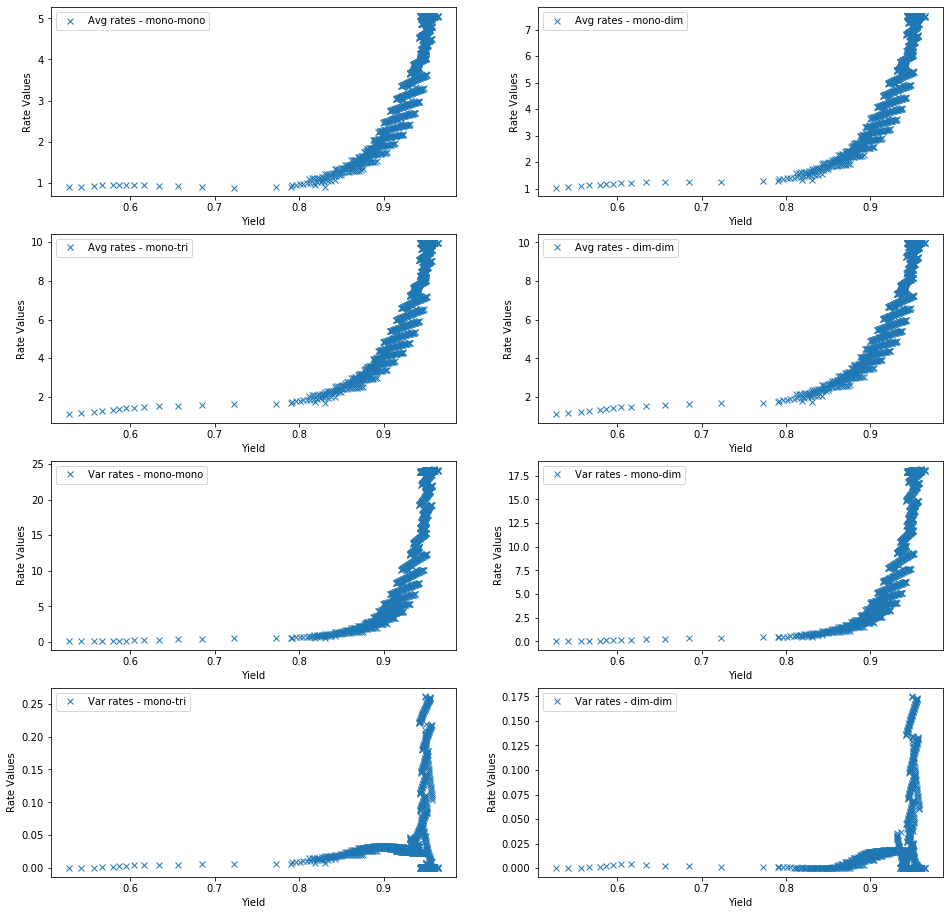

In [21]:
from matplotlib import pyplot as plt
n_features = len(asymm[0])
fig,ax = plt.subplots(int(n_features/2),2,figsize=(16,16))
# %matplotlib notebook

asymm = np.reshape(np.array(asymm),(len(sorted_yields),len(asymm[0])))
sorted_yields.reshape((sorted_yields.shape[0],1))

mask = (sorted_yields < 1.0) & (sorted_yields >0.5)

row=0
col=0
counter=0
for i in range(n_features):
    ax[row,col].plot(sorted_yields[mask],asymm[mask,i],marker='x',linestyle='',label=final_lb[i])
    ax[row,col].legend()
    ax[row,col].set_xlabel("Yield")
    ax[row,col].set_ylabel("Rate Values")
    
    counter+=1
    row = row+(col%2)
    col = counter%2
    
    

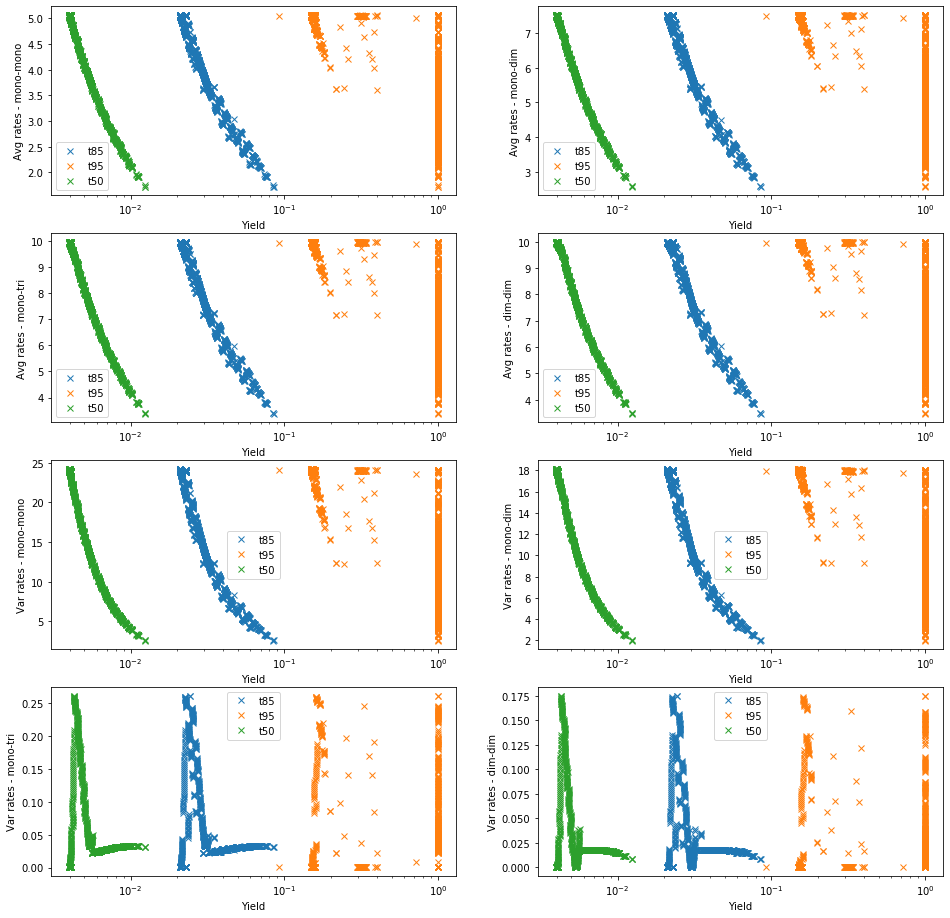

In [22]:
from matplotlib import pyplot as plt
n_features = len(asymm[0])
fig,ax = plt.subplots(int(n_features/2),2,figsize=(16,16))
# %matplotlib notebook

asymm = np.reshape(np.array(asymm),(len(sorted_yields),len(asymm[0])))
sorted_yields.reshape((sorted_yields.shape[0],1))

mask = (sorted_yields < 0.9999) & (sorted_yields >0.90)

row=0
col=0
counter=0
for i in range(n_features):
    ax[row,col].plot(sorted_t85[mask],asymm[mask,i],marker='x',linestyle='',label='t85')
    ax[row,col].plot(sorted_t95[mask],asymm[mask,i],marker='x',linestyle='',label='t95')
    ax[row,col].plot(sorted_t50[mask],asymm[mask,i],marker='x',linestyle='',label='t50')
    ax[row,col].legend()
    ax[row,col].set_xlabel("Yield")
    ax[row,col].set_ylabel(final_lb[i])
    
    ax[row,col].set_xscale("log")
    
    
    counter+=1
    row = row+(col%2)
    col = counter%2

In [23]:
#Let's see what some clustering reveals
#Is there a trend with high yield

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def cluster_params(params,final_y,n_clust):
#     feat_mat = np.concatenate((params,final_y),axis=1)
    feat_mat = params
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(feat_mat)
    
    kmeans = KMeans(n_clusters = n_clust, random_state=0).fit(X_scaled)
    clus_cen = kmeans.cluster_centers_ #Obtain centroids for all the clusters
    transform_mat = kmeans.transform(feat_mat) #This method calculates the distance of each point from each cluster
    labels = kmeans.labels_  #Labels which frame belongs to which cluster
    
    return(labels,clus_cen,transform_mat)

In [24]:
#Clustering
print(asymm.shape,sorted_yields.shape)
n_clust=8

var_feat_mat = asymm[mask][:,:]

labels,clus_cen,transform_mat = cluster_params(var_feat_mat,sorted_yields.reshape((sorted_yields.shape[0],1)),n_clust)


clr_input = ['skyblue','orange','green','red','purple','gold','brown','olive','crimson','peru','lightgreen','turquoise','cyan']

print(transform_mat.shape)


(4999, 8) (4999,)
(4786, 8)


(4786, 1)
(4786, 1)
(4786, 1)
(4786, 1)
(4786, 1)
(4786, 1)
(4786, 1)
Cluster:  0
Cluster Centroid:  [ 0.35120416  0.34794941  0.34709938  0.34106047  0.36372927  0.35962347
 -0.28955935 -0.26508573]
Max distance:  33.863436851691745 Params:  [9.92787323 9.96850516 9.99319274 0.11712369 0.09915715 9.92787323
 9.92787323 0.12956489 9.96850516 9.96850516 0.12956489 9.96850516
 9.99319274 9.99319274 0.12956489 9.99319274 9.99319274 9.99319274
 9.96850516 9.96850516 9.99319274 9.99319274 0.11712369 9.92787323
 9.99319274]
Min distance:  32.00026725262157 Params:  [9.92181819 9.41808788 9.62171876 0.12578538 0.16034503 9.92181819
 9.92181819 0.15406139 9.41808788 9.41808788 0.15406139 9.41808788
 9.62171876 9.62171876 0.16034503 9.62171876 9.62171876 9.92181819
 9.92181819 9.92181819 9.92181819 9.62171876 0.16034503 9.92181819
 9.92181819]
Cluster:  1
Cluster Centroid:  [-4.06172421 -4.07845781 -4.08197912 -4.11116071 -3.77618967 -3.8030027
  0.51811658  0.43214573]
Max distance:  21.937961

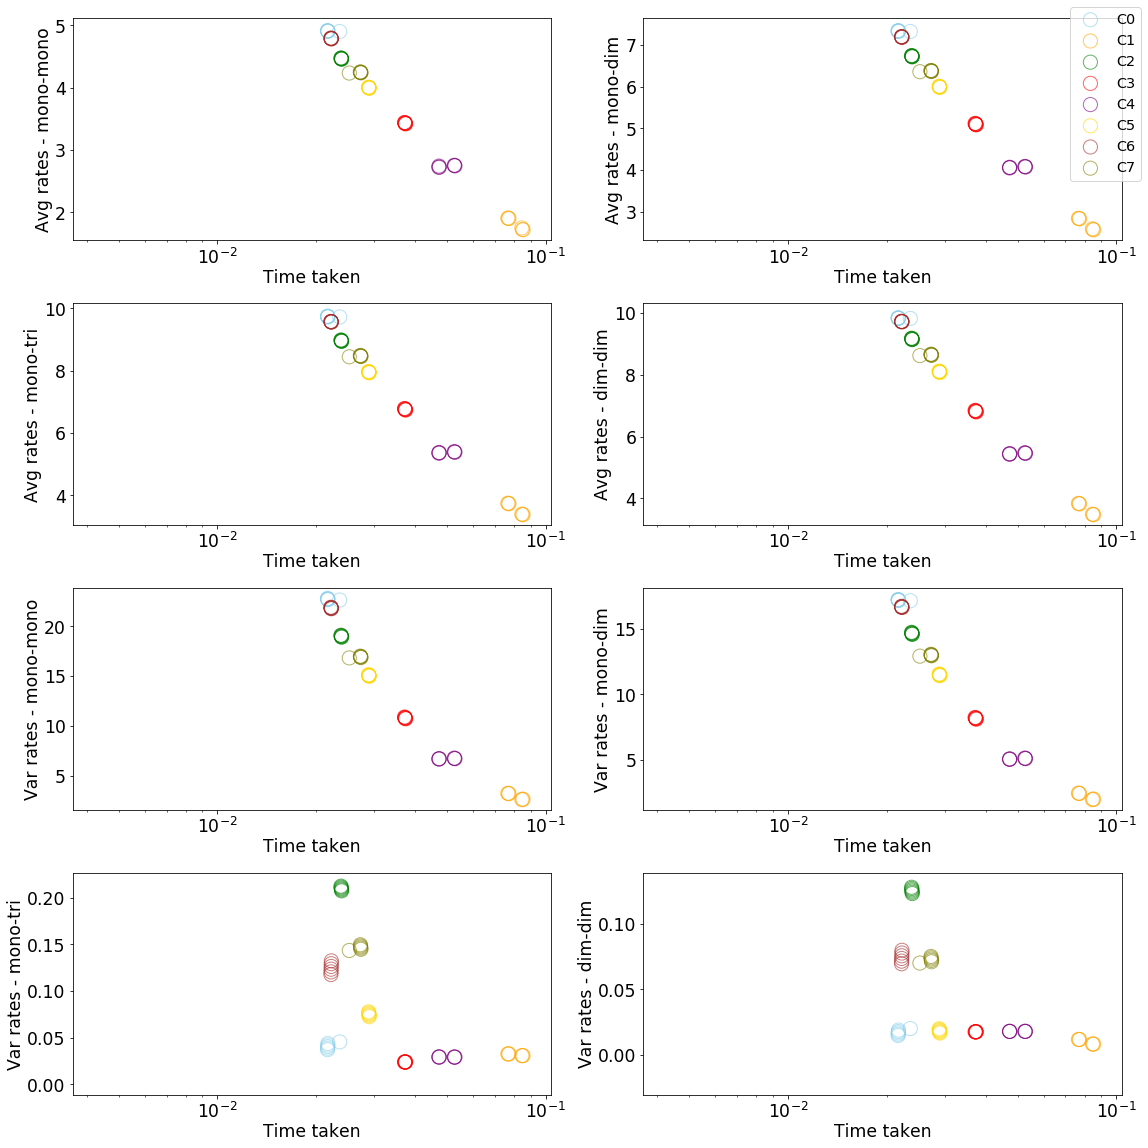

In [25]:
feat_rates =sorted_params[mask]
sel_t50 = sorted_t50[mask]
sel_t85 = sorted_t85[mask]
sel_t95 = sorted_t95[mask]

asymm_new = asymm[mask]

#Create a bianry matrix to know which elements are form a cluster
mask_01=(np.array(labels)==0)
cluster_mask = mask_01.reshape((len(labels),1))
for i in range(1,n_clust):
    n_arr = i*np.ones((len(labels),1))-np.array(labels).reshape(((len(labels),1)))
    mask_01=(n_arr==0)
    print(n_arr.shape)
    cluster_mask=np.hstack((cluster_mask,mask_01))

# cluster_mask = cluster_mask.astype(float)

fig,ax = plt.subplots(int(n_features/2),2,figsize=(16,16))
ax_hd = []

clust_min_solutions={}
for i in range(n_clust):
    
    clus_1_dist = transform_mat[cluster_mask[:,i],i]
    clus_1_par = feat_rates[cluster_mask[:,i],:]
    clus_1_t50 = sel_t50[cluster_mask[:,i]]
    clus_1_t85 = sel_t85[cluster_mask[:,i]]
    clus_1_t95 = sel_t95[cluster_mask[:,i]]
    clus_1_asymm = asymm_new[cluster_mask[:,i]]
    indx_sort = np.argsort(clus_1_dist)
    
    print("Cluster: ",i)
    print("Cluster Centroid: ",clus_cen[i])
    sorted_dist = clus_1_dist[indx_sort]
    sorted_par = clus_1_par[indx_sort]
    clus_sorted_t50 = clus_1_t50[indx_sort]
    clus_sorted_t85 = clus_1_t85[indx_sort]
    clus_sorted_t95 = clus_1_t95[indx_sort]
    clus_sorted_asymm = clus_1_asymm[indx_sort]
    print("Max distance: ",sorted_dist[-1],"Params: ",sorted_par[-1])
    print("Min distance: ",sorted_dist[0],"Params: ",sorted_par[0])
    clust_min_solutions[i]=sorted_par[0]
    
    
    #Plotting
    row=0
    col=0
    counter=0
    for j in range(n_features):
        
#         h1=ax[row,col].scatter(clus_sorted_t85[-1],clus_sorted_asymm[-1,j],s=100,alpha=0.6,marker='o',color=clr_input[i], label='85%')
        h1 = ax[row,col].scatter(clus_sorted_t85[0:6],clus_sorted_asymm[0:6,j],s=200,alpha=0.6,marker='o',edgecolor=clr_input[i], facecolor='none', label='85%')
        
        ax[row,col].set_xlabel("Time taken",fontdict={'fontsize':'xx-large'},labelpad=1.0)
        ax[row,col].set_ylabel(final_lb[j],fontdict={'fontsize':'xx-large'},labelpad=2.0)

        ax[row,col].set_xscale("log")
        ax[row,col].tick_params(labelsize='xx-large')
        
        if counter==0:
            ax_hd.append(h1)
        counter+=1
        row = row+(col%2)
        col = counter%2
fig.legend(ax_hd,['C0','C1','C2','C3','C4','C5','C6','C7'],fontsize='x-large')
fig.tight_layout()

In [26]:
uid_dict = {}
uid_reactants = {}
sys.path.append("../")
import numpy as np
from reaction_network import gtostr
for n in rn.network.nodes():
    #print(n)
    #print(rn.network.nodes()[n])
    for k,v in rn.network[n].items():
        uid = v['uid']
        r1 = set(gtostr(rn.network.nodes[n]['struct']))
        p = set(gtostr(rn.network.nodes[k]['struct']))
        r2 = p-r1
        reactants = (r1,r2)
        uid_val = {'uid':uid,'reactants':reactants,'kon':v['k_on'],'score':v['rxn_score'],'koff':v['k_off']}
        uid_reactants[uid]=reactants
        if uid not in uid_dict.keys():
            uid_dict[uid] = uid_val
    print(gtostr(rn.network.nodes[n]['struct']))
    #for r_set in rn.get_reactant_sets(n):
    #    print(tuple(r_set))
    #print(rn.network[n]['struct'])
ind_sort = np.argsort(vec_rn.kon.detach().numpy())
for i in ind_sort:
    print(vec_rn.kon[i])
    print(uid_dict[i])

A
M
B
S
AM
AB
AS
BM
MS
ABM
AMS
BS
ABS
BMS
ABMS
tensor(0.1419, dtype=torch.float64, grad_fn=<SelectBackward>)
{'uid': 7, 'reactants': ({'B'}, {'S'}), 'kon': 0.10000000000000002, 'score': tensor([-20.], dtype=torch.float64), 'koff': 0.00020611536224385545}
tensor(0.1606, dtype=torch.float64, grad_fn=<SelectBackward>)
{'uid': 4, 'reactants': ({'M'}, {'S'}), 'kon': 1.0, 'score': tensor([-20.], dtype=torch.float64), 'koff': 0.002061153622438557}
tensor(0.1769, dtype=torch.float64, grad_fn=<SelectBackward>)
{'uid': 3, 'reactants': ({'M'}, {'B'}), 'kon': 1.0, 'score': tensor([-20.], dtype=torch.float64), 'koff': 0.002061153622438557}
tensor(1., dtype=torch.float64, grad_fn=<SelectBackward>)
{'uid': 18, 'reactants': ({'S', 'A'}, {'M', 'B'}), 'kon': 1.0, 'score': tensor([-80.], dtype=torch.float64), 'koff': 1.8048513878454144e-29}
tensor(1., dtype=torch.float64, grad_fn=<SelectBackward>)
{'uid': 17, 'reactants': ({'A', 'B'}, {'M', 'S'}), 'kon': 1.0, 'score': tensor([-80.], dtype=torch.float64),

In [27]:
for cl_id,lab in lb_rxn_class.items():
    
    print("------------------------------")
    print("------------------------------")
    print("------    {:s}    -------".format(lab))
    print("------------------------------")
    print("-------------------------------")
    print("%-12s\t%-4s\t%-4s\t%-4s\t%-4s\t%-4s\t%-4s\t%-4s\t%-4s\t%-4s\n" %('Reaction','uid','C0','C1','C2','C3','C4','C5','C6','C7'))
    for r_id in final_rxn_class[cl_id]:
        r1 = "".join(list(uid_reactants[r_id][0]))
        r2 = "".join(list(uid_reactants[r_id][1]))
        print("{:^4s} + {:^4s}".format(r1,r2),end='\t')
        print(r_id,end='\t')
        for clust,rates in clust_min_solutions.items():
            print("%-4.2f" %(rates[r_id]),end='\t')
        print("")
    

------------------------------
------------------------------
------    mono-mono    -------
------------------------------
-------------------------------
Reaction    	uid 	C0  	C1  	C2  	C3  	C4  	C5  	C6  	C7  

 M   +  A  	0	9.92	3.11	9.38	6.56	5.14	8.17	9.91	8.81	
 B   +  A  	1	9.42	3.35	8.35	6.61	5.24	7.51	9.09	7.92	
 S   +  A  	2	9.62	3.54	8.64	6.89	5.52	7.89	9.31	8.25	
 B   +  M  	3	0.13	0.12	0.15	0.15	0.16	0.13	0.15	0.14	
 S   +  M  	4	0.16	0.10	0.11	0.15	0.16	0.14	0.11	0.16	
 S   +  B  	7	0.15	0.10	0.11	0.15	0.10	0.11	0.11	0.12	
------------------------------
------------------------------
------    mono-dim    -------
------------------------------
-------------------------------
Reaction    	uid 	C0  	C1  	C2  	C3  	C4  	C5  	C6  	C7  

 MB  +  A  	19	9.92	3.35	9.38	6.61	5.24	8.17	9.91	8.81	
 MS  +  A  	20	9.92	3.54	9.38	6.89	5.52	8.17	9.91	8.81	
 SB  +  A  	21	9.62	3.54	8.64	6.89	5.52	7.89	9.31	8.25	
 AB  +  M  	5	9.92	3.11	9.38	6.56	5.14	8.17	9.91	8.81	
 SA  +  M  	6	9.92

In [28]:
uid_dict = {}
sys.path.append("../")
import numpy as np
from reaction_network import gtostr
for n in rn.network.nodes():
    #print(n)
    #print(rn.network.nodes()[n])
    for k,v in rn.network[n].items():
        uid = v['uid']
        r1 = set(gtostr(rn.network.nodes[n]['struct']))
        p = set(gtostr(rn.network.nodes[k]['struct']))
        r2 = p-r1
        reactants = (r1,r2)
        uid_val = {'reactants':reactants,'kon':v['k_on'],'score':v['rxn_score'],'koff':v['k_off']}
        if uid not in uid_dict.keys():
            uid_dict[uid] = uid_val
    print(gtostr(rn.network.nodes[n]['struct']))
    #for r_set in rn.get_reactant_sets(n):
    #    print(tuple(r_set))
    #print(rn.network[n]['struct'])
ind_sort = np.argsort(vec_rn.kon.detach().numpy())
for i in ind_sort:
    print(vec_rn.kon[i])
    print(uid_dict[i])

A
M
B
S
AM
AB
AS
BM
MS
ABM
AMS
BS
ABS
BMS
ABMS
tensor(0.1419, dtype=torch.float64, grad_fn=<SelectBackward>)
{'reactants': ({'B'}, {'S'}), 'kon': 0.10000000000000002, 'score': tensor([-20.], dtype=torch.float64), 'koff': 0.00020611536224385545}
tensor(0.1606, dtype=torch.float64, grad_fn=<SelectBackward>)
{'reactants': ({'M'}, {'S'}), 'kon': 1.0, 'score': tensor([-20.], dtype=torch.float64), 'koff': 0.002061153622438557}
tensor(0.1769, dtype=torch.float64, grad_fn=<SelectBackward>)
{'reactants': ({'M'}, {'B'}), 'kon': 1.0, 'score': tensor([-20.], dtype=torch.float64), 'koff': 0.002061153622438557}
tensor(1., dtype=torch.float64, grad_fn=<SelectBackward>)
{'reactants': ({'S', 'A'}, {'M', 'B'}), 'kon': 1.0, 'score': tensor([-80.], dtype=torch.float64), 'koff': 1.8048513878454144e-29}
tensor(1., dtype=torch.float64, grad_fn=<SelectBackward>)
{'reactants': ({'A', 'B'}, {'M', 'S'}), 'kon': 1.0, 'score': tensor([-80.], dtype=torch.float64), 'koff': 1.8048513878454144e-29}
tensor(1., dtype=to

In [29]:
uid_dict = {}
sys.path.append("../")
import numpy as np
from reaction_network import gtostr
from torch import DoubleTensor as Tensor

def get_max_edge(n):
    """
    Calculates the max rate (k_on) for a given node
    To find out the maximum flow path to the final complex starting from the current node.
    
    Can also calculate the total rate of consumption of a node by summing up all rates. 
    Can tell which component is used quickly.
    """
    try:
        edges = rn.network.out_edges(n)
        #Loop over all edges
        #Get attributes
        if len(edges)==0:
            return(False)
        kon_max = -1
        next_node = -1
        
        kon_sum = 0
        for edge in edges:
            data = rn.network.get_edge_data(edge[0],edge[1])
            #print(data)
            #Get uid
            uid = data['uid']
            #Get updated kon
            temp_kon = vec_rn.kon[uid]
            kon_sum+=temp_kon
            
#             #Calculate k_off also
#             std_c = Tensor([1.])
#             l_kon = torch.log(temp_kon)
#             l_koff = (vec_rn.rxn_score_vec[uid] * 1. / (self._R * self._T)) + l_kon + torch.log(std_c)
            if temp_kon > kon_max:
                kon_max = temp_kon
                next_node=edge[1]
        return(kon_max,next_node,kon_sum)
    except Exception as err:
        raise(err)

pathway = []
kon_sumarray = []
total_con_rate = {}
for n in rn.network.nodes():
    
    n_str = gtostr(rn.network.nodes[n]['struct']) 
    
    paths = [n_str]
    kon_sum = 0
    temp_node = n
    max_edge = True
    consumption_rate = 0
    if n < len(rn.network.nodes()):#num_monomers:
#         print("Current node: ")
#         print(n_str)
        while max_edge:
            max_edge = get_max_edge(temp_node)
            if max_edge:
                total_con_rate[gtostr(rn.network.nodes[temp_node]['struct'])] = max_edge[2]
                temp_node = max_edge[1]
                kon_sum += max_edge[0].item()
                
#                 print("Next node: ")
#                 print(temp_node)

                paths.append(gtostr(rn.network.nodes[temp_node]['struct']))
            else:
                break
        pathway.append(paths)
        kon_sumarray.append(kon_sum)
        paths=[]

print(pathway)
print(kon_sumarray)
#print(total_con_rate)

[['A', 'AM', 'ABM', 'ABMS'], ['M', 'AM', 'ABM', 'ABMS'], ['B', 'AB', 'ABM', 'ABMS'], ['S', 'AS', 'AMS', 'ABMS'], ['AM', 'ABM', 'ABMS'], ['AB', 'ABM', 'ABMS'], ['AS', 'AMS', 'ABMS'], ['BM', 'BMS', 'ABMS'], ['MS', 'BMS', 'ABMS'], ['ABM', 'ABMS'], ['AMS', 'ABMS'], ['BS', 'ABS', 'ABMS'], ['ABS', 'ABMS'], ['BMS', 'ABMS'], ['ABMS']]
[12.166261118754303, 12.166261118754303, 12.119207532424316, 12.133592963672342, 2.211487660311334, 2.211487660311334, 2.211487660311334, 2.211487660311334, 2.211487660311334, 1.0000000004373404, 1.0000000004373404, 2.211487660311334, 1.0000000004373404, 1.0000000004373404, 0]


In [30]:
for k,v in sorted(total_con_rate.items(),key=lambda x : x[1]):
    print(k," : ", v.item())

ABM  :  1.0000000004373404
AMS  :  1.0000000004373404
BMS  :  1.0000000004373404
ABS  :  1.0000000004373404
AM  :  3.4229753197479873
AB  :  3.4229753197479873
AS  :  3.4229753197479873
BM  :  3.4229753197479873
MS  :  3.4229753197479873
BS  :  3.4229753197479873
S  :  14.859078296414092
B  :  14.860904952349227
M  :  14.92674585503996
A  :  34.41906161397628


Let's first visualize some of the data.

**Without any optimization**


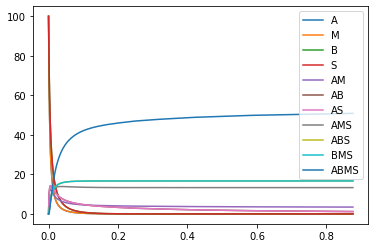

In [31]:
nodes_list = ['A','B','S','M','AB','BMS','ABS','AMS','ABMS','AM','AS']
#nodes_list = ['A','B','ABMS']
optim.plot_observable(0,nodes_list)


**After 750 optimization iterations**


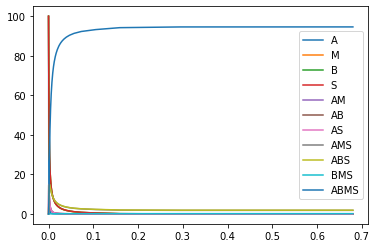

In [32]:
optim.plot_observable(-1,nodes_list)


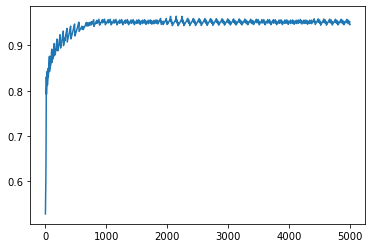

In [33]:
optim.plot_yield()

It seems like we've found a stable solution that produces greater yield than equilibrium. This should be thermodynamically
impossible. Let's try to find an explanation. We'll run simulations using the learned optimal parameters at a few different
timescales.

No handles with labels found to put in legend.


Using CPU
Next time:  tensor(3.9421, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  303
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9461, dtype=torch.float64, grad_fn=<DivBackward0>)
Using CPU


No handles with labels found to put in legend.


Next time:  tensor(704.4724, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  305
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9503, dtype=torch.float64, grad_fn=<DivBackward0>)
Using CPU
Next time:  tensor(704.4724, dtype=torch.float64, grad_fn=<AddBackward0>)
Number of steps:  305
Next time larger than simulation runtime. Ending simulation.
Final Yield:  tensor(0.9503, dtype=torch.float64, grad_fn=<DivBackward0>)
{'A': 0, 'M': 1, 'B': 2, 'S': 3, 'AM': 4, 'AB': 5, 'AS': 6, 'BM': 7, 'MS': 8, 'ABM': 9, 'AMS': 10, 'BS': 11, 'ABS': 12, 'BMS': 13, 'ABMS': 14}


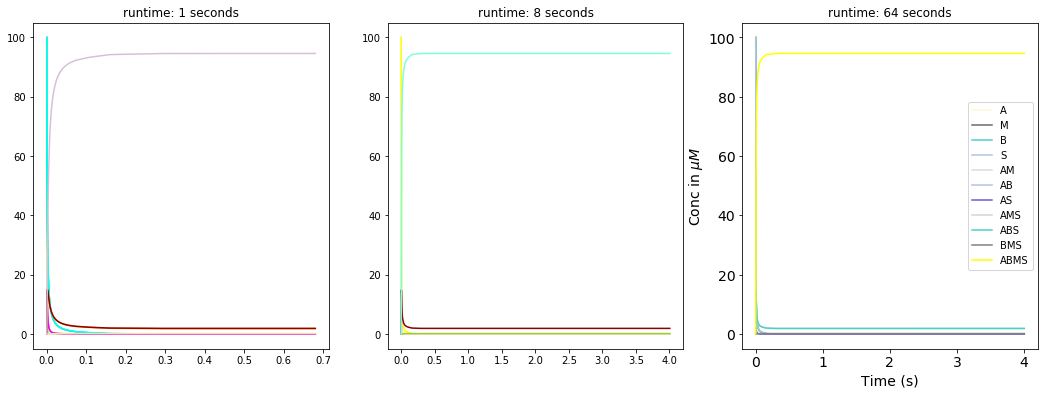

In [34]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1, 3)
optim_rn = optim.rn
for i, runtime in enumerate([1, 8, 64]):
    optim_rn.reset()
    sim = VecSim(optim_rn, runtime, device='cpu')
    y = sim.simulate()
    sim.plot_observable(nodes_list,ax=ax[i],)
    ax[i].set_title("runtime: " + str(runtime) + " seconds")
fig.set_size_inches(18, 6)
node_map = {}
for node in rn.network.nodes():
    node_map[gtostr(rn.network.nodes[node]['struct'])] = node

print(node_map)
plt.show()

In [35]:
node_map = {}
for node in rn.network.nodes():
    node_map[gtostr(rn.network.nodes[node]['struct'])] = node

print(node_map)
def get_max_edge(n):
    """
    Calculates the max rate (k_on) for a given node
    To find out the maximum flow path to the final complex starting from the current node.
    
    Can also calculate the total rate of consumption of a node by summing up all rates. 
    Can tell which component is used quickly.
    """
    try:
        edges = rn.network.out_edges(n)
        #Loop over all edges
        #Get attributes
        kon_max = -1
        next_node = -1

        kon_sum = 0
        total_flux_outedges = 0
        total_flux_inedges = 0
        if len(edges)==0:
            return(False)
            
        for edge in edges:
            data = rn.network.get_edge_data(edge[0],edge[1])
            #print(data)
            #Get uid
            uid = data['uid']

            #Get updated kon
            temp_kon = vec_rn.kon[uid]
            kon_sum+=temp_kon
            
            if temp_kon > kon_max:
                kon_max = temp_kon
                next_node=edge[1]
             
        return(kon_max,next_node,kon_sum)
    except Exception as err:
        raise(err)

        
def get_node_flux(n):
    total_flux_outedges = 0
    total_flux_inedges = 0
    #Go over all the out edges
    edges_out = rn.network.out_edges(n)
    if len(edges_out)>0:

        for edge in edges_out:
            data = rn.network.get_edge_data(edge[0],edge[1])
            #print(data)
            #Get uid
            uid = data['uid']

            #Get updated kon
            temp_kon = vec_rn.kon[uid]

            #Calculate k_off also
            std_c = Tensor([1.])
            l_kon = torch.log(temp_kon)
            l_koff = (vec_rn.rxn_score_vec[uid] * 1. / (vec_rn._R * vec_rn._T)) + l_kon + torch.log(std_c)
            koff = torch.exp(l_koff)

            #Getting conc. of reactants and products
            #Get product
            prod = gtostr(rn.network.nodes[edge[1]]['struct']) 
            #Get other reactant
            react = "".join(sorted(list(set(prod) - set(gtostr(rn.network.nodes[edge[0]]['struct']) ))))

            #Net flux from this edge = Generation - consumption
            edge_flux = koff*vec_rn.copies_vec[edge[1]] - temp_kon*(vec_rn.copies_vec[edge[0]])*(vec_rn.copies_vec[node_map[react]])
            #edge_flux = koff*vec_rn.copies_vec[edge[1]] 

            print("Reaction: ", gtostr(rn.network.nodes[edge[0]]['struct']), "+",react," -> ",prod)
            print("Net flux: ",edge_flux)
            print("kon : ",temp_kon)
            print("koff: ",koff)
            print("Reaction data OUTWARD: ")
            print(data)

            total_flux_outedges+=edge_flux
    
    #Now go over all the in edges
    edges_in = rn.network.in_edges(n)
    react_list = []
    if len(edges_in) > 0:
        for edge in edges_in:
            if edge[0] in react_list:
                continue
            data = rn.network.get_edge_data(edge[0],edge[1])
            uid = data['uid']


            #Get generation rates; which would be kon
            temp_kon = vec_rn.kon[uid]

            #Get consumption rates; which is k_off
            std_c = Tensor([1.])
            l_kon = torch.log(temp_kon)
            l_koff = (vec_rn.rxn_score_vec[uid] * 1. / (vec_rn._R * vec_rn._T)) + l_kon + torch.log(std_c)
            koff = torch.exp(l_koff)

            #Get conc. of reactants and products
            prod = gtostr(rn.network.nodes[edge[1]]['struct'])
            #Get other reactant
            react = "".join(sorted(list(set(prod) - set(gtostr(rn.network.nodes[edge[0]]['struct']) ))))
            react_list.append(node_map[react])
            #Net flux from this edge = Generation - consumption
            edge_flux_in = temp_kon*(vec_rn.copies_vec[edge[0]])*(vec_rn.copies_vec[node_map[react]])- koff*vec_rn.copies_vec[edge[1]]
            #edge_flux_in = koff*vec_rn.copies_vec[edge[1]]
            


            print("Reaction: ", prod ," -> ",gtostr(rn.network.nodes[edge[0]]['struct']), "+",react)
            print("Net flux: ",edge_flux_in)
            print("kon : ",temp_kon)
            print("koff: ",koff)
            print("Raction data INWARD: ")
            print(data)

            total_flux_inedges+=edge_flux_in
    net_node_flux = total_flux_outedges + total_flux_inedges
    
    return(net_node_flux)
    
pathway = []
kon_sumarray = []
total_con_rate = {}
net_flux = {}
for n in rn.network.nodes():
    
    n_str = gtostr(rn.network.nodes[n]['struct']) 
    
    paths = [n_str]
    kon_sum = 0
    temp_node = n
    max_edge = True
    consumption_rate = 0
    if n < len(rn.network.nodes()):#num_monomers:
#         print("Current node: ")
#         print(n_str)
        while max_edge:
            max_edge = get_max_edge(temp_node)
            if max_edge:
                total_con_rate[gtostr(rn.network.nodes[temp_node]['struct'])] = max_edge[2]
                
                temp_node = max_edge[1]
                kon_sum += max_edge[0].item()
                
                
#                 print("Next node: ")
#                 print(temp_node)

                paths.append(gtostr(rn.network.nodes[temp_node]['struct']))
            else:
                break
        pathway.append(paths)
        kon_sumarray.append(kon_sum)
        paths=[]
    print("-------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------")
    print("|                                                                             |")
    node_flux = get_node_flux(n)
    net_flux[gtostr(rn.network.nodes[n]['struct'])] = node_flux
    print("|                                                                             |")
    print("-------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------")

print(pathway)
print(kon_sumarray)

#print(total_con_rate)

{'A': 0, 'M': 1, 'B': 2, 'S': 3, 'AM': 4, 'AB': 5, 'AS': 6, 'BM': 7, 'MS': 8, 'ABM': 9, 'AMS': 10, 'BS': 11, 'ABS': 12, 'BMS': 13, 'ABMS': 14}
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
|                                                                             |
Reaction:  A + M  ->  AM
Net flux:  tensor([-1.3381e-07], dtype=torch.float64, grad_fn=<SubBackward0>)
kon :  tensor(9.9548, dtype=torch.float64, grad_fn=<SelectBackward>)
koff:  tensor([9.8675], dtype=torch.float64, grad_fn=<ExpBackward>)
Reaction data OUTWARD: 
{'k_on': 1.0, 'k_off': 0.002061153622438557, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 0}
Reaction:  A + B  ->  AB
Net flux:  tensor([1.4790e-07], dtype=torch.float64, grad_fn=<SubBackward0>)
kon :  tensor(9.9077, dtype=torch.float64, grad_fn=<SelectBackward>)
koff:  tensor([9.8208], dtype=torch.float64, grad_fn=<ExpBackward>)

koff:  tensor([1.1903], dtype=torch.float64, grad_fn=<ExpBackward>)
Raction data INWARD: 
{'k_on': 1.0, 'k_off': 4.248354255291587e-12, 'lcf': 1, 'rxn_score': tensor([-40.], dtype=torch.float64), 'uid': 9}
Reaction:  ABS  ->  S + AB
Net flux:  tensor([-2.2450], dtype=torch.float64, grad_fn=<SubBackward0>)
kon :  tensor(1.2115, dtype=torch.float64, grad_fn=<SelectBackward>)
koff:  tensor([1.1903], dtype=torch.float64, grad_fn=<ExpBackward>)
Raction data INWARD: 
{'k_on': 1.0, 'k_off': 4.248354255291587e-12, 'lcf': 1, 'rxn_score': tensor([-40.], dtype=torch.float64), 'uid': 13}
Reaction:  ABS  ->  BS + A
Net flux:  tensor([-2.2450], dtype=torch.float64, grad_fn=<SubBackward0>)
kon :  tensor(1.2115, dtype=torch.float64, grad_fn=<SelectBackward>)
koff:  tensor([1.1903], dtype=torch.float64, grad_fn=<ExpBackward>)
Raction data INWARD: 
{'k_on': 1.0, 'k_off': 4.248354255291587e-12, 'lcf': 1, 'rxn_score': tensor([-40.], dtype=torch.float64), 'uid': 21}
|                                       

In [36]:
for k,v in sorted(net_flux.items(),key=lambda x : x[1]):
    print(k," : ", v)

print(vec_rn.copies_vec)
print(vec_rn.kon)

ABMS  :  tensor([-644.1195], dtype=torch.float64, grad_fn=<AddBackward0>)
ABS  :  tensor([85.0089], dtype=torch.float64, grad_fn=<AddBackward0>)
AMS  :  tensor([86.3651], dtype=torch.float64, grad_fn=<AddBackward0>)
ABM  :  tensor([87.2194], dtype=torch.float64, grad_fn=<AddBackward0>)
BMS  :  tensor([92.5654], dtype=torch.float64, grad_fn=<AddBackward0>)
BM  :  tensor([93.4738], dtype=torch.float64, grad_fn=<AddBackward0>)
MS  :  tensor([93.5904], dtype=torch.float64, grad_fn=<AddBackward0>)
BS  :  tensor([93.7760], dtype=torch.float64, grad_fn=<AddBackward0>)
AM  :  tensor([95.4140], dtype=torch.float64, grad_fn=<AddBackward0>)
M  :  tensor([95.4913], dtype=torch.float64, grad_fn=<AddBackward0>)
AB  :  tensor([95.7172], dtype=torch.float64, grad_fn=<AddBackward0>)
AS  :  tensor([95.9245], dtype=torch.float64, grad_fn=<AddBackward0>)
B  :  tensor([96.3587], dtype=torch.float64, grad_fn=<AddBackward0>)
S  :  tensor([96.8891], dtype=torch.float64, grad_fn=<AddBackward0>)
A  :  tensor([9

In [37]:
print(solution)
poly_system = EquilibriumSolver(rn)
solution = poly_system.solve(init_val=vec_rn.copies_vec.detach().numpy().tolist())
#solution = poly_system.solve(verifyBool = False)
if solution == None:
    print("No Equilibrium solution")
else:
    print(solution)
    print("Equilibrium expected yield: ", 100 * solution[-1] / min(vec_rn.initial_copies[:vec_rn.num_monomers]), '%')
print(vec_rn.kon)

NameError: name 'solution' is not defined

Clearly, the equilibrium reached by the system still matches the equilibrium solution. We have however found a set of parameters that can increase available complete AP2 at some point before equilibrium to levels significantly higher than at equilibrium. We don't observe any trapping, but have uncovered an interesting effect. 

Now we'll move on to looking at ARP23. This is 7 subunits, which drastically increases the number of possible reactions. Expect longer runtimes. 